# HOUSING: PRICE PREDICTION

### Problem Statement:
>Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:

1. Which variables are important to predict the price of variable?
2. How do these variables describe the price of the house?

### Business Goal:
>You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.
Technical Requirements:

1. Data contains 1460 entries each having 81 variables.
2. Data contains Null values. You need to treat them using the domain knowledge and your own understanding.
3. Extensive EDA has to be performed to gain relationships of important variable and price.
4. Data contains numerical as well as categorical variable. You need to handle them accordingly.
5. You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters.
6. You need to find important features which affect the price positively or negatively.
7. Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on test.csv file.

In [1]:
#import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading train dataset

df=pd.read_csv("C:/Users/HP/Documents/housring price/train.csv")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [3]:
# show all columns

pd.set_option('display.max_columns', None)
df.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   127         120       RL          NaN     4928   Pave   NaN      IR1   
1   889          20       RL         95.0    15865   Pave   NaN      IR1   
2   793          60       RL         92.0     9920   Pave   NaN      IR1   
3   110          20       RL        105.0    11751   Pave   NaN      IR1   
4   422          20       RL          NaN    16635   Pave   NaN      IR1   
5  1197          60       RL         58.0    14054   Pave   NaN      IR1   
6   561          20       RL          NaN    11341   Pave   NaN      IR1   
7  1041          20       RL         88.0    13125   Pave   NaN      Reg   
8   503          20       RL         70.0     9170   Pave   NaN      Reg   
9   576          50       RL         80.0     8480   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
5         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
6         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
7         Lvl    AllPub    Corner       Gtl       Sawyer       Norm   
8         Lvl    AllPub    Corner       Gtl      Edwards      Feedr   
9         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   
5       Norm     1Fam     2Story            7            5       2006   
6       Norm     1Fam     1Story            5            6       1957   
7       Norm     1Fam     1Story            5            4       1957   
8       Norm     1Fam     1Story            5            7       1965   
9       Norm     1Fam     1.5Fin            5            5       1947   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   
5          2006     Gable  CompShg     VinylSd     VinylSd       None   
6          1996       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
7          2000     Gable  CompShg     Wd Sdng     Wd Sdng     BrkCmn   
8          1965       Hip  CompShg     MetalSd     MetalSd       None   
9          1950     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   
5         0.0        Gd        TA      PConc       Gd       TA           Av   
6       180.0        TA        TA     CBlock       Gd       TA           No   
7        67.0        TA        TA     CBlock       TA       TA           No   
8         0.0        TA        TA     CBlock       TA       TA     

In [4]:
# checking shape 

df.shape

(1168, 81)

In [5]:
# checking types of data 

pd.set_option('max_rows', None)
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [6]:
# checking null values
pd.set_option('max_rows', None)
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

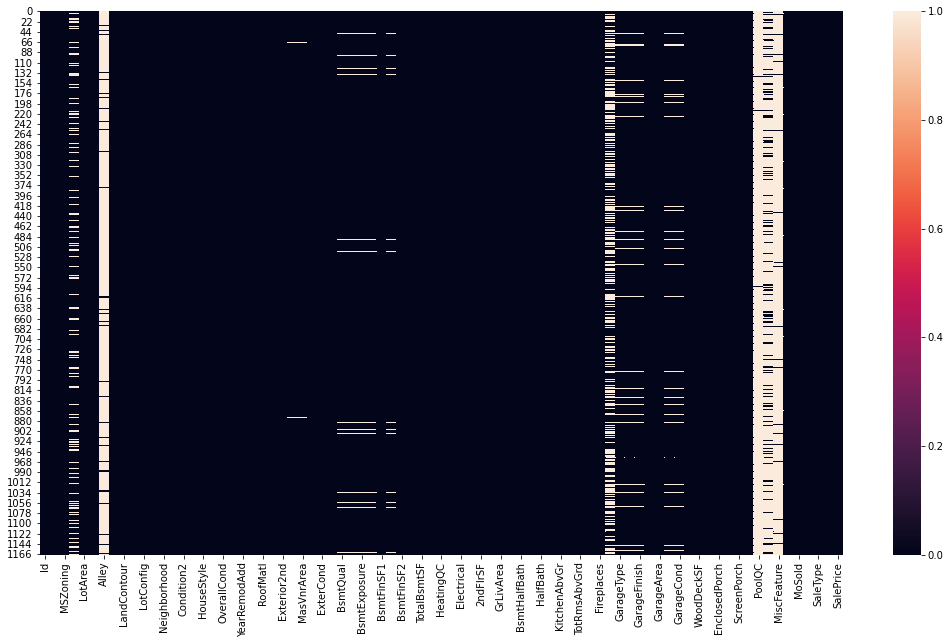

In [7]:
# show null with on heatmap

plt.figure(figsize=(18,10))
sns.heatmap(df.isnull())
plt.show()

## Summary Statistics


In [8]:
# describe all columns

df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
std     416.159877    41.940650     24.82875    8957.442311     1.390153   
min       1.000000    20.000000     21.00000    1300.000000     1.000000   
25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
max    1460.000000   190.000000    313.00000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027   
std       1.124343    30.145255     20.785185   182.595606   462.664785   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean     46.647260   569.721747  1061.095034  1169.860445   348.826199   
std     163.520016   449.375525   442.272249   391.161983   439.696370   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   216.000000   799.000000   892.000000     0.000000   
50%       0.000000   474.000000  1005.500000  1096.500000     0.000000   
75%       0.000000   816.000000  1291.500000  1392.000000   729.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1168.000000  1168.000000   1168.000000   1168.000000  1168.000000   
mean       6.380137  1525.066781      0.425514      0.055651     1.562500   
std       50.892844   528.042957      0.521615      0.236699     0.551882   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1143.250000      0.000000      0.000000     1.000000   
50%        0.000000  1468.500000      0.000000      0.000000     2.000000   
75%        0.000000  1795.000000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1168.000000   1168.000000   1168.000000   1168.000000  1168.000000   
mean      0.388699      2.884418      1.045377      6.542808     0.617295   
std       0.504929      0.817229      0.216292      1.598484     0.650575   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1104.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean   1978.193841     1.776541   476.860445    96.206336    46.559932   
std      24.890704     0.745554   214.466769   126.158988    66.381023   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   338.000000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    24.000000   
75%    2002.000000     2.000000   576.000000   171.000000    70.000000   
max    2

In [9]:
#create loop for show all unique values with counts

for i in df.columns:
    u=df[i].unique()
    v=df[i].value_counts()
    print(">>>>>>>>>>>>>>>>>>>>",i)
    print("Null:",df[i].isnull().sum())
    print(u)
    print(v.head(10))
    print('\n')

>>>>>>>>>>>>>>>>>>>> Id
Null: 0
[127 889 793 ... 196  31 617]
1460    1
501     1
476     1
477     1
478     1
479     1
480     1
483     1
485     1
487     1
Name: Id, dtype: int64


>>>>>>>>>>>>>>>>>>>> MSSubClass
Null: 0
[120  20  60  50  70  30 160  85  45  90  40  80 190  75 180]
20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
Name: MSSubClass, dtype: int64


>>>>>>>>>>>>>>>>>>>> MSZoning
Null: 0
['RL' 'RM' 'FV' 'RH' 'C (all)']
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


>>>>>>>>>>>>>>>>>>>> LotFrontage
Null: 214
[ nan  95.  92. 105.  58.  88.  70.  80.  50.  44. 129.  59.  55.  64.
  24.  68.  71.  74.  61.  60. 120.  84. 141.  30.  65.  76. 100.  85.
  75. 107. 122.  82.  62.  73.  79.  77.  41.  69.  90.  96.  72.  34.
  78.  63.  40.  98. 160. 108. 128.  51.  81.  99.  66.  37. 174.  87.
  53. 152.  47.  86.  56.  89.  35.  52.  21. 104.  57.  83.  46.

>>>>>>>>>>>>>>>>>>>> TotalBsmtSF
Null: 0
[1078 2217 1117 1844 1602  879 1392 1134 1214  832  780  941 1560 1065
  816  602 1232 1143  630  963  768 1050  864 1809 1856  993  715 1752
  651 1361  720    0  969 1090 1202  888  742 1080  928  600  970  985
  982  924 1269 1800 1510  290  992 1777 1947  750  951 1132  807  925
 1462  926 2035 1194  798 1496  520 1127  544 1705  660 2076 1482 1498
  672  912 1389  690  960  728 1032  650 1055 1099 1593  784 1488 1144
 1008  813 1494  936  920 1107 1104 1048 1554  825 1314 1643 1028  756
  691 1074 1842 1594  858  637  319 1442 1040  644 1196  894 1574  893
 1440  608  884 1478 1128 1225 2396 1686 1010 1518 1262  876 1063  795
 1393 1319 1536 1219 1505  721 1148 1386 1017  900  848 1337 1212 1304
 1486  765  859 1073  796  804  622 1428 1247 1126 1154 1100 1470 1175
 1356  559 1062  940 1489 1205  931  616 1568  866 1188  952 1020 1332
 1728 1096 1094 1394 1352 1614 1620  384 1241  882  990  483 1926 1670
 1120  980 1253  624  572 1271 2330 


>>>>>>>>>>>>>>>>>>>> YrSold
Null: 0
[2007 2010 2009 2006 2008]
2007    264
2009    260
2006    254
2008    248
2010    142
Name: YrSold, dtype: int64


>>>>>>>>>>>>>>>>>>>> SaleType
Null: 0
['WD' 'COD' 'New' 'ConLI' 'ConLw' 'Con' 'ConLD' 'Oth' 'CWD']
WD       999
New      106
COD       38
ConLD      8
ConLI      5
ConLw      4
CWD        3
Oth        3
Con        2
Name: SaleType, dtype: int64


>>>>>>>>>>>>>>>>>>>> SaleCondition
Null: 0
['Normal' 'Partial' 'Abnorml' 'Family' 'Alloca' 'AdjLand']
Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64


>>>>>>>>>>>>>>>>>>>> SalePrice
Null: 0
[128000 268000 269790 190000 215000 219210 121500 155000 140000 118500
 119500 237000 201000 126500 135500 165000 120500 194500 148000 106000
 231500 133000 142125 136500 146000 217000 112000 394432 113000 188700
 319900 135000 128500 169000 122000 152000 243000 156000  79500 132000
 144152 130000 149900 124500 179000 147000  39300

In [10]:
df.drop('Utilities',inplace=True,axis=1)

# Data Analysis

## Univariate Analysis

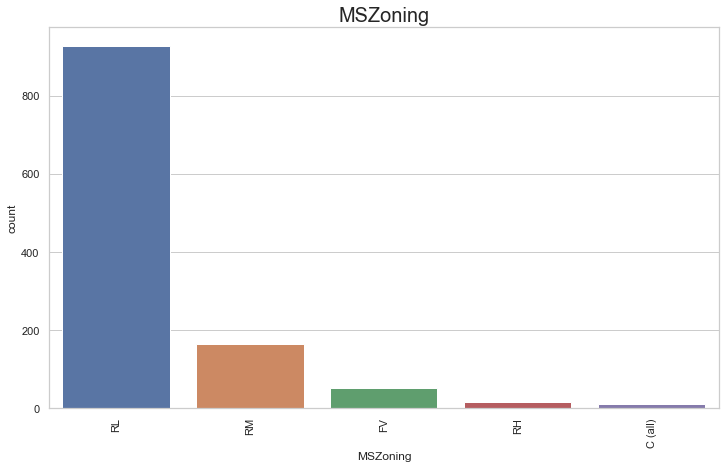

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


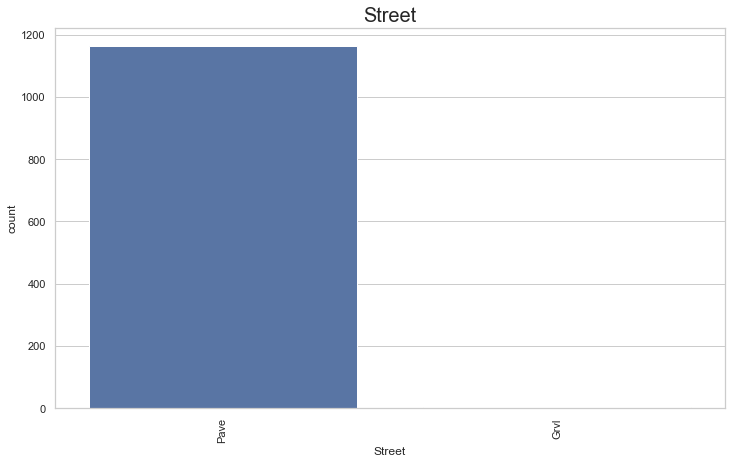

Pave    1164
Grvl       4
Name: Street, dtype: int64


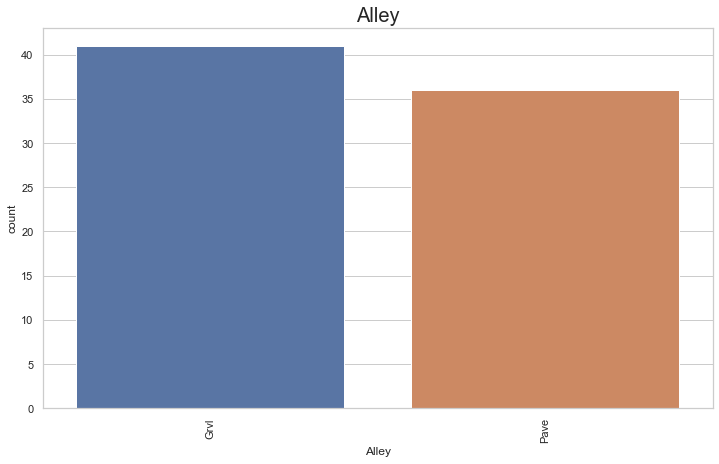

Grvl    41
Pave    36
Name: Alley, dtype: int64


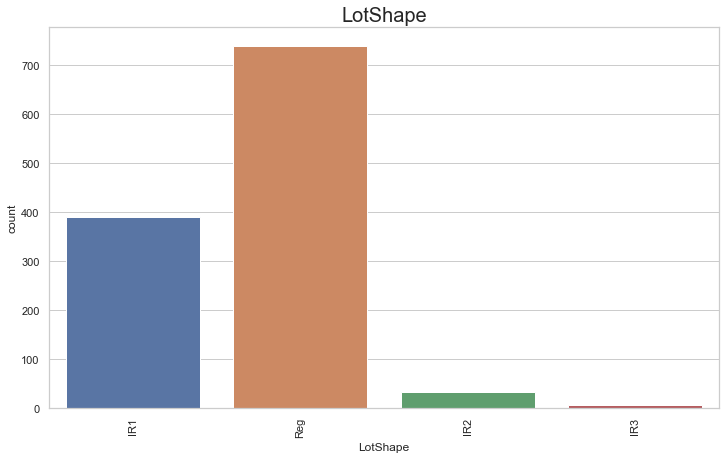

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


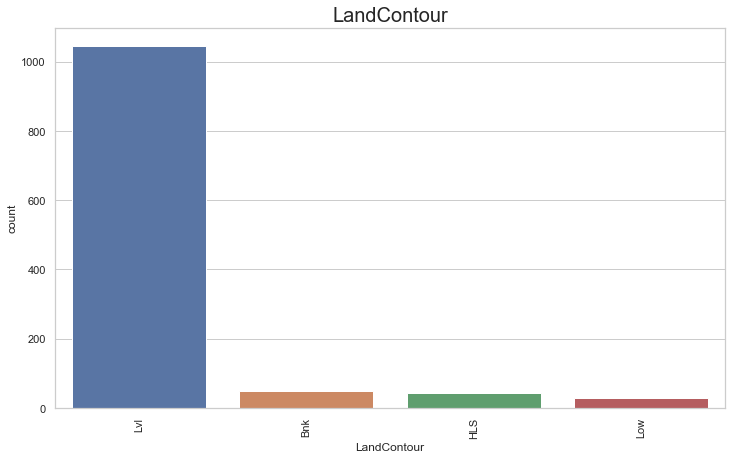

Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


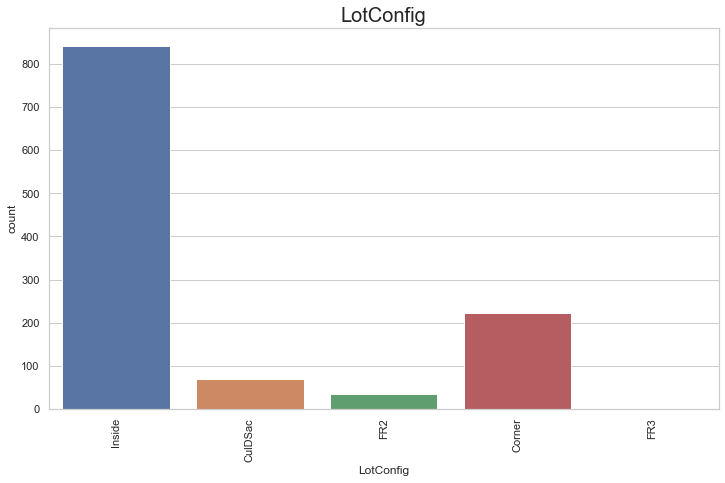

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


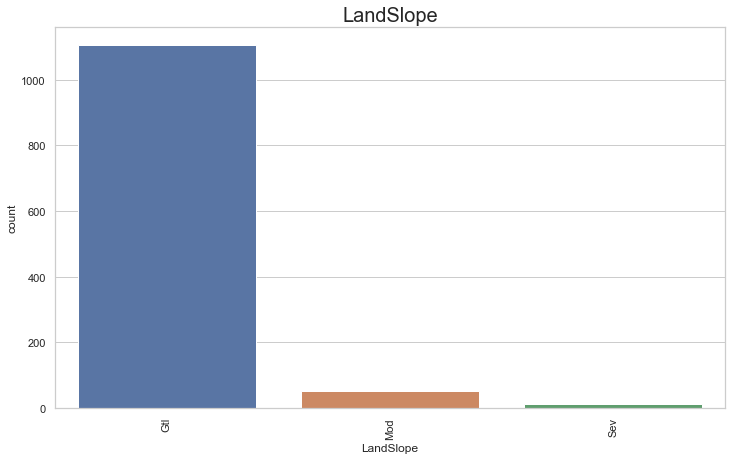

Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


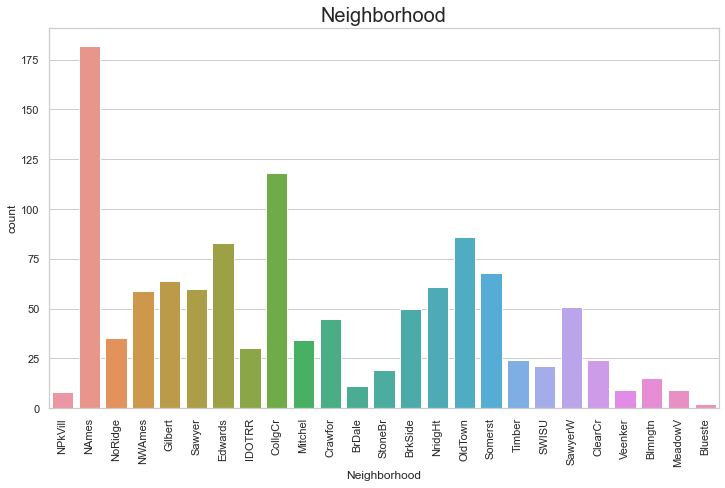

NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64


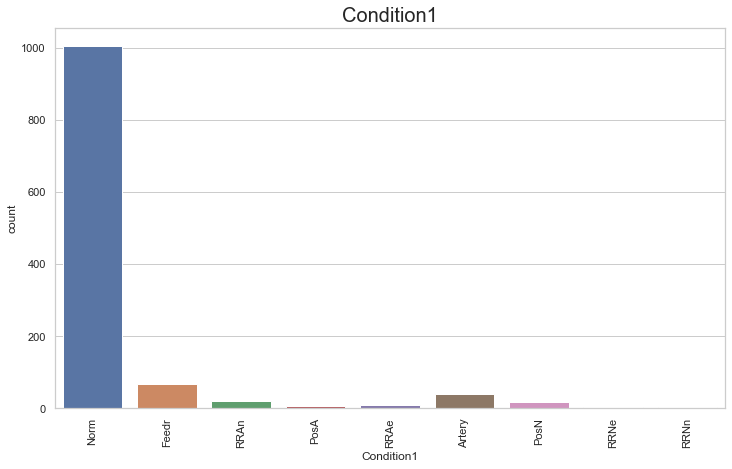

Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64


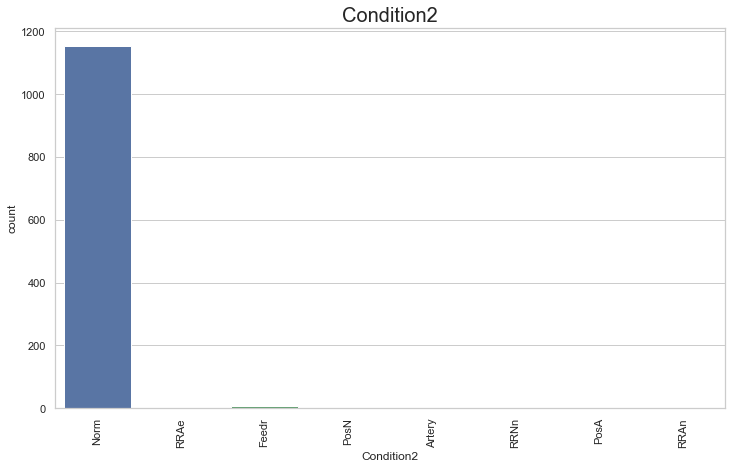

Norm      1154
Feedr        6
PosN         2
Artery       2
RRAe         1
RRNn         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64


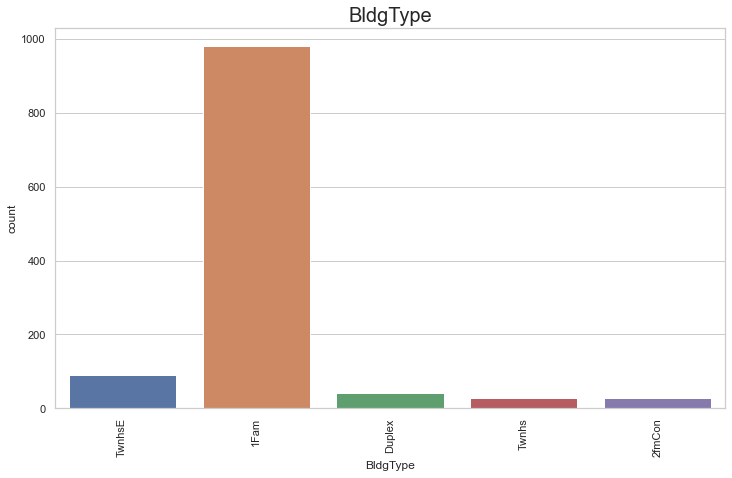

1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64


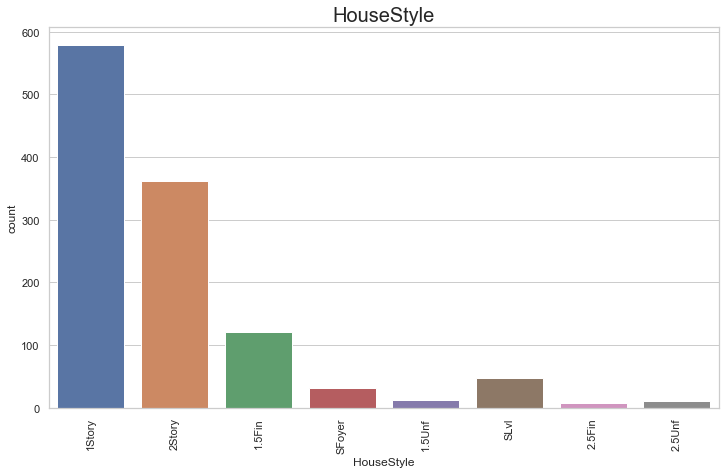

1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64


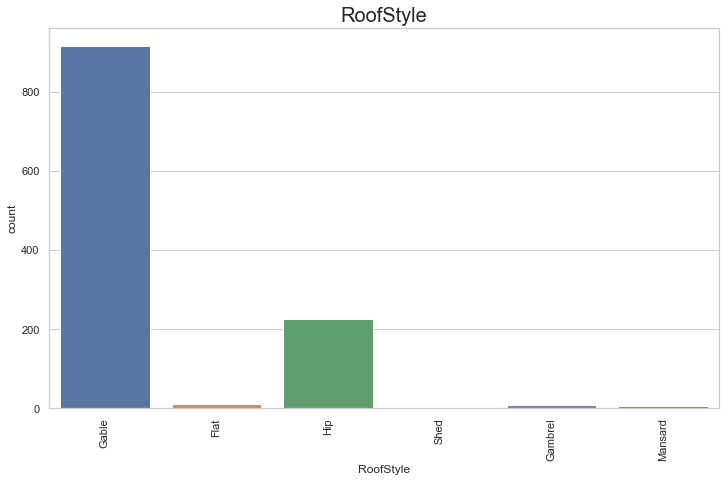

Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64


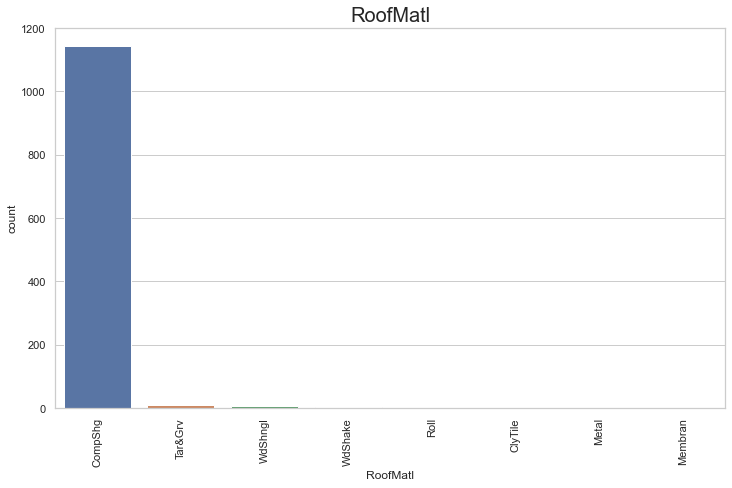

CompShg    1144
Tar&Grv      10
WdShngl       6
WdShake       4
Metal         1
ClyTile       1
Membran       1
Roll          1
Name: RoofMatl, dtype: int64


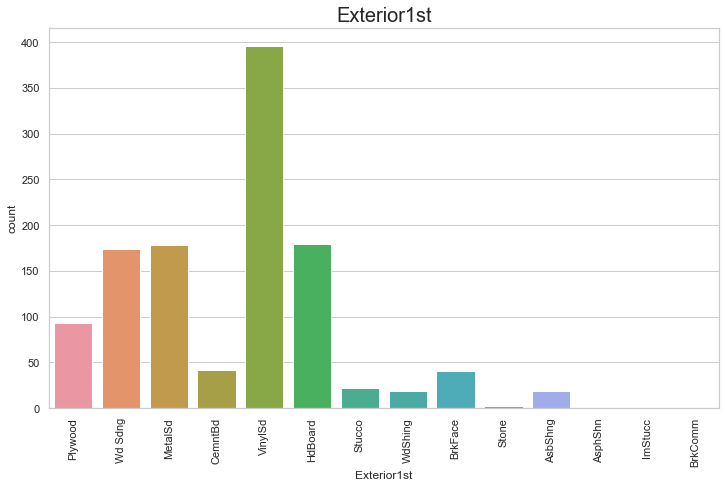

VinylSd    396
HdBoard    179
MetalSd    178
Wd Sdng    174
Plywood     93
CemntBd     42
BrkFace     41
Stucco      22
WdShing     19
AsbShng     19
Stone        2
BrkComm      1
AsphShn      1
ImStucc      1
Name: Exterior1st, dtype: int64


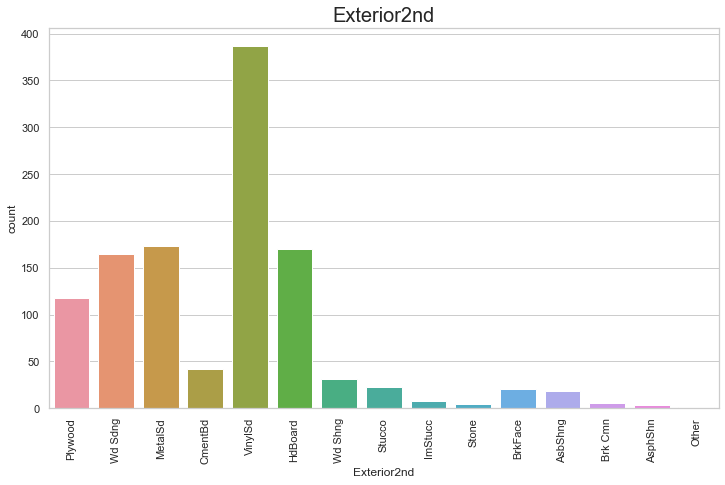

VinylSd    387
MetalSd    173
HdBoard    170
Wd Sdng    165
Plywood    118
CmentBd     42
Wd Shng     31
Stucco      23
BrkFace     20
AsbShng     18
ImStucc      8
Brk Cmn      5
Stone        4
AsphShn      3
Other        1
Name: Exterior2nd, dtype: int64


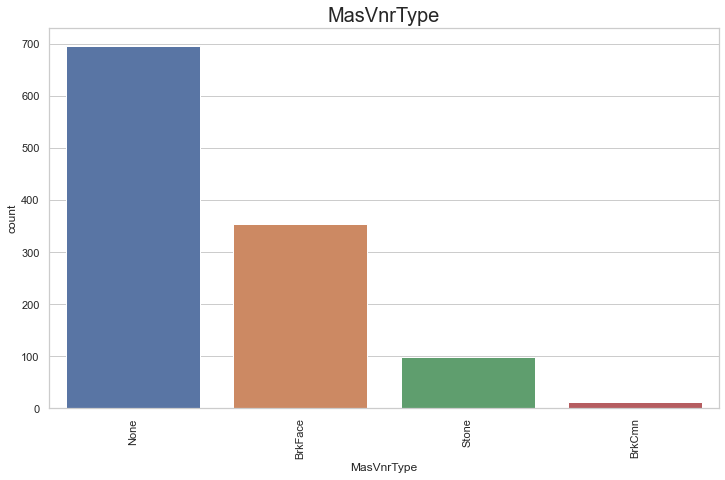

None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64


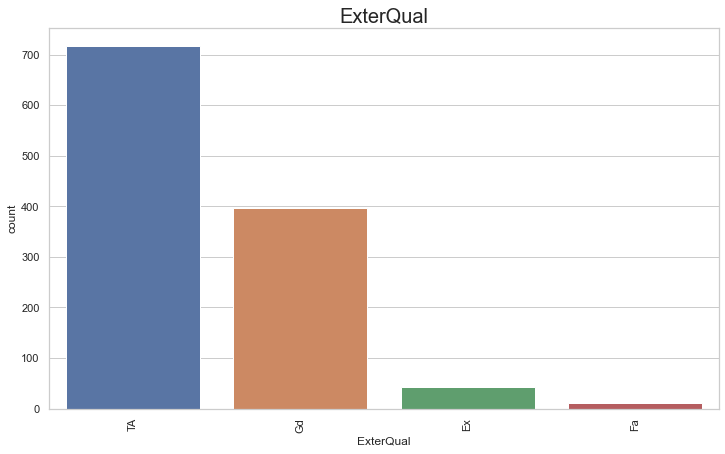

TA    717
Gd    397
Ex     43
Fa     11
Name: ExterQual, dtype: int64


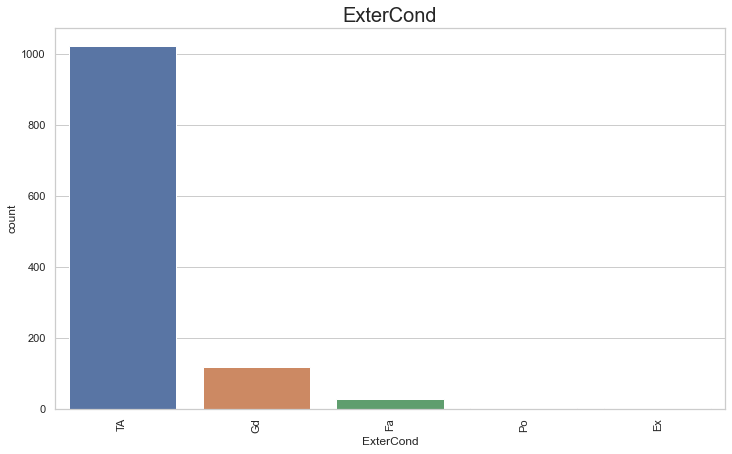

TA    1022
Gd     117
Fa      26
Ex       2
Po       1
Name: ExterCond, dtype: int64


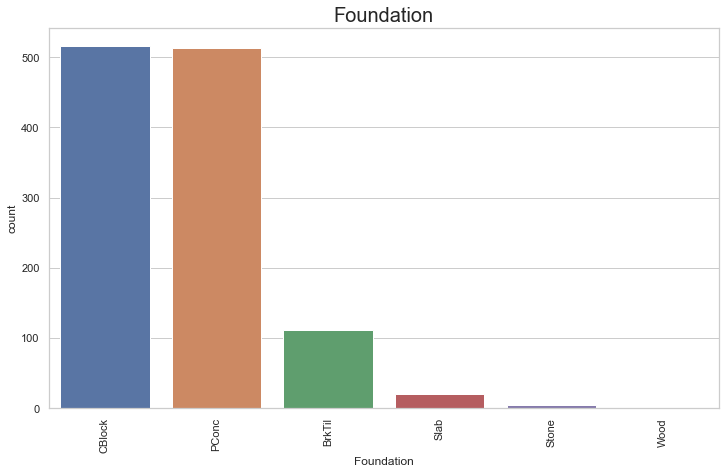

CBlock    516
PConc     513
BrkTil    112
Slab       21
Stone       5
Wood        1
Name: Foundation, dtype: int64


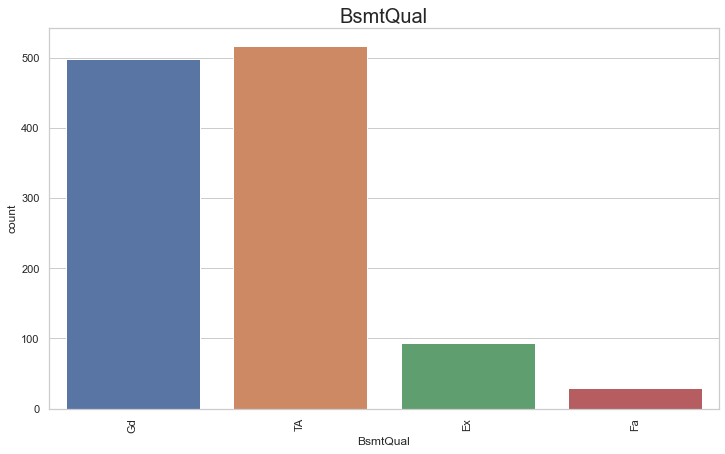

TA    517
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64


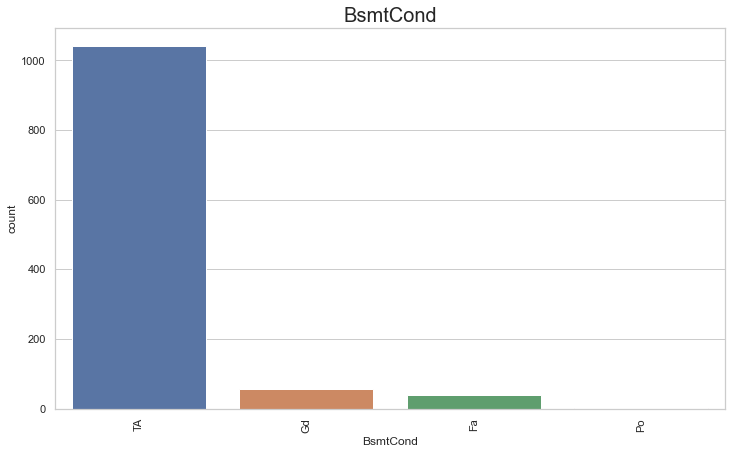

TA    1041
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64


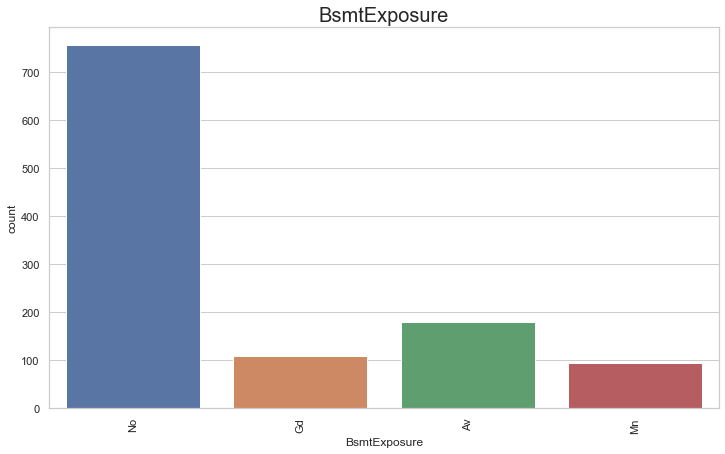

No    756
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64


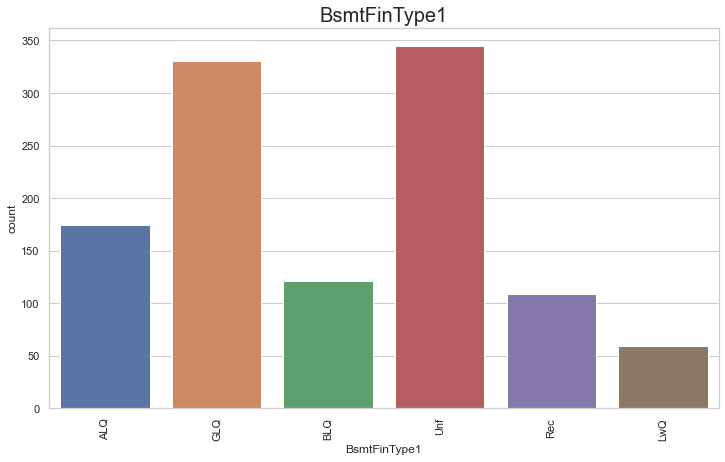

Unf    345
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64


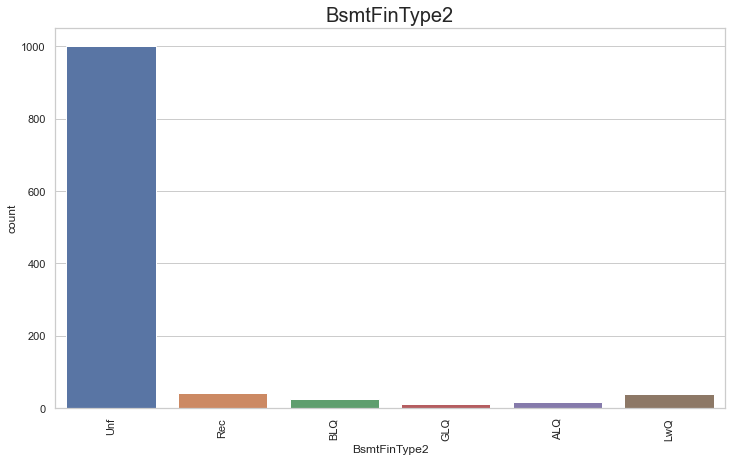

Unf    1002
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64


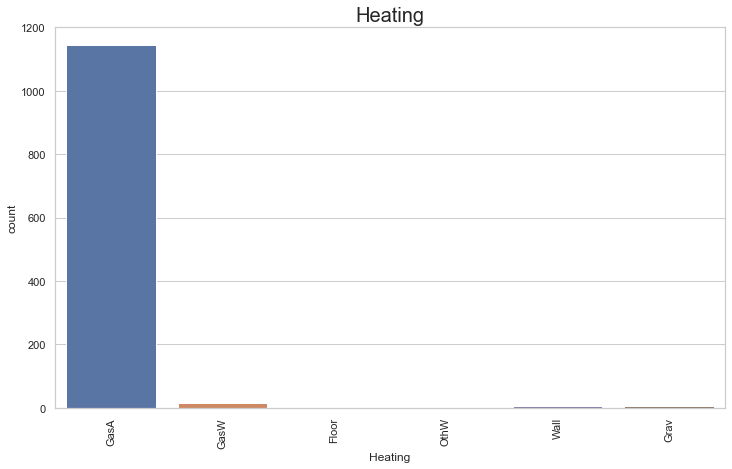

GasA     1143
GasW       14
Grav        5
Wall        4
Floor       1
OthW        1
Name: Heating, dtype: int64


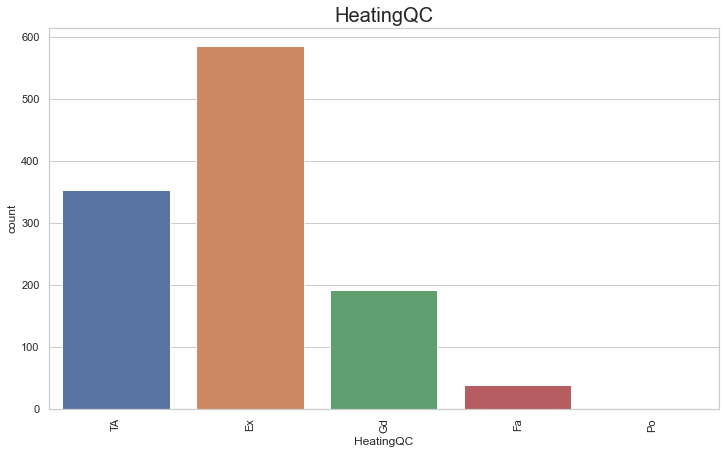

Ex    585
TA    352
Gd    192
Fa     38
Po      1
Name: HeatingQC, dtype: int64


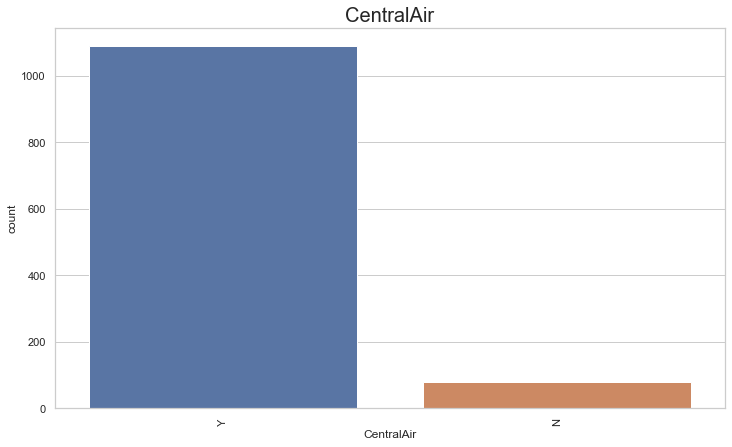

Y    1090
N      78
Name: CentralAir, dtype: int64


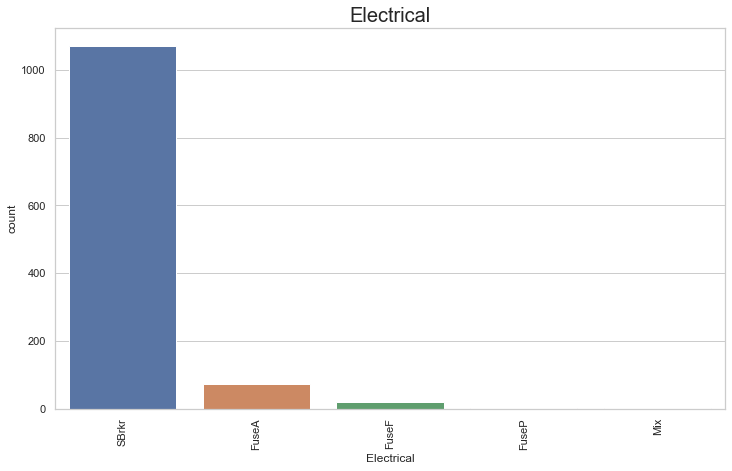

SBrkr    1070
FuseA      74
FuseF      21
FuseP       2
Mix         1
Name: Electrical, dtype: int64


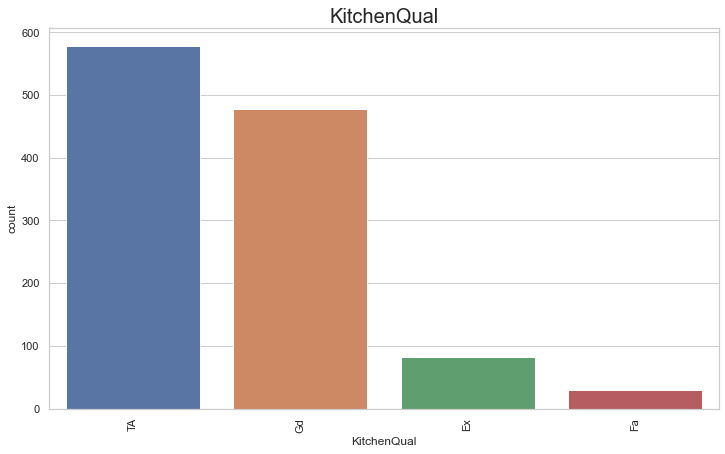

TA    578
Gd    478
Ex     82
Fa     30
Name: KitchenQual, dtype: int64


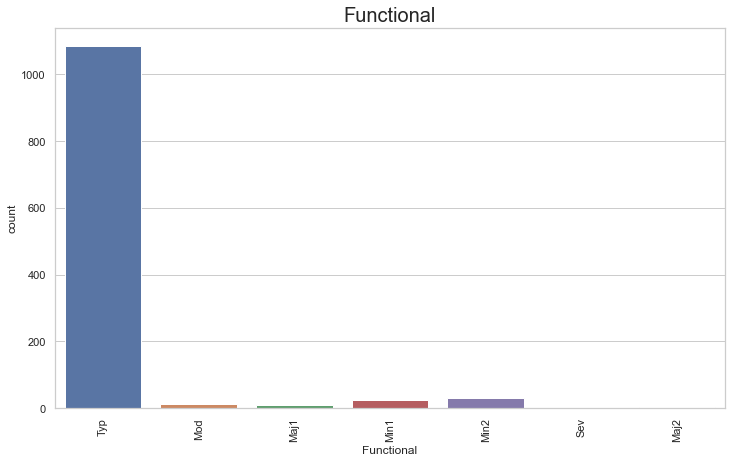

Typ     1085
Min2      30
Min1      25
Mod       12
Maj1      11
Maj2       4
Sev        1
Name: Functional, dtype: int64


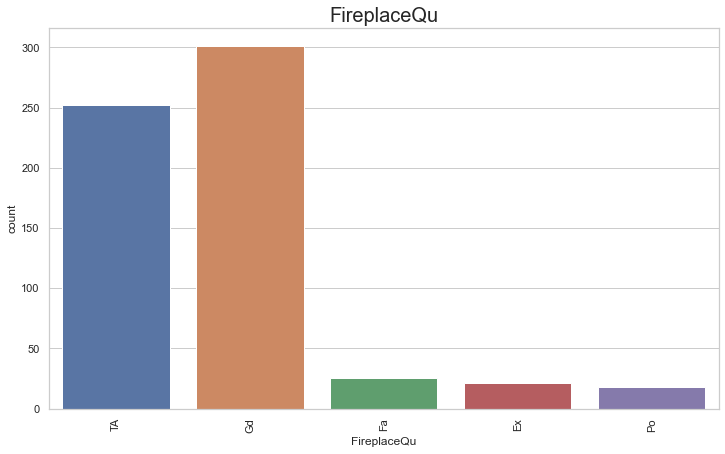

Gd    301
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64


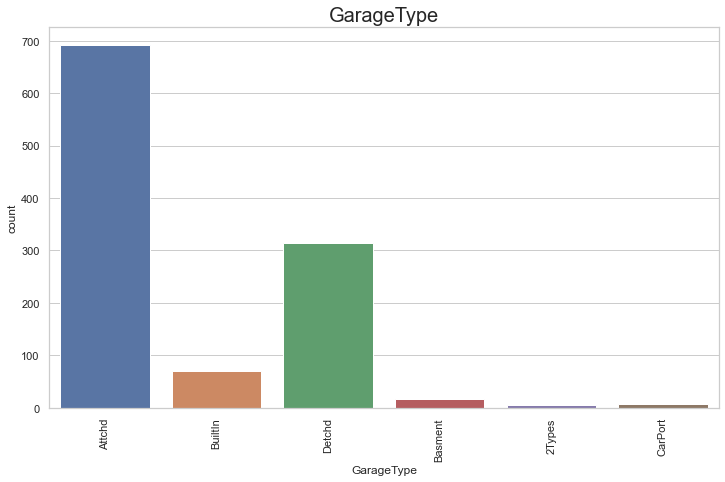

Attchd     691
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64


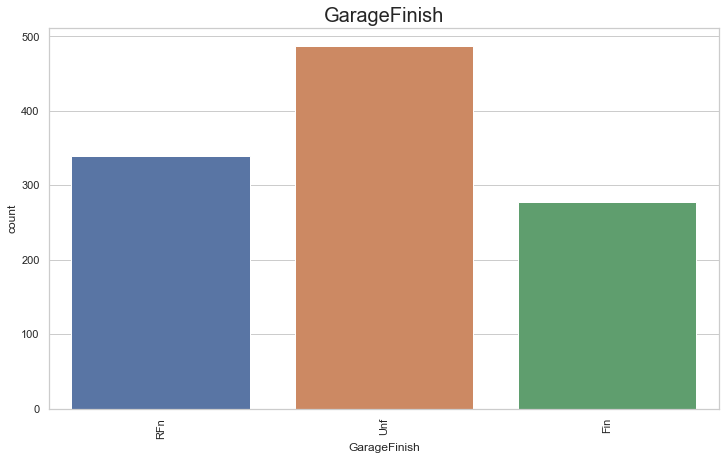

Unf    487
RFn    339
Fin    278
Name: GarageFinish, dtype: int64


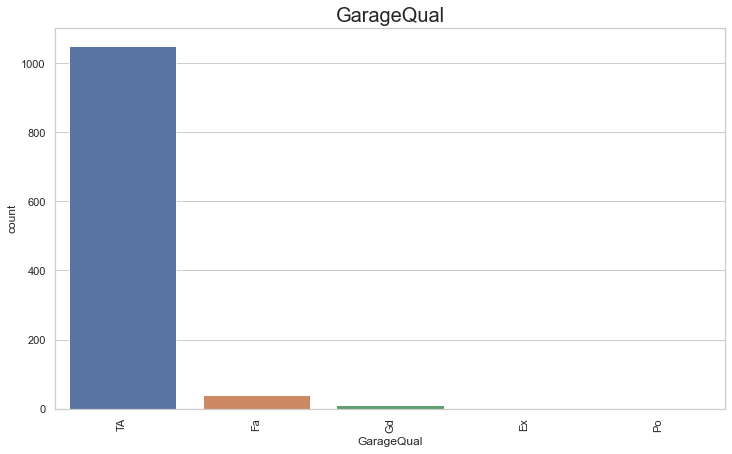

TA    1050
Fa      39
Gd      11
Ex       2
Po       2
Name: GarageQual, dtype: int64


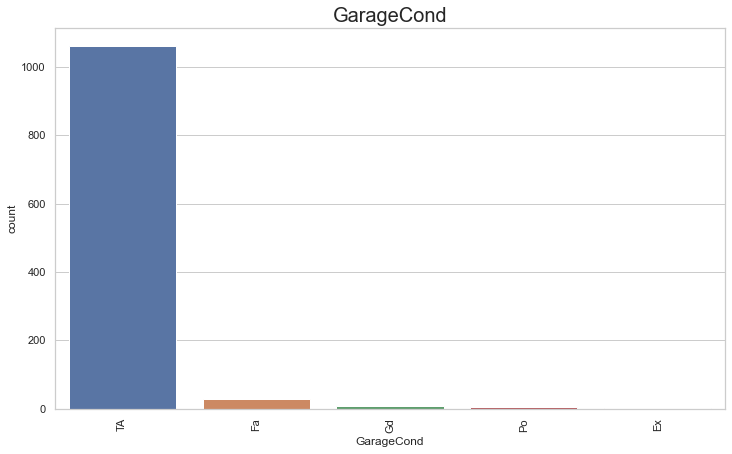

TA    1061
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64


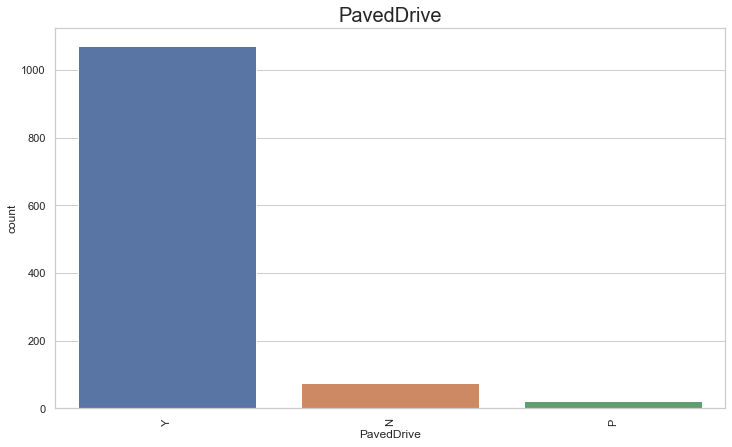

Y    1071
N      74
P      23
Name: PavedDrive, dtype: int64


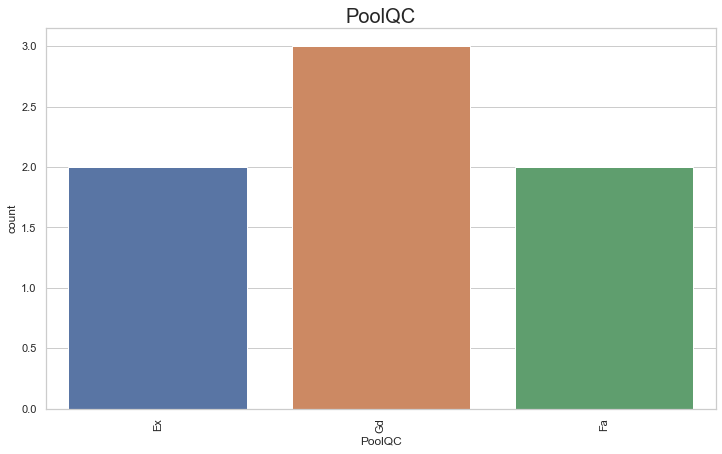

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64


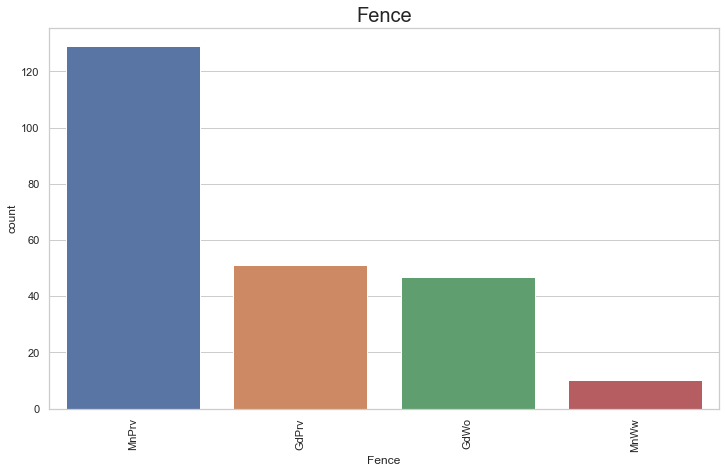

MnPrv    129
GdPrv     51
GdWo      47
MnWw      10
Name: Fence, dtype: int64


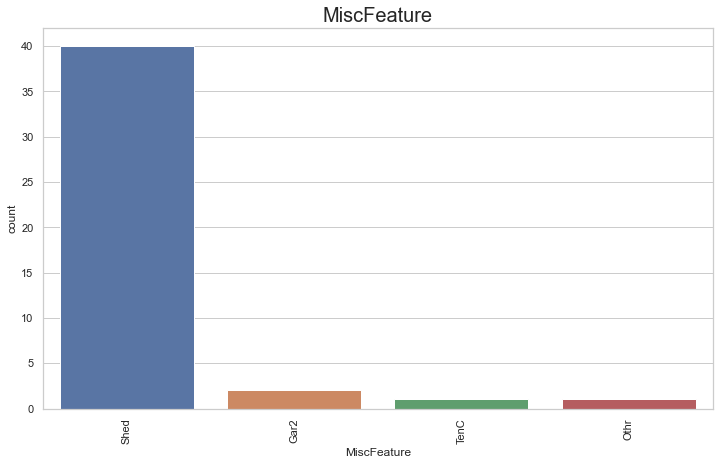

Shed    40
Gar2     2
Othr     1
TenC     1
Name: MiscFeature, dtype: int64


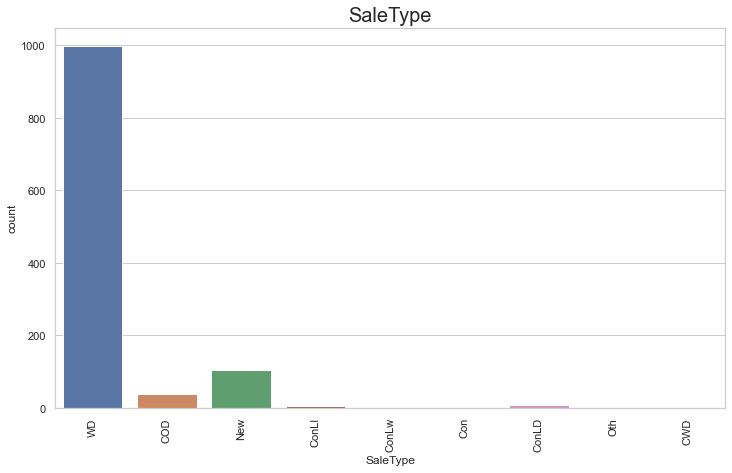

WD       999
New      106
COD       38
ConLD      8
ConLI      5
ConLw      4
CWD        3
Oth        3
Con        2
Name: SaleType, dtype: int64


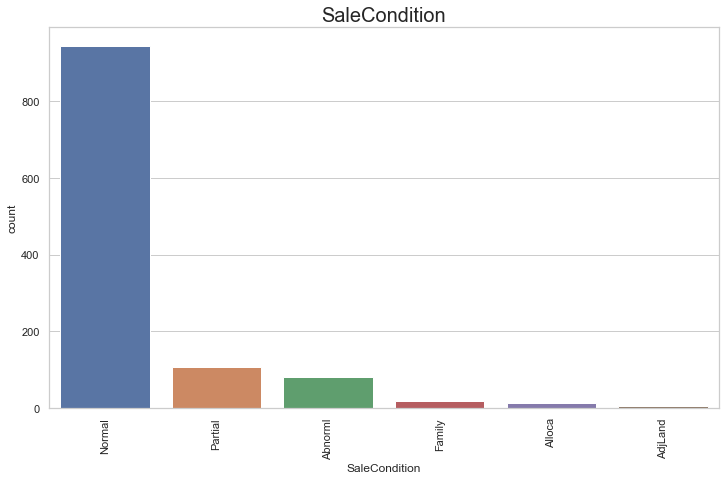

Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64


In [11]:
# creating countplot for all object types columns

sns.set(style="whitegrid")
for i in df.columns:
    if df[i].dtypes==object:
        plt.figure(figsize=(12,7))
        sns.countplot(df[i])
        plt.title(i,fontsize=20)
        plt.xticks(rotation="vertical")
        plt.show()
        
        print(df[i].value_counts())
    

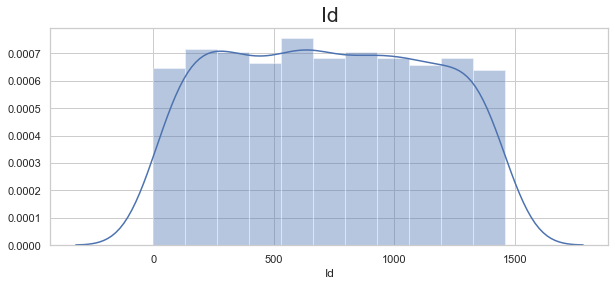

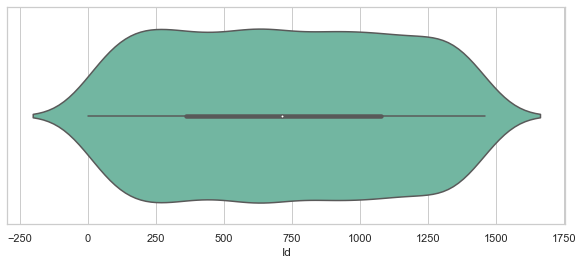

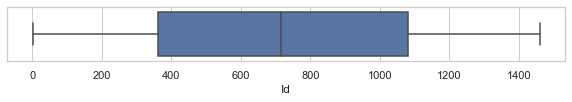

Max Five:
1460    1
501     1
476     1
477     1
478     1
Name: Id, dtype: int64
Min Five:
959    1
961    1
962    1
963    1
1      1
Name: Id, dtype: int64


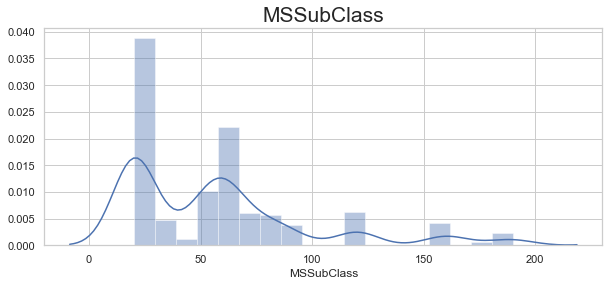

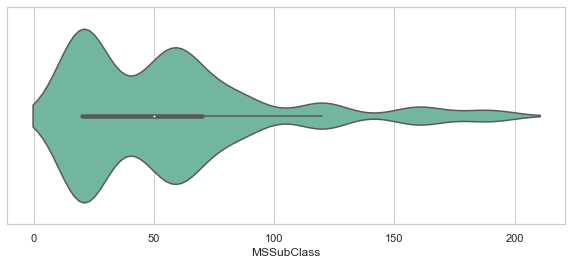

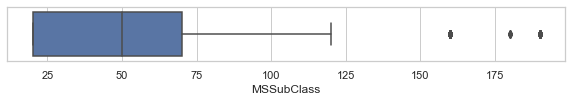

Max Five:
20     428
60     244
50     113
120     69
70      53
Name: MSSubClass, dtype: int64
Min Five:
85     19
75     14
45     10
180     6
40      3
Name: MSSubClass, dtype: int64


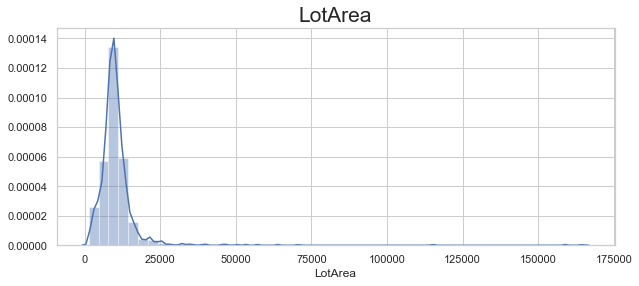

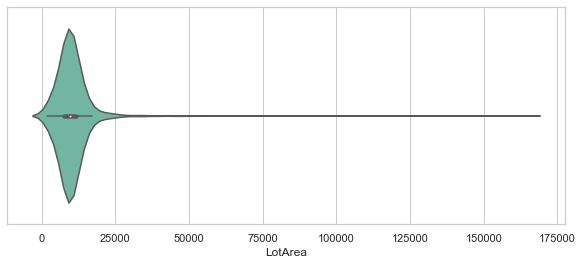

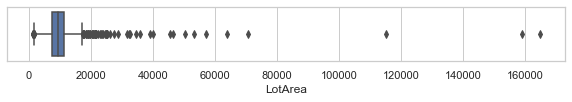

Max Five:
9600    21
7200    18
6000    16
8400    14
9000    11
Name: LotArea, dtype: int64
Min Five:
9439     1
7390     1
8160     1
7388     1
13284    1
Name: LotArea, dtype: int64


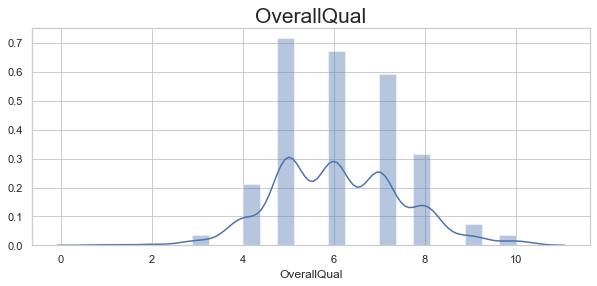

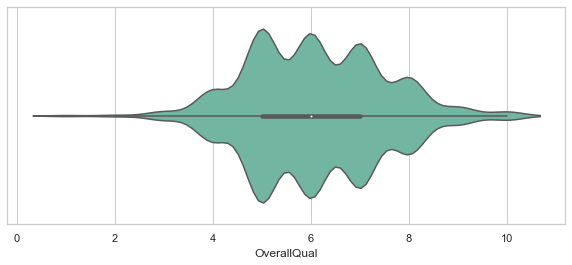

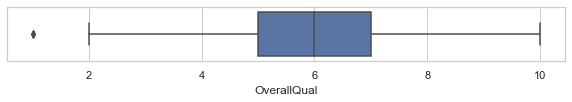

Max Five:
5    314
6    295
7    260
8    138
4     93
Name: OverallQual, dtype: int64
Min Five:
9     32
3     16
10    15
2      3
1      2
Name: OverallQual, dtype: int64


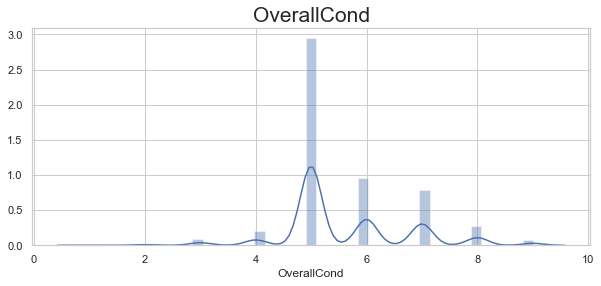

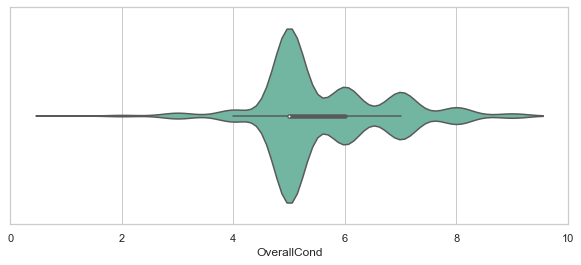

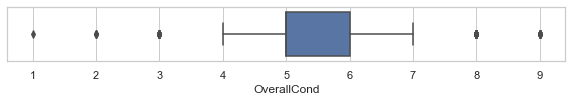

Max Five:
5    640
6    209
7    172
8     61
4     43
Name: OverallCond, dtype: int64
Min Five:
4    43
3    21
9    16
2     5
1     1
Name: OverallCond, dtype: int64


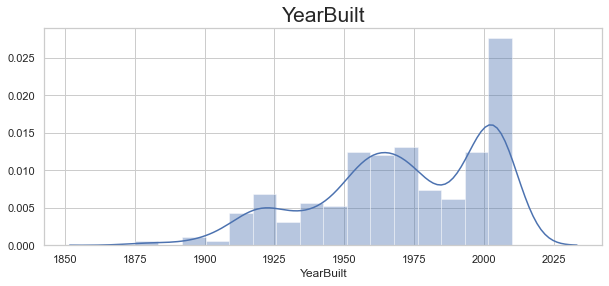

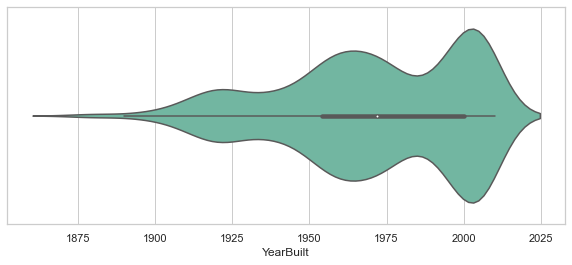

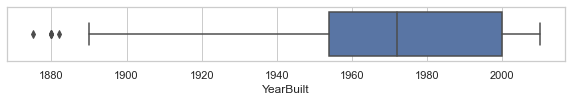

Max Five:
2006    57
2005    51
2007    41
2004    37
2003    33
Name: YearBuilt, dtype: int64
Min Five:
1913    1
1917    1
1927    1
1989    1
1875    1
Name: YearBuilt, dtype: int64


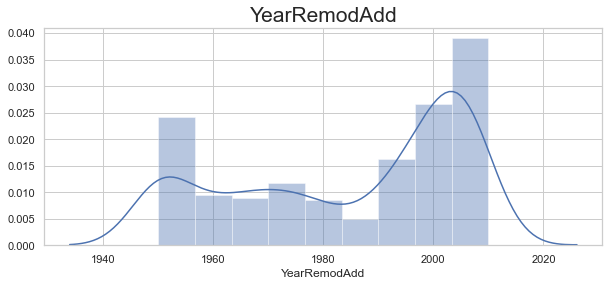

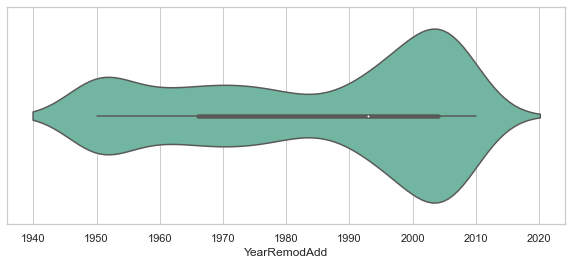

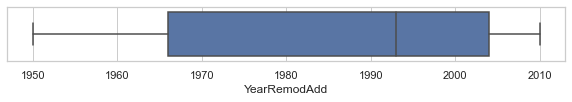

Max Five:
1950    146
2006     82
2007     64
2005     57
2004     46
Name: YearRemodAdd, dtype: int64
Min Five:
2010    5
1974    4
1983    4
1952    4
1951    4
Name: YearRemodAdd, dtype: int64


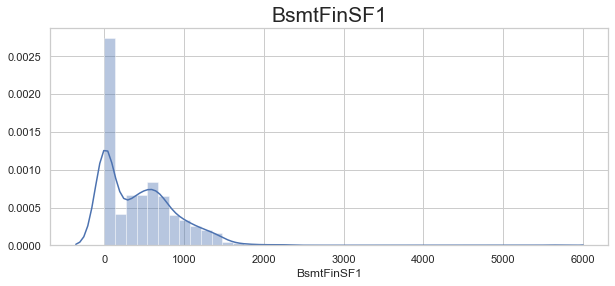

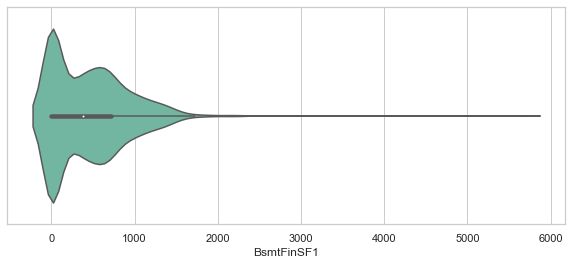

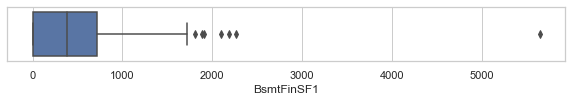

Max Five:
0      375
24      10
16       8
20       5
616      5
Name: BsmtFinSF1, dtype: int64
Min Five:
781     1
787     1
795     1
803     1
1904    1
Name: BsmtFinSF1, dtype: int64


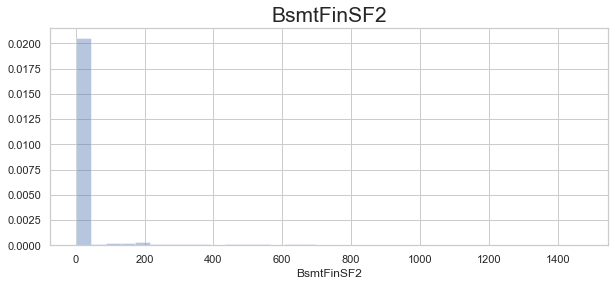

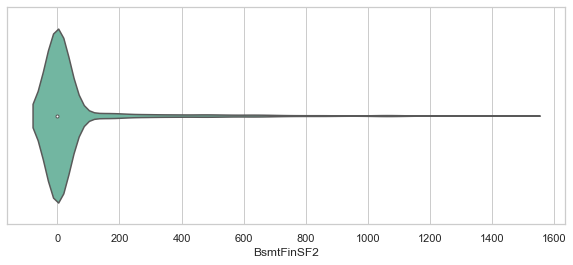

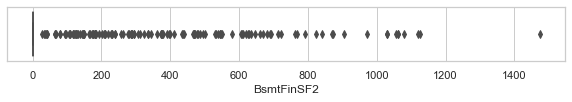

Max Five:
0      1032
180       5
374       2
290       2
182       2
Name: BsmtFinSF2, dtype: int64
Min Five:
547    1
551    1
580    1
606    1
362    1
Name: BsmtFinSF2, dtype: int64


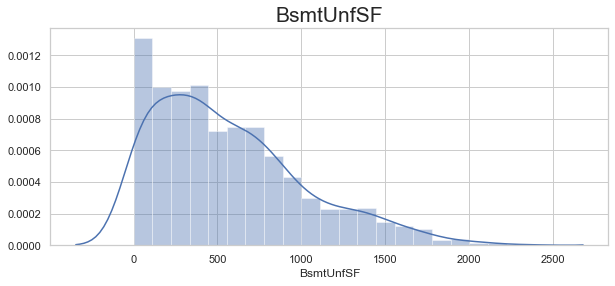

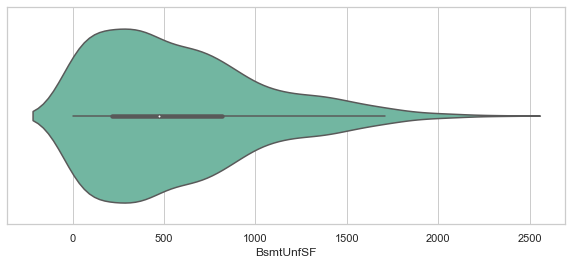

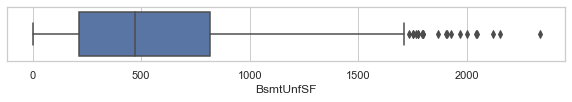

Max Five:
0      97
728     8
270     6
300     6
440     6
Name: BsmtUnfSF, dtype: int64
Min Five:
538     1
542     1
543     1
1063    1
2046    1
Name: BsmtUnfSF, dtype: int64


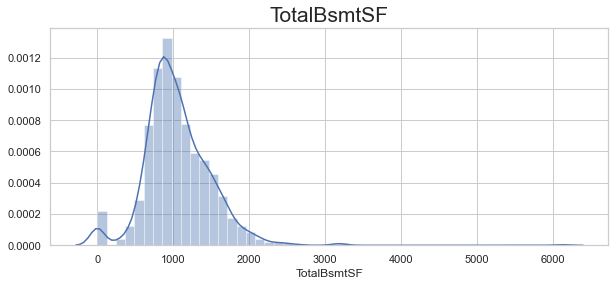

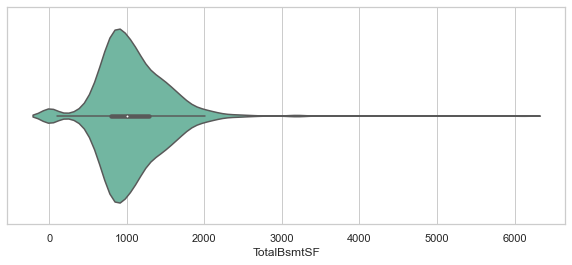

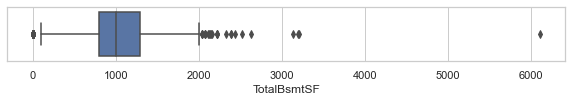

Max Five:
0      30
864    28
912    13
672    13
816    12
Name: TotalBsmtSF, dtype: int64
Min Five:
1459    1
1454    1
1444    1
1437    1
2046    1
Name: TotalBsmtSF, dtype: int64


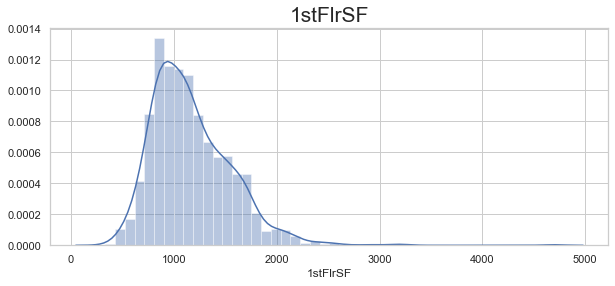

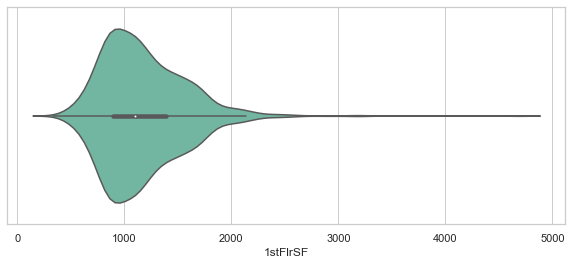

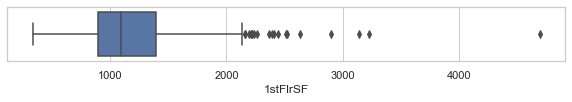

Max Five:
864     19
1040    13
912     12
894     10
848      9
Name: 1stFlrSF, dtype: int64
Min Five:
1516    1
1085    1
1512    1
1507    1
2046    1
Name: 1stFlrSF, dtype: int64


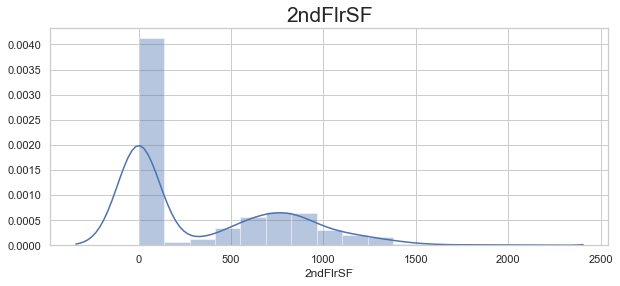

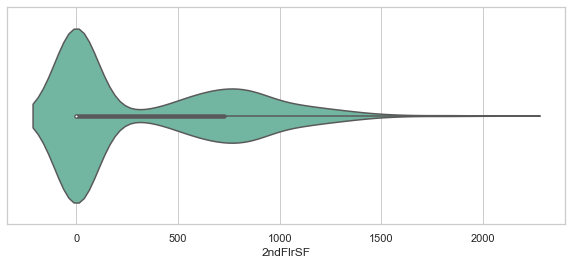

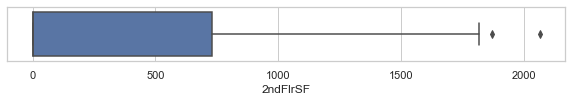

Max Five:
0      663
728      9
504      7
600      6
546      6
Name: 2ndFlrSF, dtype: int64
Min Five:
1134    1
1141    1
788     1
787     1
1872    1
Name: 2ndFlrSF, dtype: int64


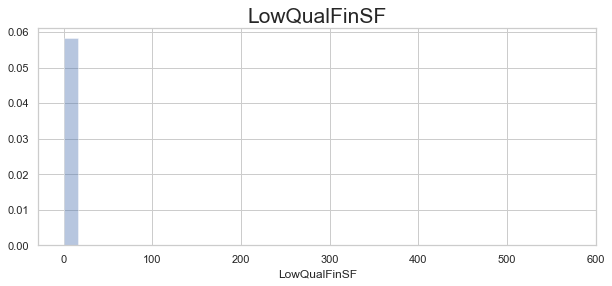

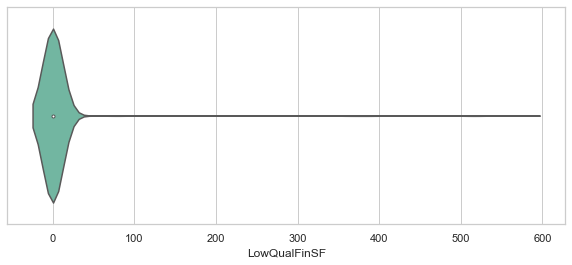

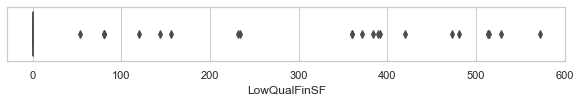

Max Five:
0      1145
80        3
360       2
371       1
53        1
Name: LowQualFinSF, dtype: int64
Min Five:
481    1
513    1
514    1
515    1
384    1
Name: LowQualFinSF, dtype: int64


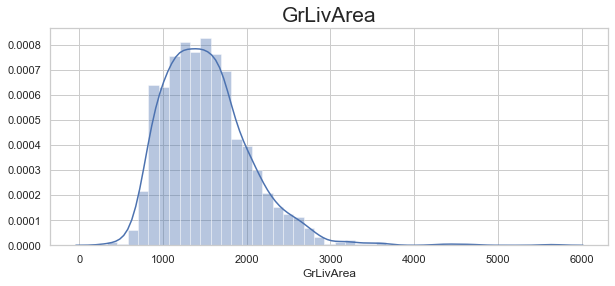

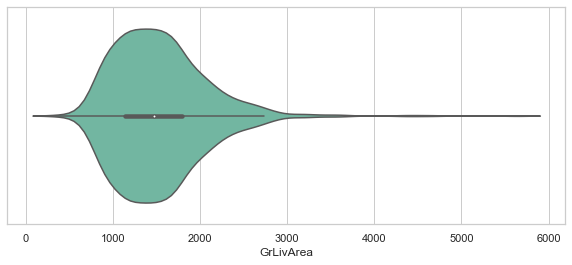

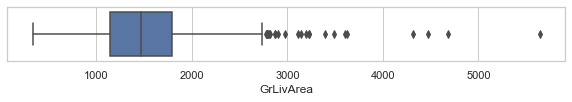

Max Five:
864     16
1040    11
894     10
1456     9
1200     8
Name: GrLivArea, dtype: int64
Min Five:
1471    1
1469    1
1468    1
1459    1
2054    1
Name: GrLivArea, dtype: int64


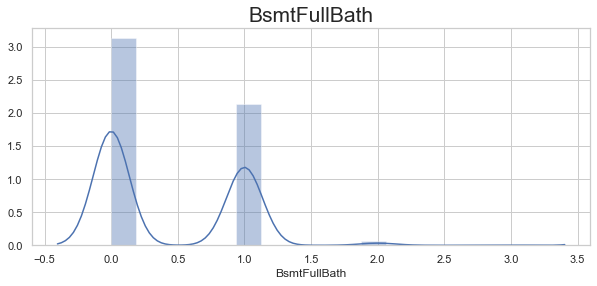

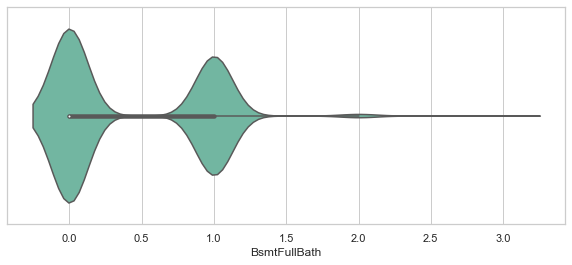

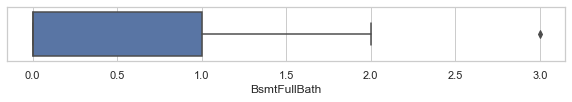

Max Five:
0    686
1    468
2     13
3      1
Name: BsmtFullBath, dtype: int64
Min Five:
0    686
1    468
2     13
3      1
Name: BsmtFullBath, dtype: int64


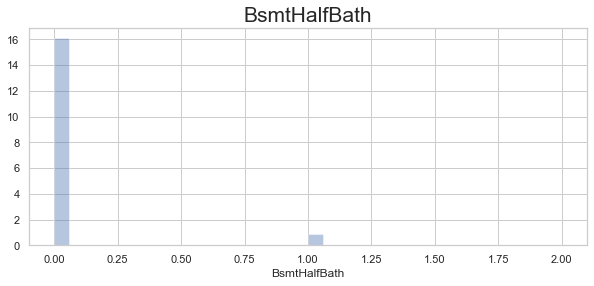

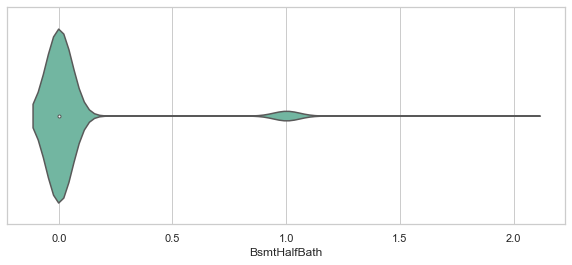

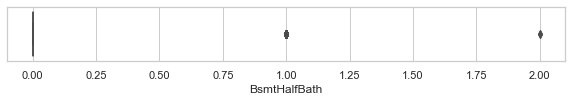

Max Five:
0    1105
1      61
2       2
Name: BsmtHalfBath, dtype: int64
Min Five:
0    1105
1      61
2       2
Name: BsmtHalfBath, dtype: int64


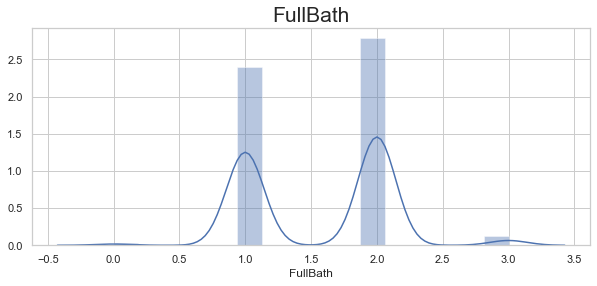

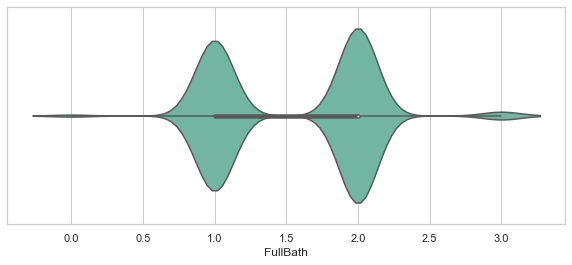

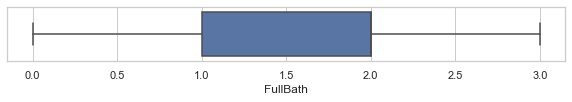

Max Five:
2    610
1    524
3     27
0      7
Name: FullBath, dtype: int64
Min Five:
2    610
1    524
3     27
0      7
Name: FullBath, dtype: int64


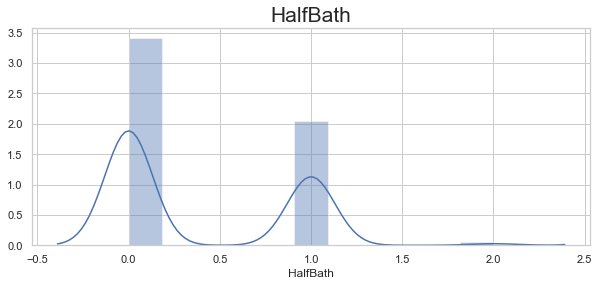

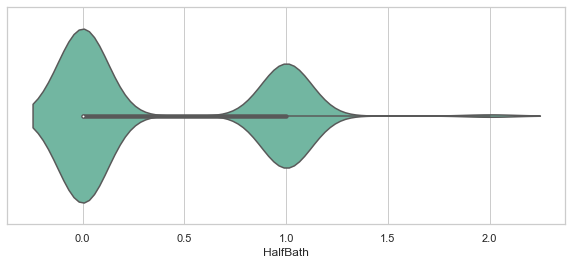

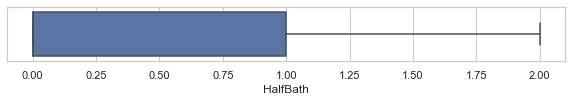

Max Five:
0    724
1    434
2     10
Name: HalfBath, dtype: int64
Min Five:
0    724
1    434
2     10
Name: HalfBath, dtype: int64


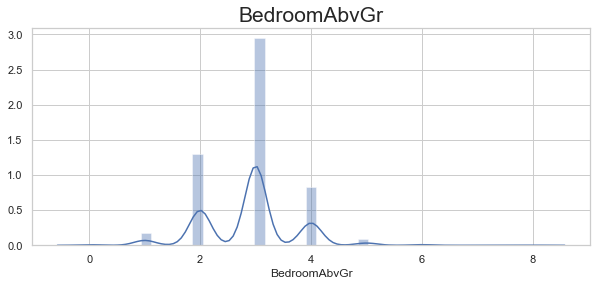

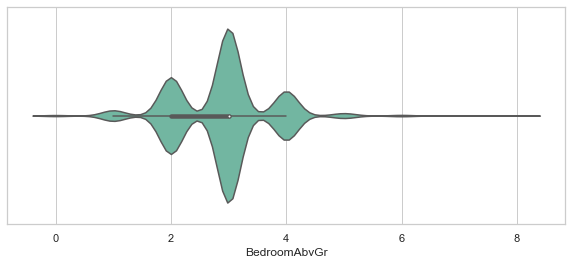

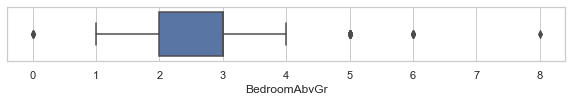

Max Five:
3    640
2    281
4    180
1     39
5     18
Name: BedroomAbvGr, dtype: int64
Min Five:
1    39
5    18
6     5
0     4
8     1
Name: BedroomAbvGr, dtype: int64


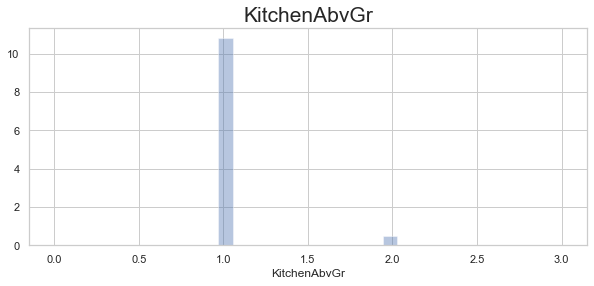

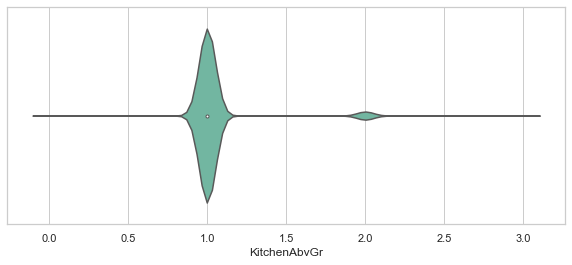

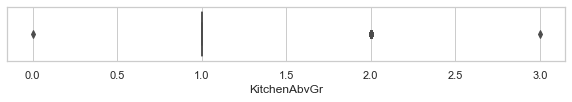

Max Five:
1    1114
2      52
3       1
0       1
Name: KitchenAbvGr, dtype: int64
Min Five:
1    1114
2      52
3       1
0       1
Name: KitchenAbvGr, dtype: int64


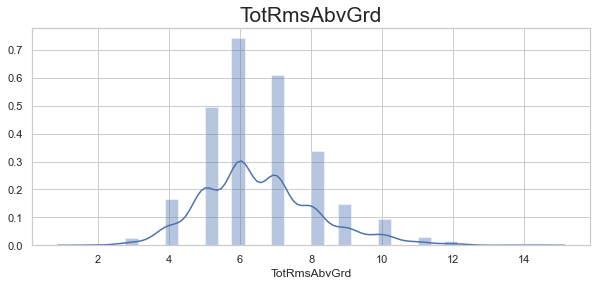

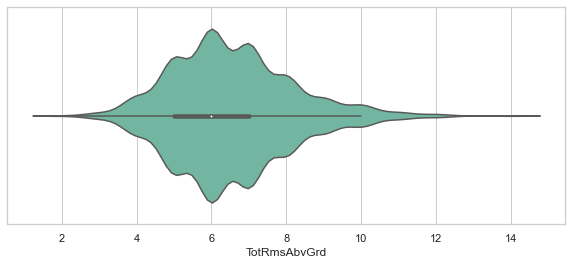

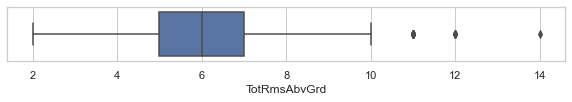

Max Five:
6    325
7    268
5    217
8    148
4     72
Name: TotRmsAbvGrd, dtype: int64
Min Five:
11    13
3     11
12     6
14     1
2      1
Name: TotRmsAbvGrd, dtype: int64


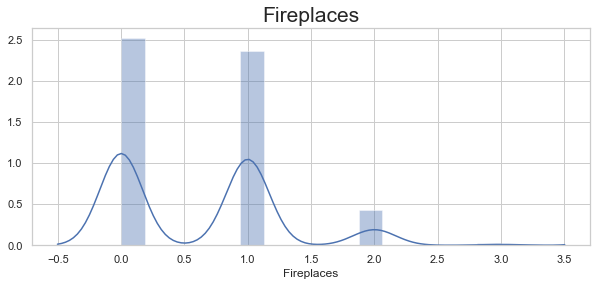

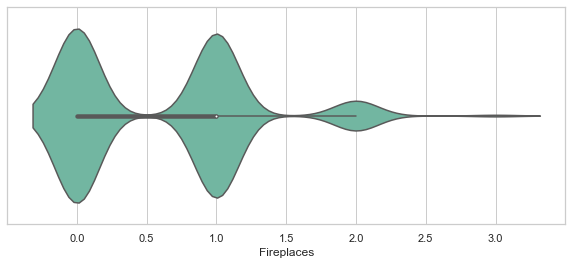

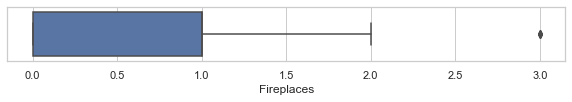

Max Five:
0    551
1    518
2     94
3      5
Name: Fireplaces, dtype: int64
Min Five:
0    551
1    518
2     94
3      5
Name: Fireplaces, dtype: int64


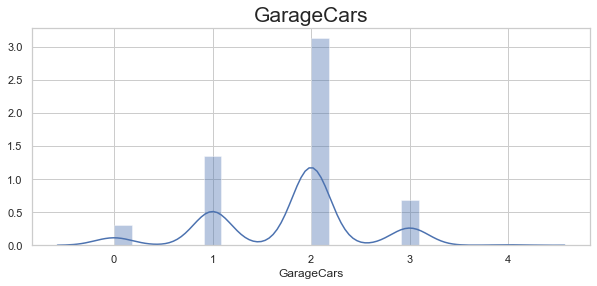

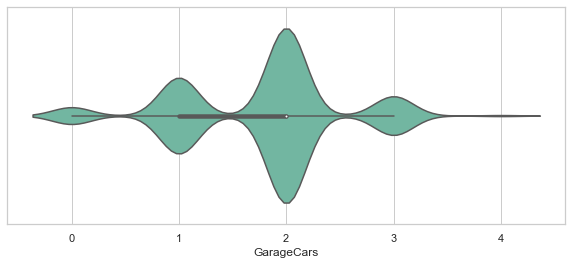

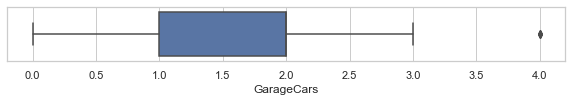

Max Five:
2    665
1    288
3    147
0     64
4      4
Name: GarageCars, dtype: int64
Min Five:
2    665
1    288
3    147
0     64
4      4
Name: GarageCars, dtype: int64


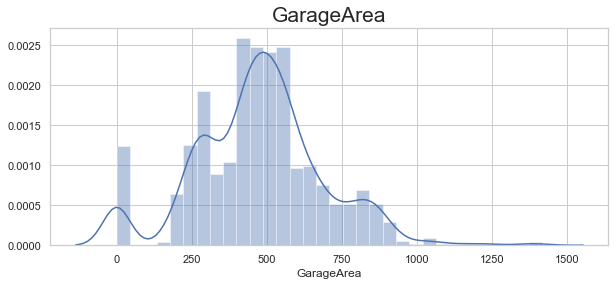

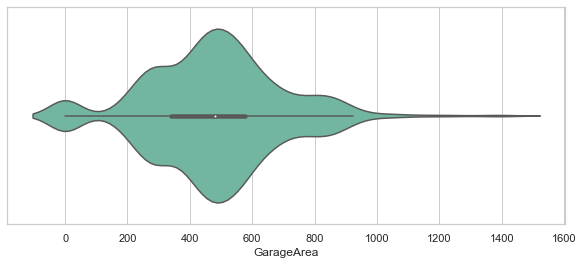

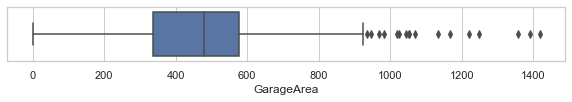

Max Five:
0      64
440    44
576    39
240    31
528    26
Name: GarageArea, dtype: int64
Min Five:
566     1
562     1
558     1
554     1
1418    1
Name: GarageArea, dtype: int64


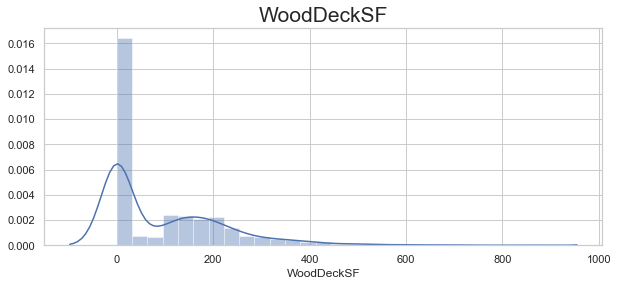

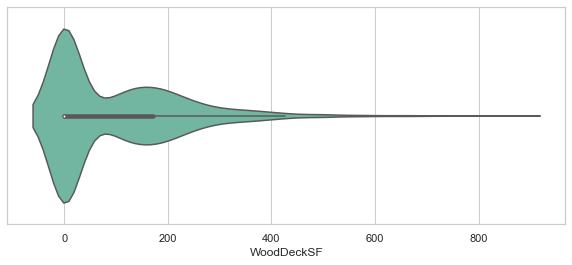

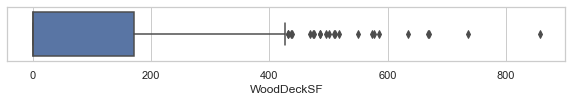

Max Five:
0      603
144     29
192     28
100     26
120     25
Name: WoodDeckSF, dtype: int64
Min Five:
185    1
342    1
183    1
344    1
857    1
Name: WoodDeckSF, dtype: int64


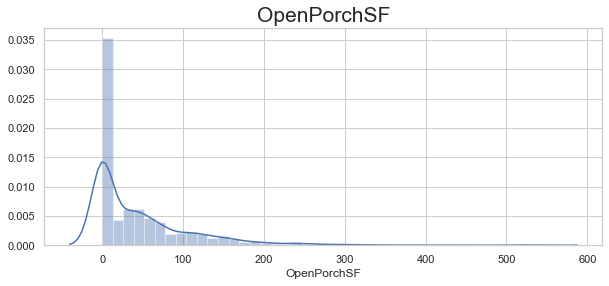

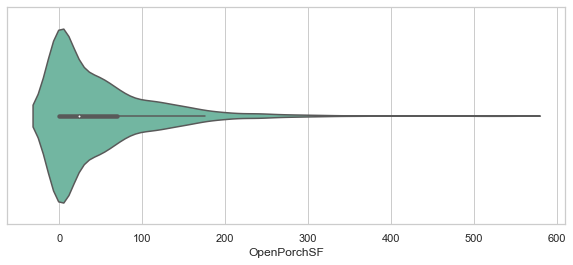

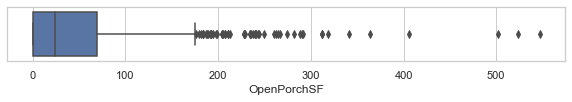

Max Five:
0     531
36     24
48     18
20     17
24     14
Name: OpenPorchSF, dtype: int64
Min Five:
176    1
180    1
182    1
187    1
111    1
Name: OpenPorchSF, dtype: int64


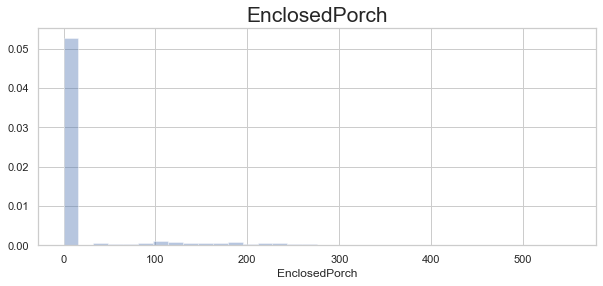

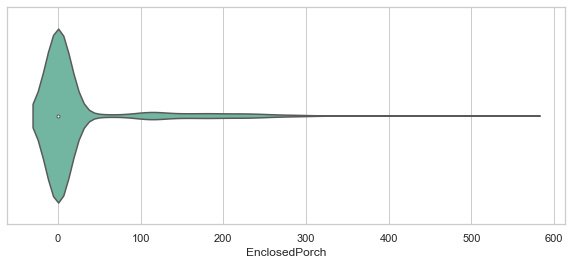

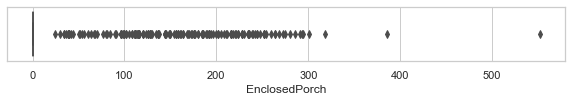

Max Five:
0      999
112     13
96       6
192      5
216      5
Name: EnclosedPorch, dtype: int64
Min Five:
196    1
200    1
205    1
208    1
160    1
Name: EnclosedPorch, dtype: int64


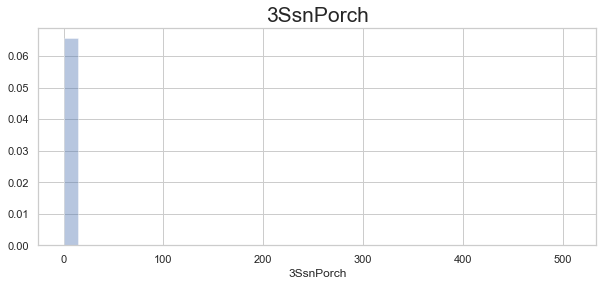

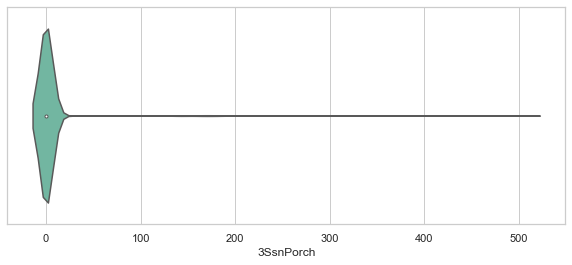

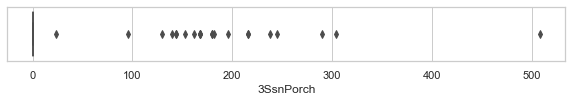

Max Five:
0      1146
168       3
216       2
180       2
144       2
Name: 3SsnPorch, dtype: int64
Min Five:
140    1
130    1
96     1
23     1
508    1
Name: 3SsnPorch, dtype: int64


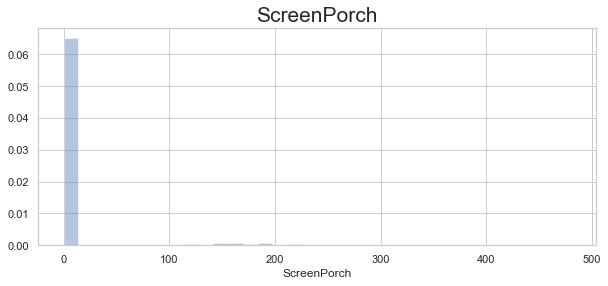

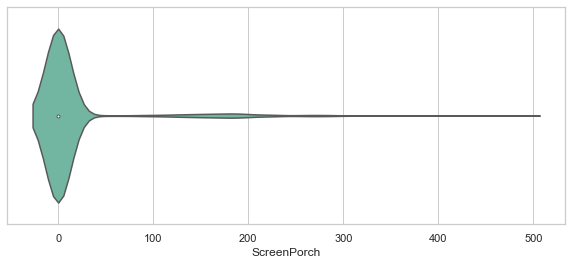

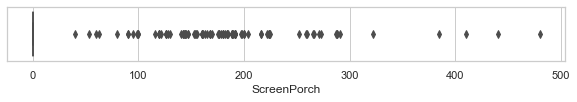

Max Five:
0      1073
192       5
224       5
189       4
126       3
Name: ScreenPorch, dtype: int64
Min Five:
178    1
440    1
170    1
165    1
175    1
Name: ScreenPorch, dtype: int64


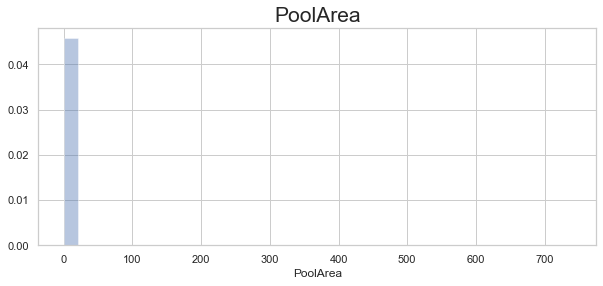

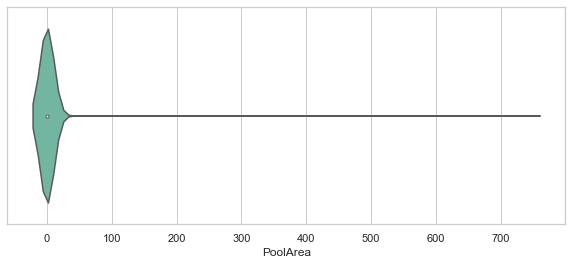

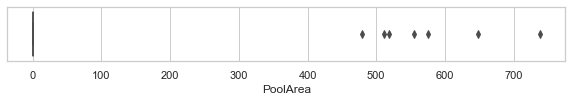

Max Five:
0      1161
738       1
648       1
576       1
555       1
Name: PoolArea, dtype: int64
Min Five:
576    1
555    1
519    1
512    1
480    1
Name: PoolArea, dtype: int64


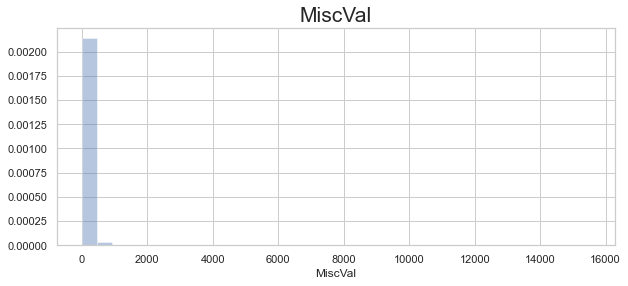

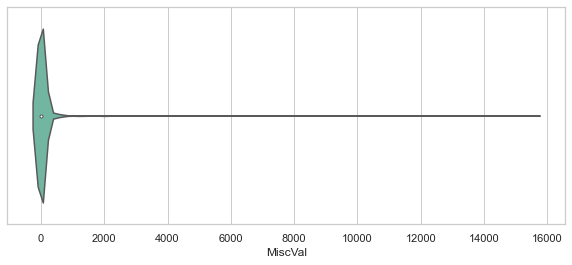

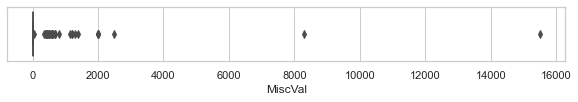

Max Five:
0       1126
400       10
500        7
2000       4
700        3
Name: MiscVal, dtype: int64
Min Five:
1300    1
350     1
8300    1
54      1
560     1
Name: MiscVal, dtype: int64


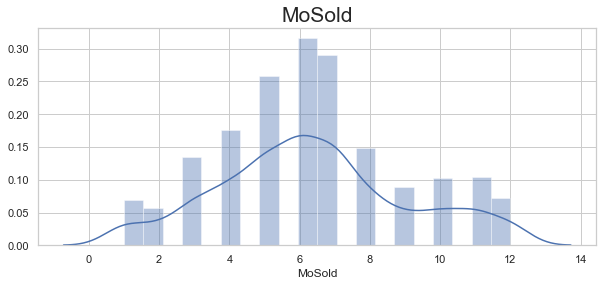

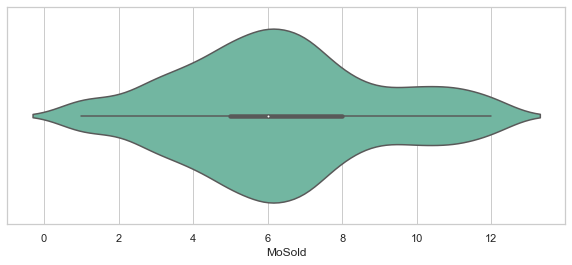

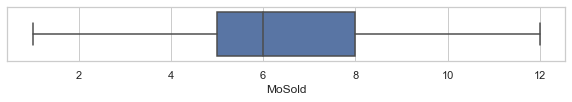

Max Five:
6    203
7    187
5    166
4    113
8     95
Name: MoSold, dtype: int64
Min Five:
10    66
9     57
12    46
1     44
2     37
Name: MoSold, dtype: int64


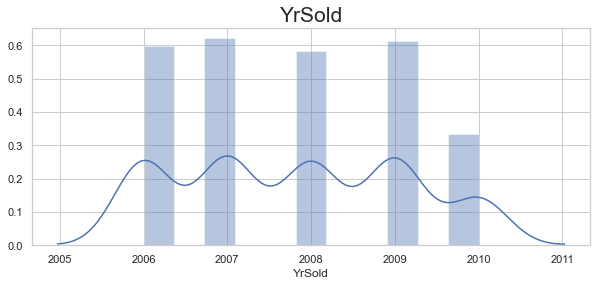

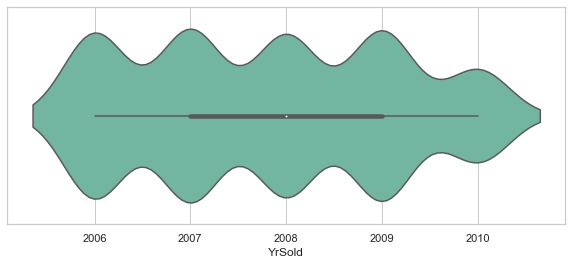

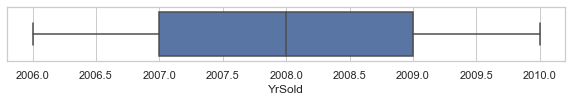

Max Five:
2007    264
2009    260
2006    254
2008    248
2010    142
Name: YrSold, dtype: int64
Min Five:
2007    264
2009    260
2006    254
2008    248
2010    142
Name: YrSold, dtype: int64


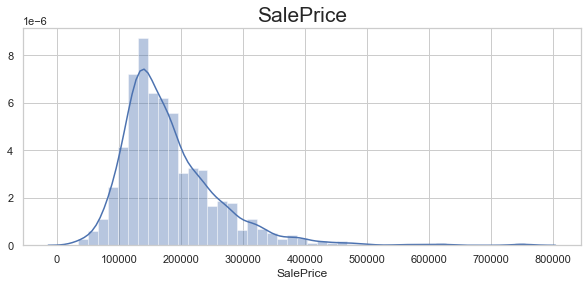

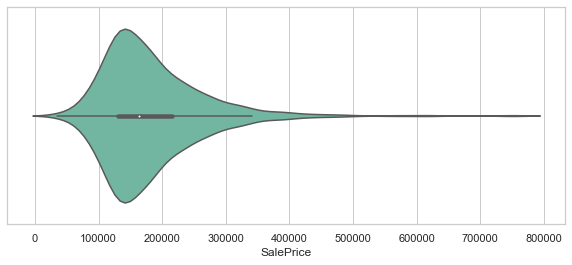

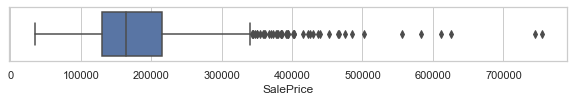

Max Five:
140000    18
135000    16
155000    12
139000    11
160000    11
Name: SalePrice, dtype: int64
Min Five:
126175    1
204000    1
186000    1
369900    1
105500    1
Name: SalePrice, dtype: int64


In [12]:
# show visualiztion for int types columns

for i in df.columns:
    if df[i].dtypes=="int64":
        
        plt.figure(figsize=(10,4))
        sns.distplot(df[i])
        plt.title(i,fontsize=21)
        plt.show()
        
        plt.figure(figsize=(10,4))
        sns.violinplot(x=df[i],palette="Set2")
        plt.show()
        
        plt.figure(figsize=(10,1))
        sns.boxplot(df[i])
        plt.show()
        
        print('Max Five:')
        print(df[i].value_counts().head())
        print('Min Five:')
        print(df[i].value_counts().tail())

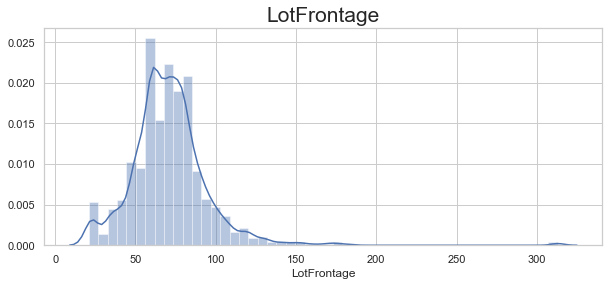

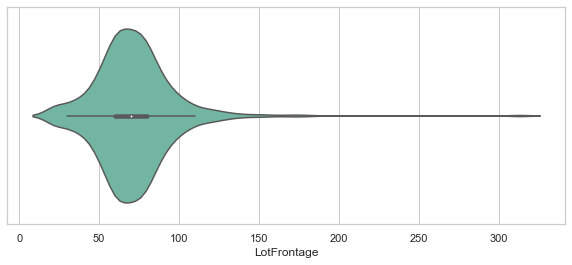

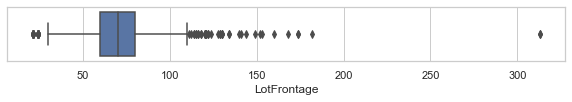

Max Five:
60.0    111
80.0     60
70.0     58
75.0     46
50.0     44
Name: LotFrontage, dtype: int64
Min Five:
112.0    1
111.0    1
144.0    1
102.0    1
149.0    1
Name: LotFrontage, dtype: int64


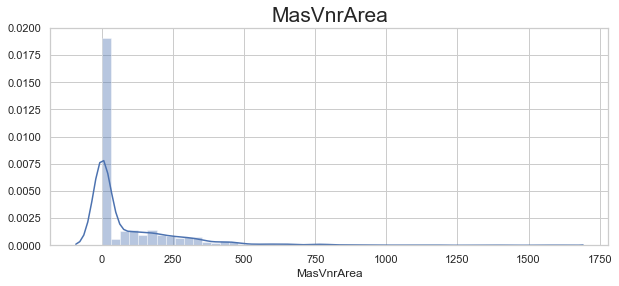

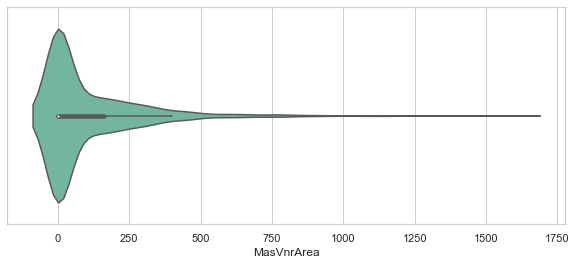

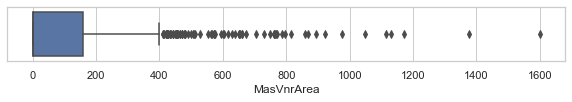

Max Five:
0.0      692
72.0       7
120.0      6
180.0      6
106.0      5
Name: MasVnrArea, dtype: int64
Min Five:
443.0    1
105.0    1
894.0    1
650.0    1
567.0    1
Name: MasVnrArea, dtype: int64


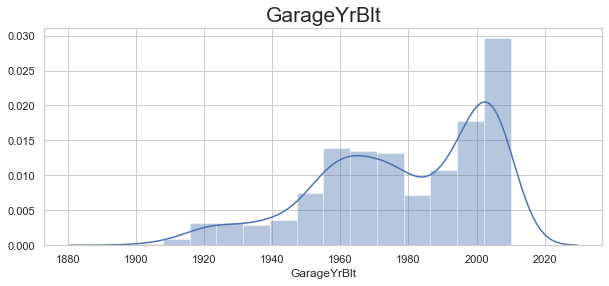

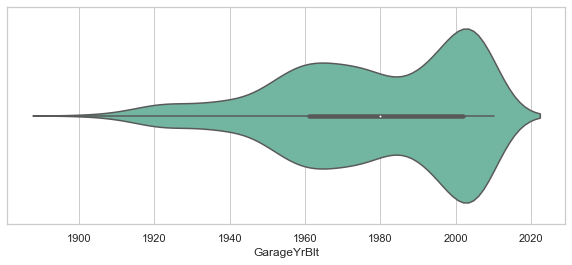

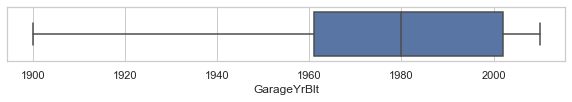

Max Five:
2006.0    52
2005.0    51
2007.0    40
2003.0    37
2004.0    36
Name: GarageYrBlt, dtype: int64
Min Five:
1927.0    1
1933.0    1
1908.0    1
1900.0    1
1906.0    1
Name: GarageYrBlt, dtype: int64


In [13]:
# show visualization for float types columns

for i in df.columns:
    if df[i].dtypes=="float64":
        
        plt.figure(figsize=(10,4))
        sns.distplot(df[i])
        plt.title(i,fontsize=21)
        plt.show()
        
        plt.figure(figsize=(10,4))
        sns.violinplot(x=df[i],palette="Set2")
        plt.show()
        
        plt.figure(figsize=(10,1))
        sns.boxplot(df[i])
        plt.show()
        
        print('Max Five:')
        print(df[i].value_counts().head())
        print('Min Five:')
        print(df[i].value_counts().tail())

## Bivariate Analysis

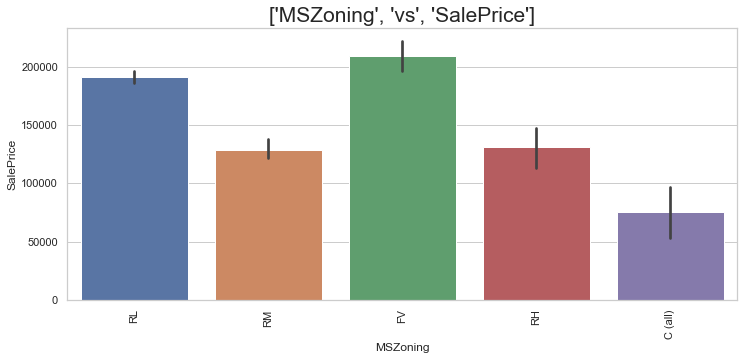

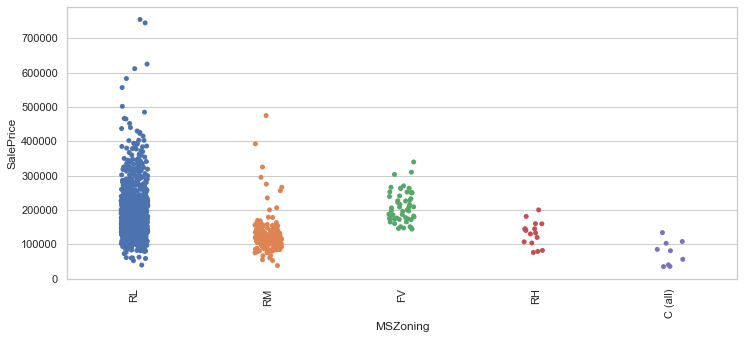

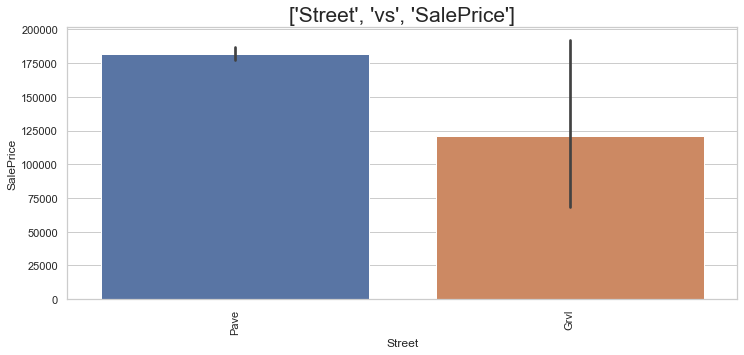

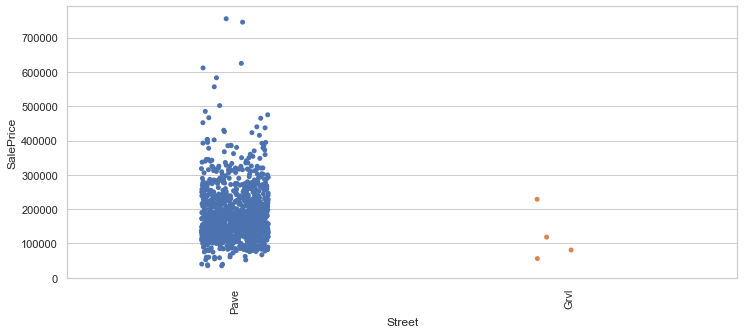

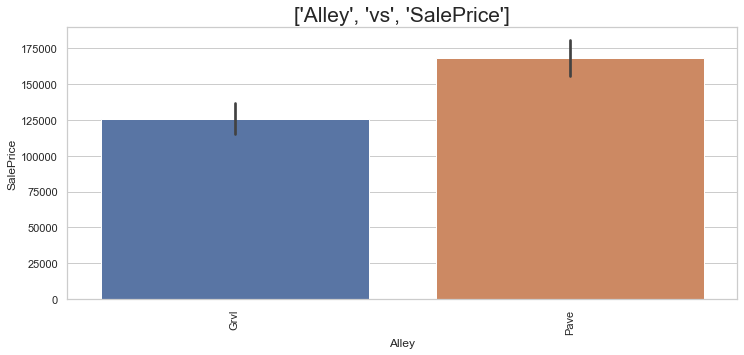

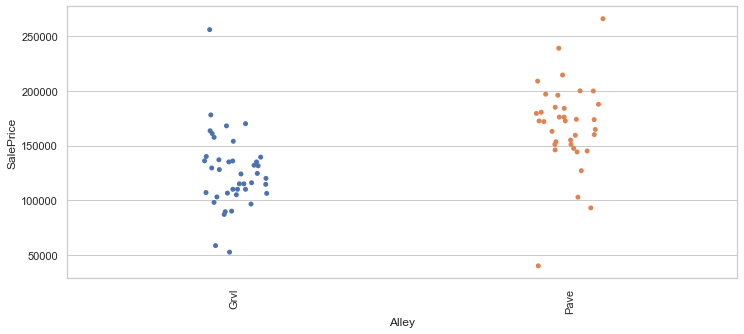

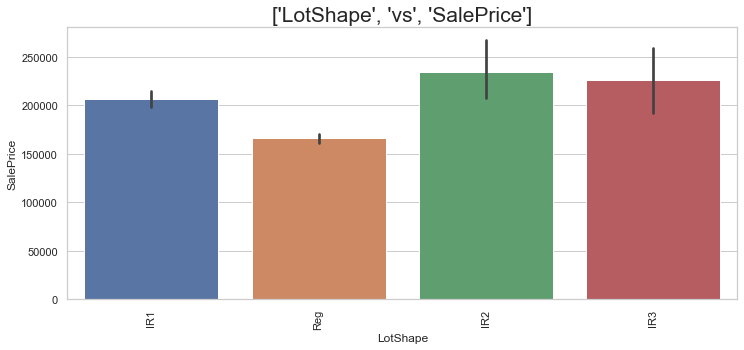

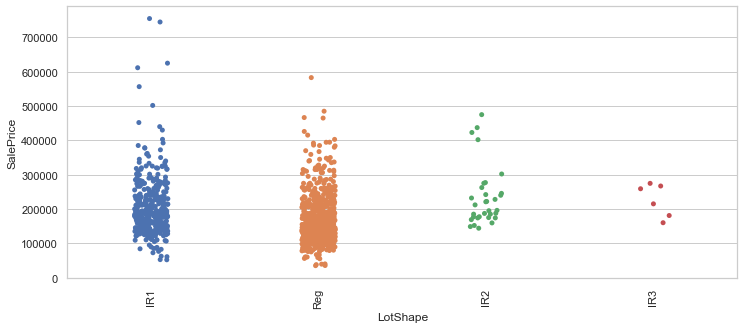

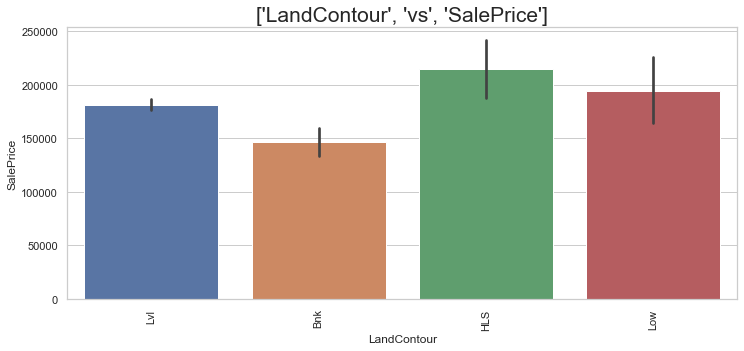

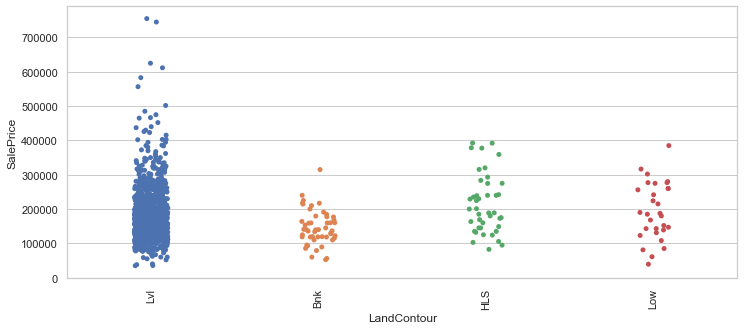

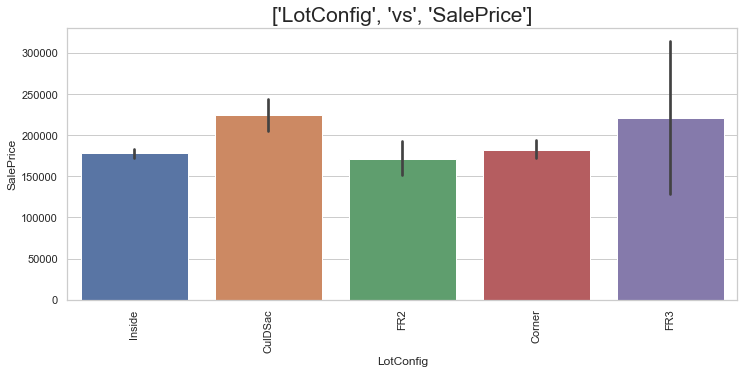

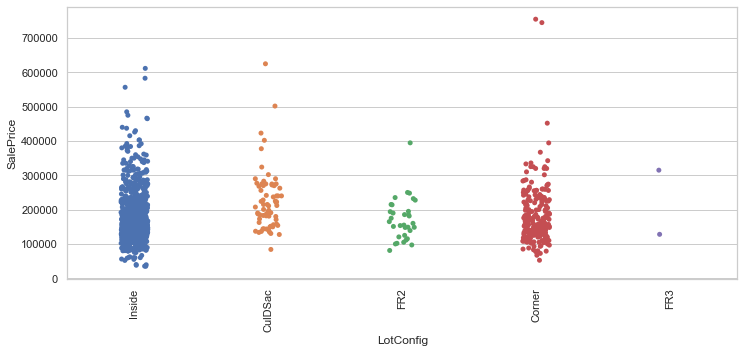

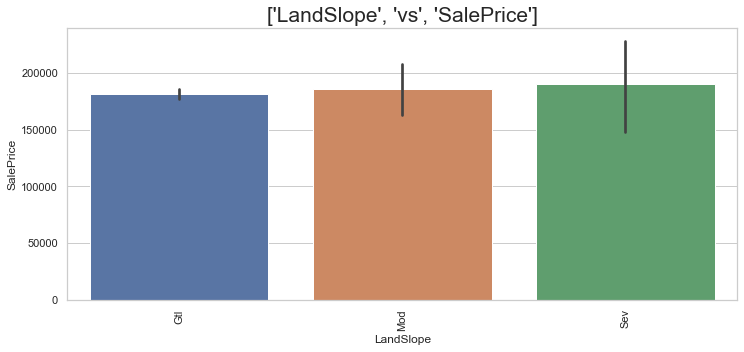

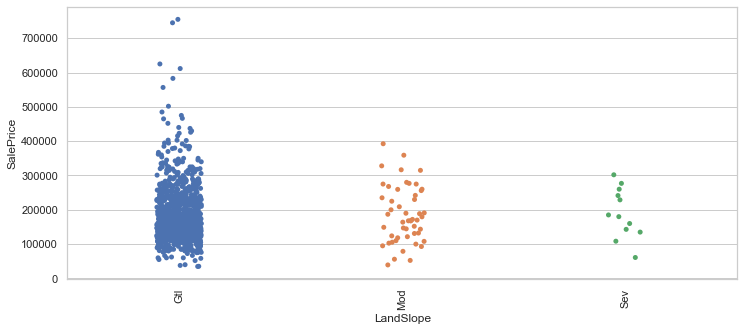

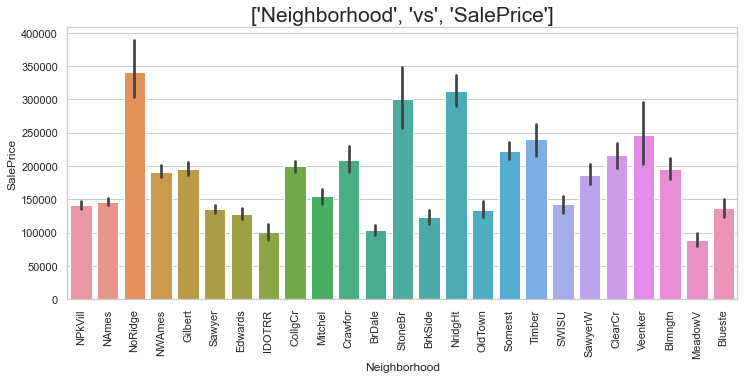

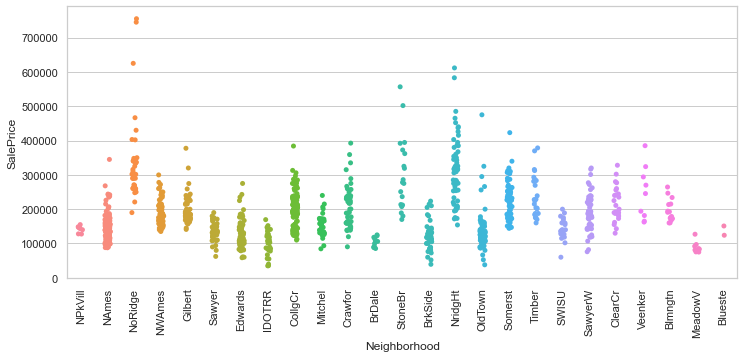

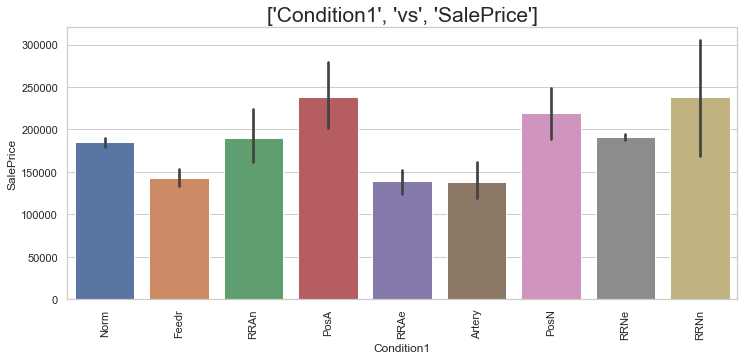

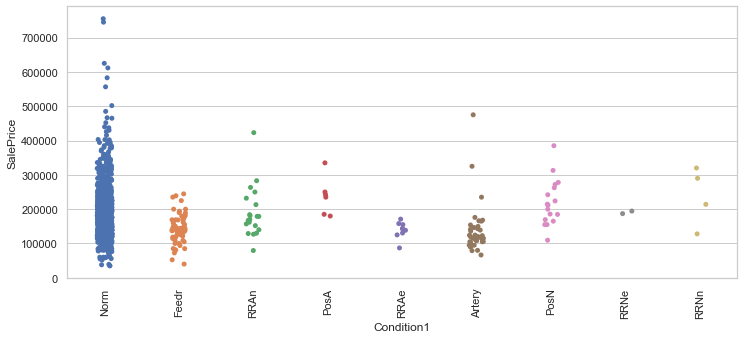

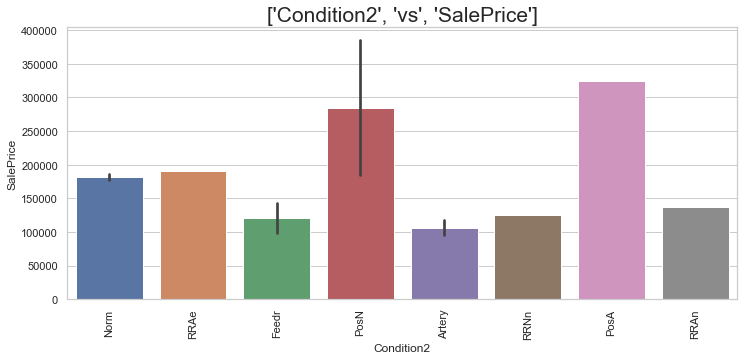

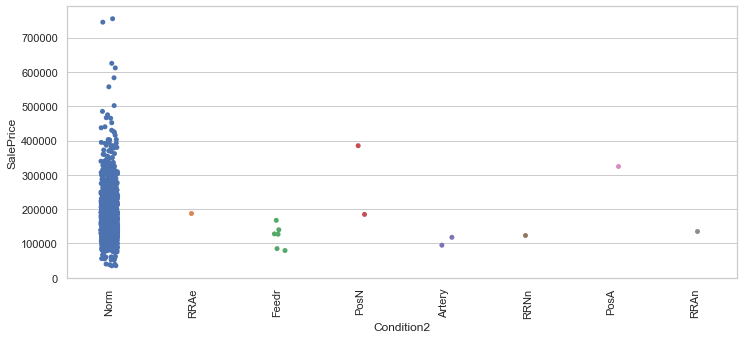

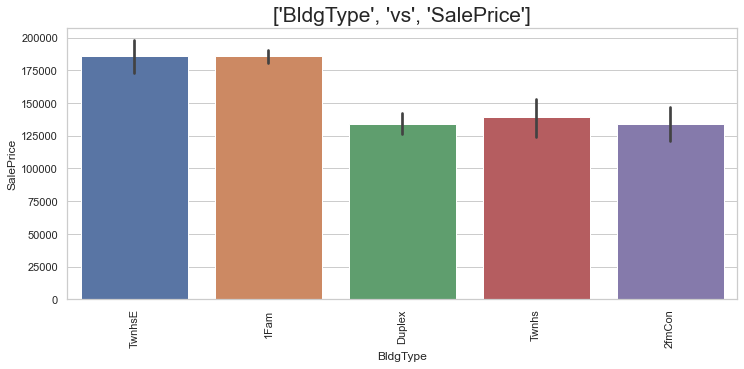

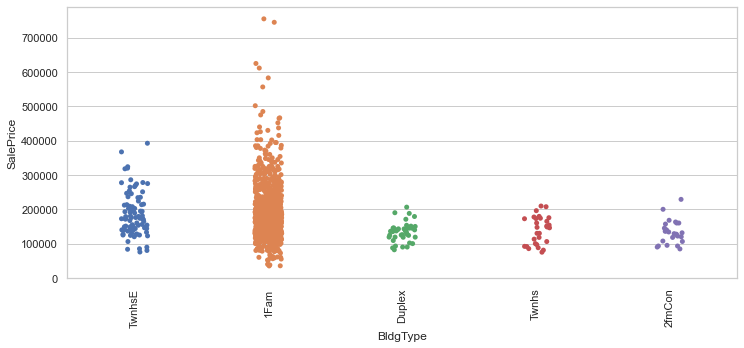

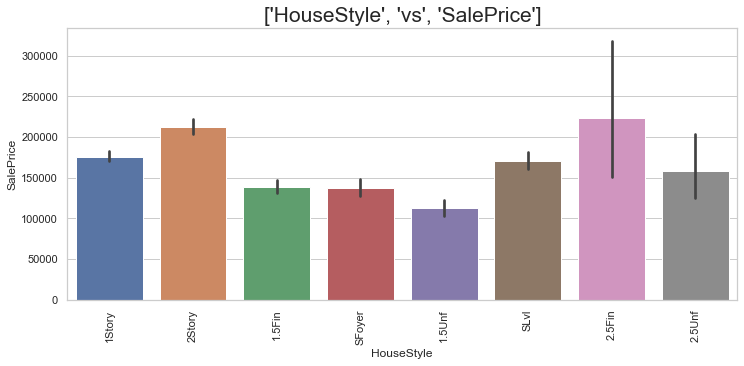

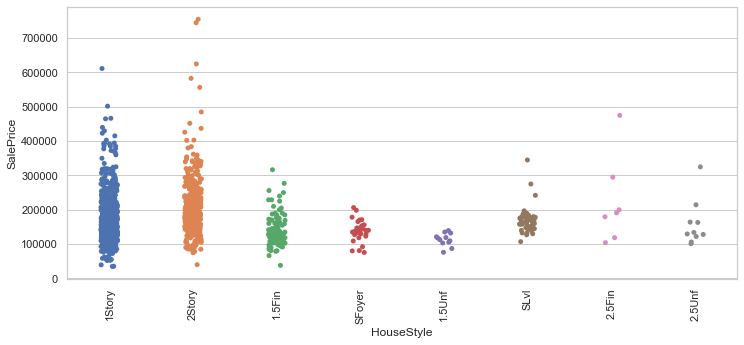

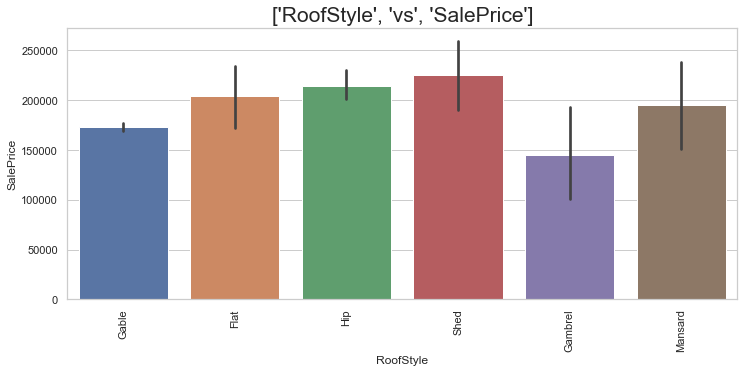

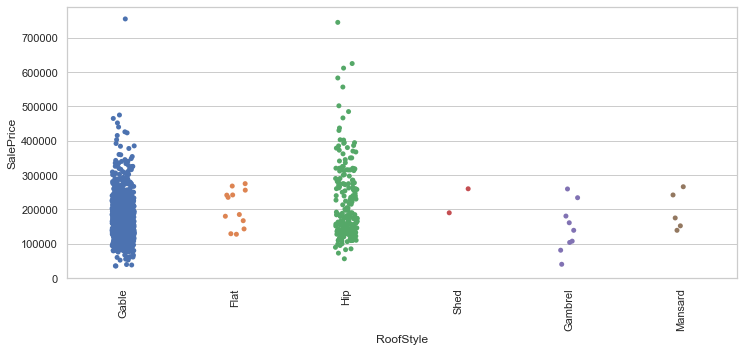

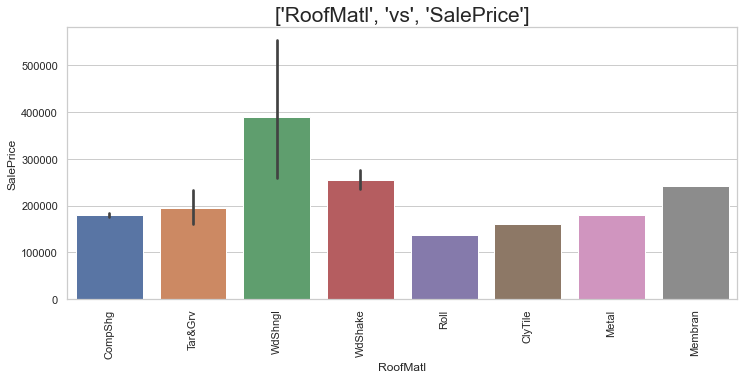

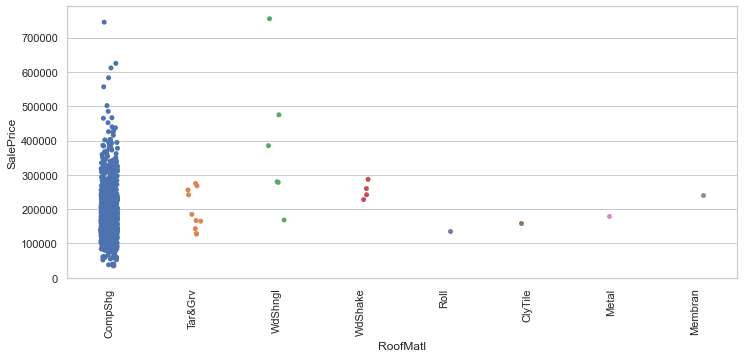

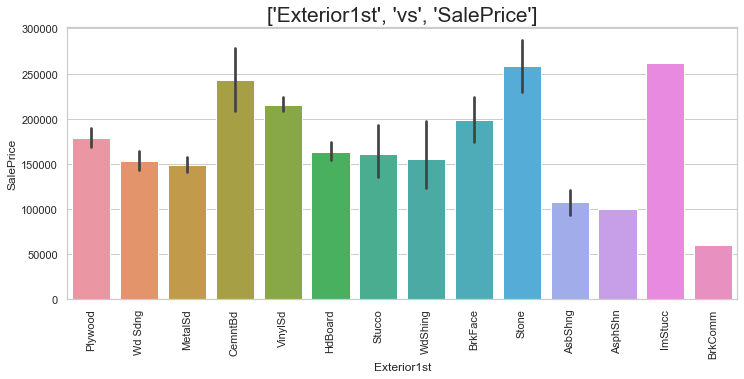

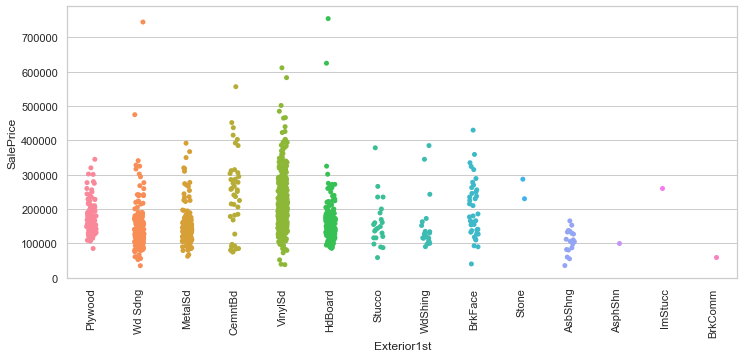

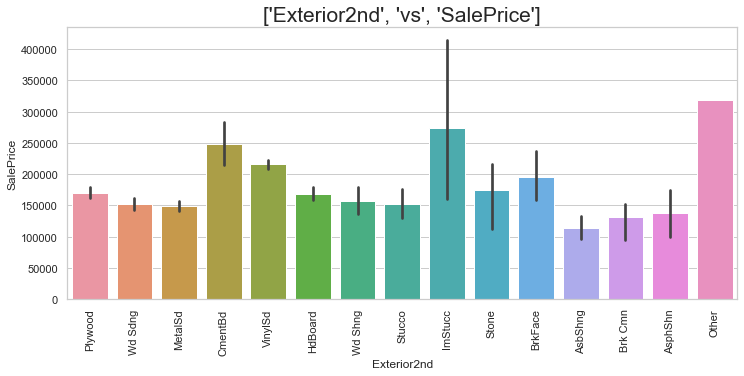

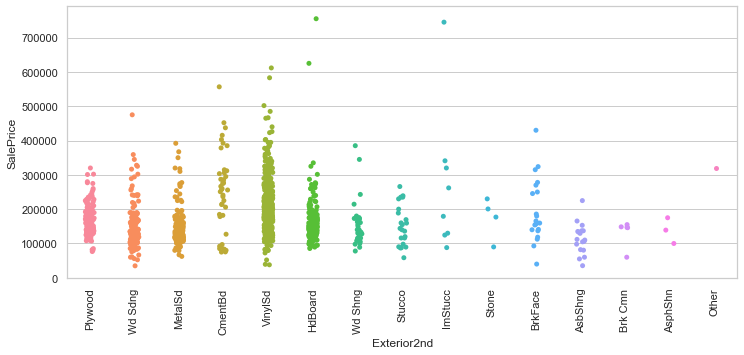

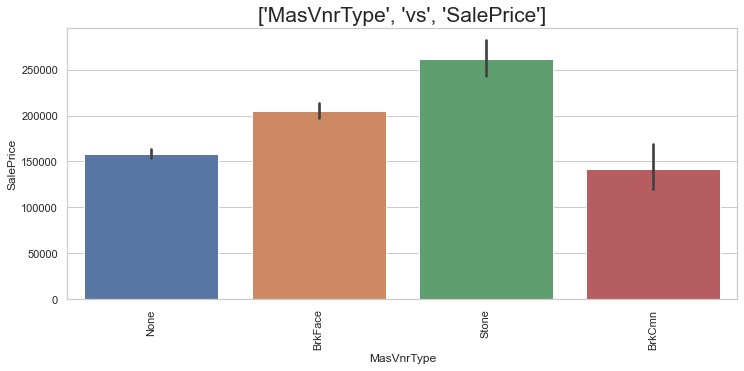

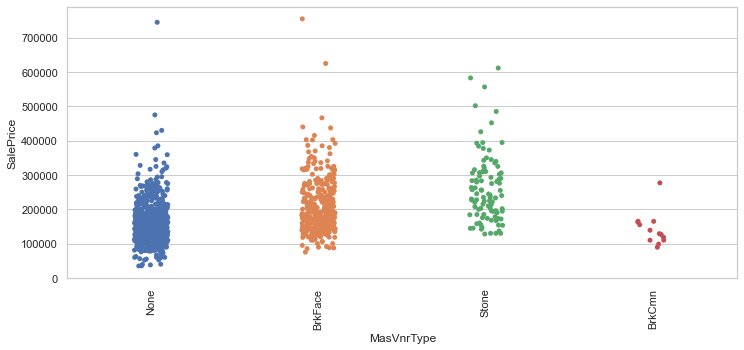

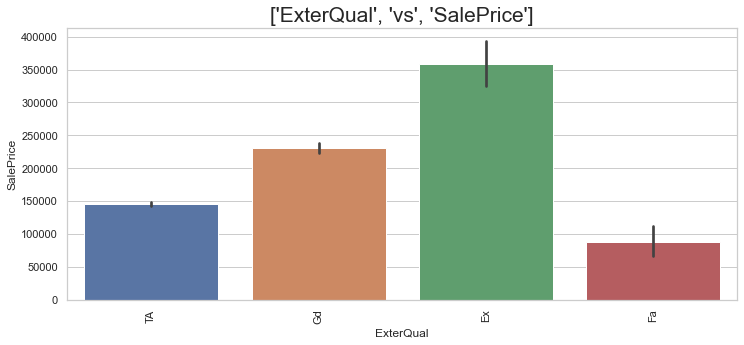

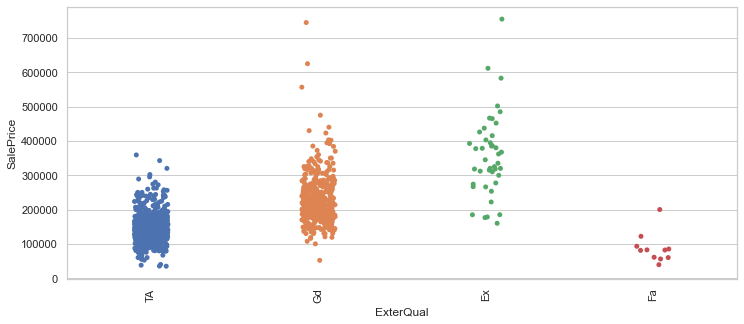

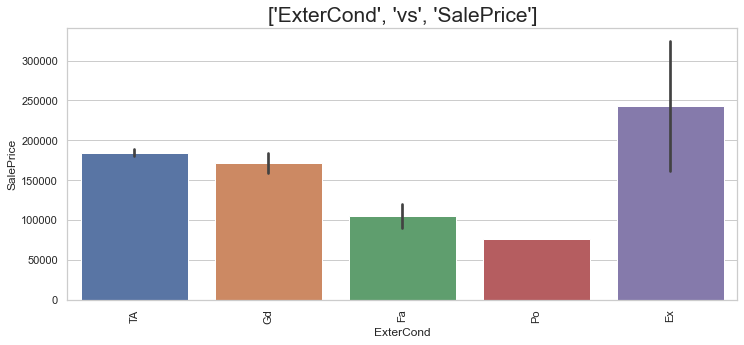

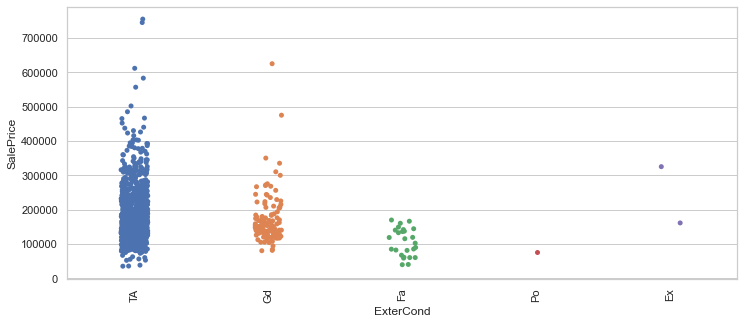

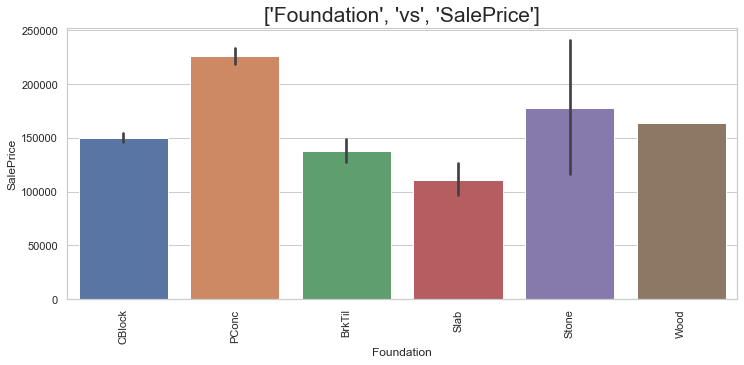

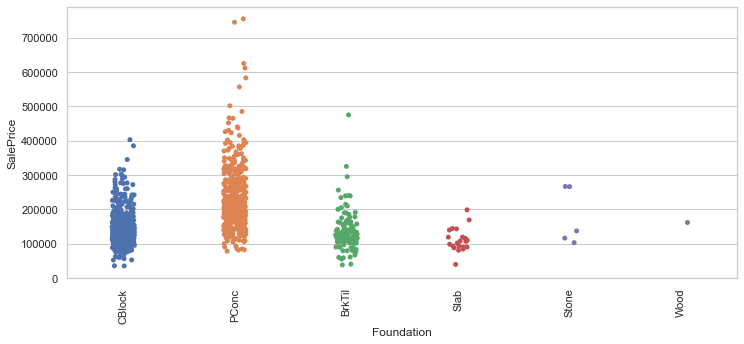

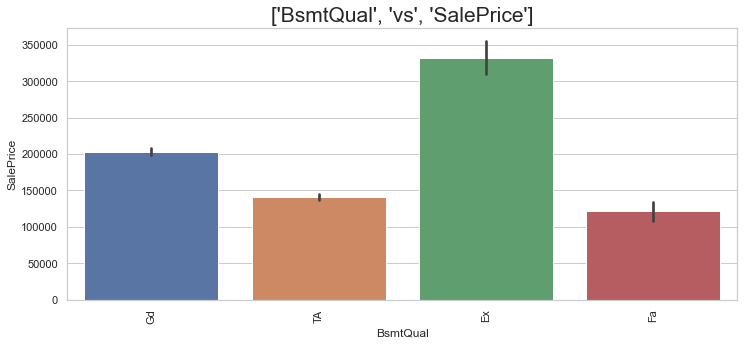

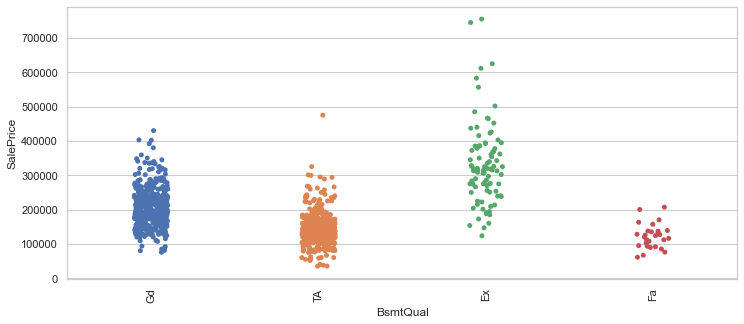

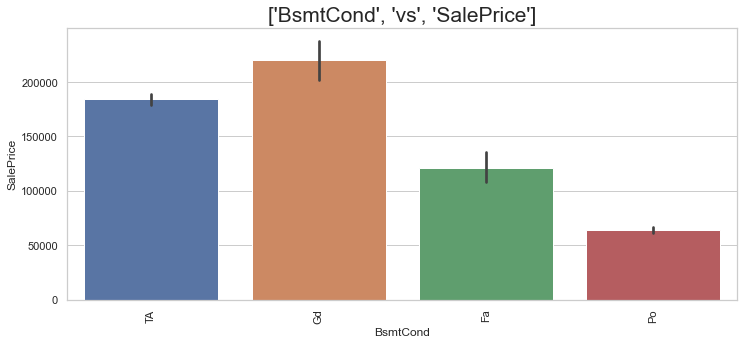

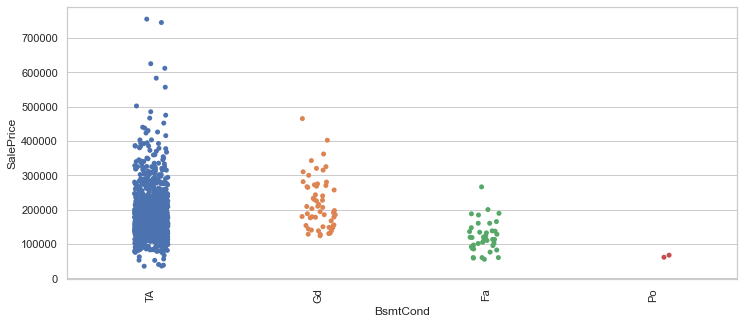

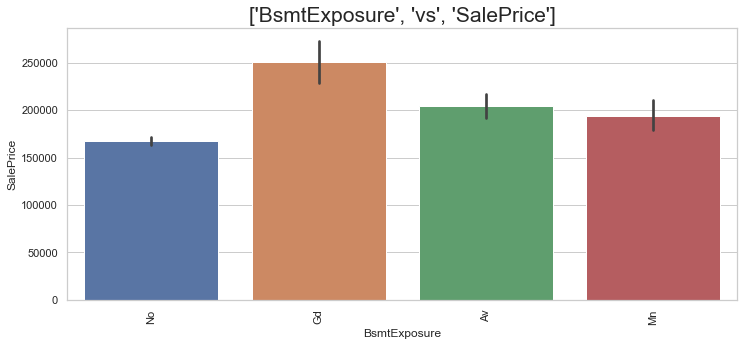

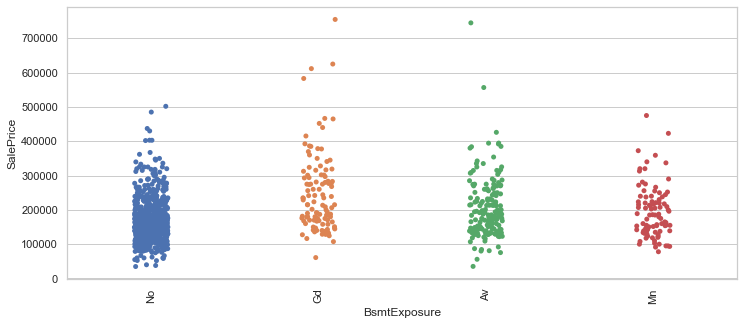

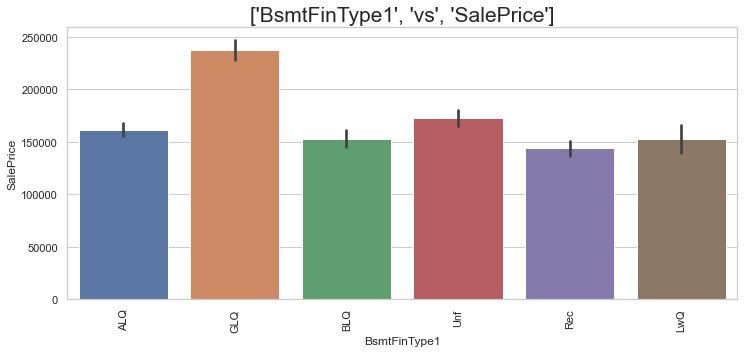

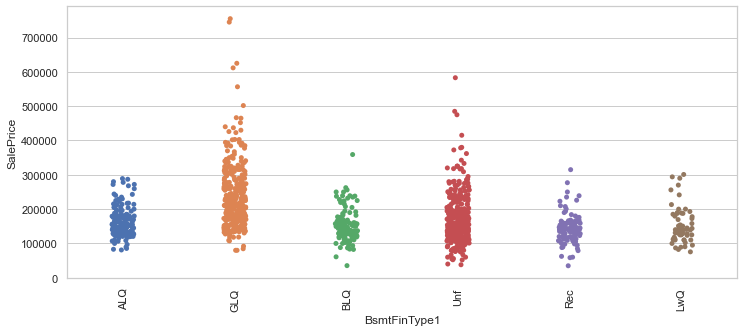

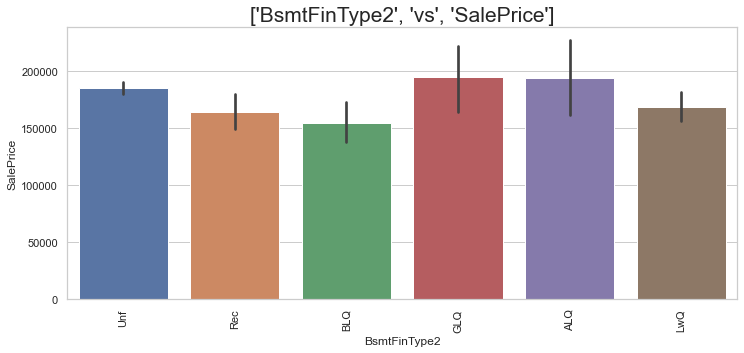

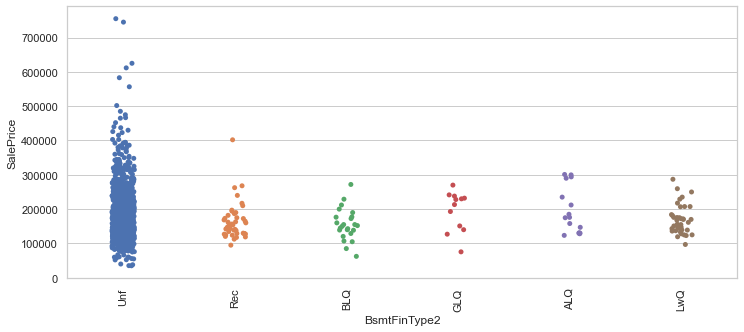

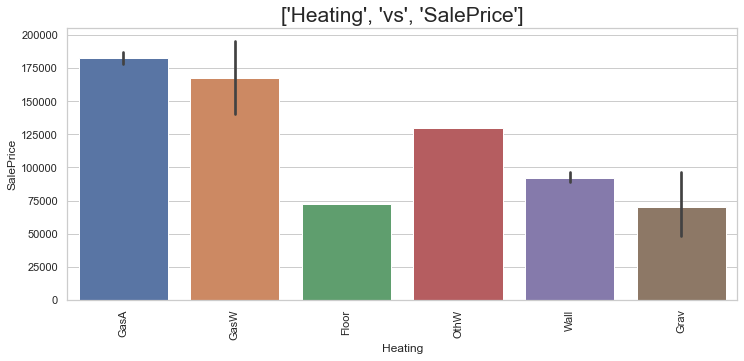

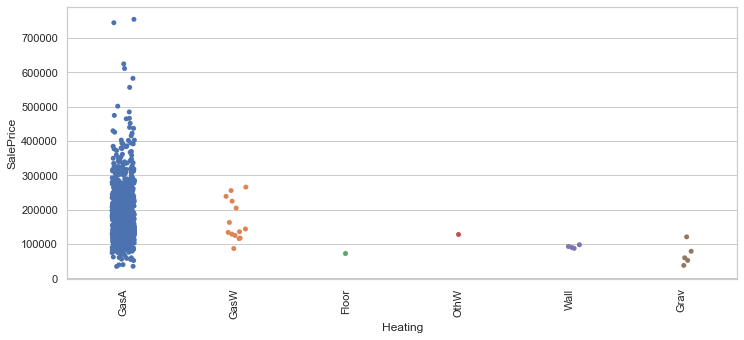

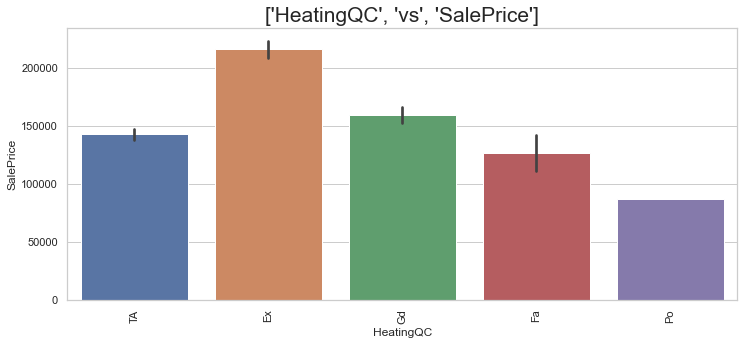

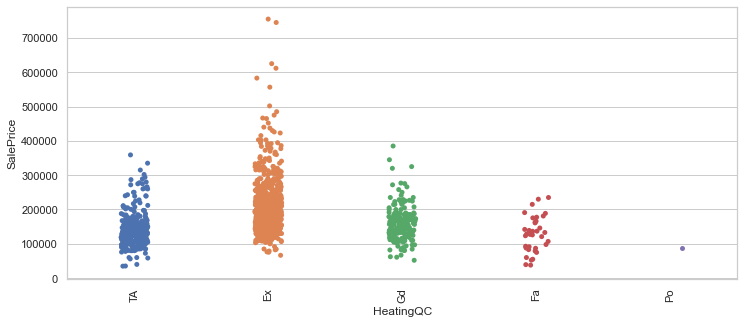

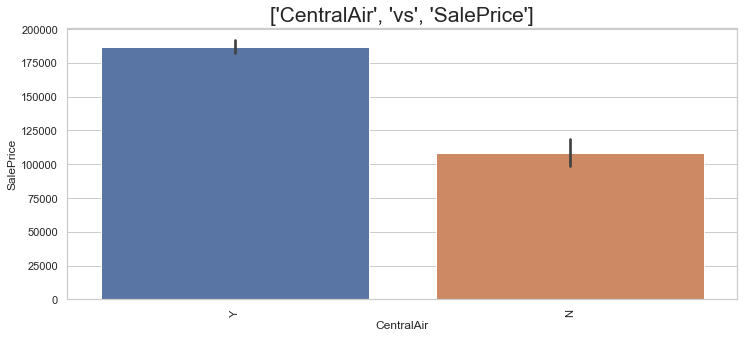

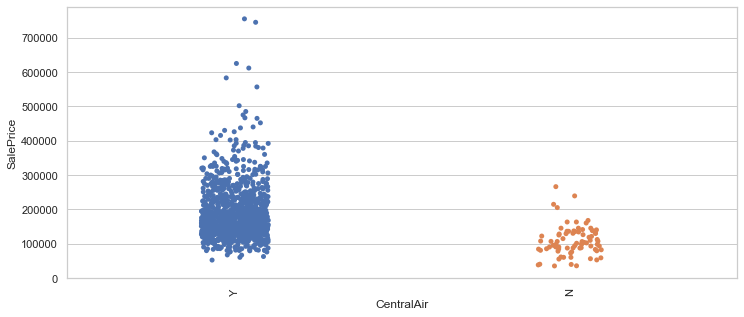

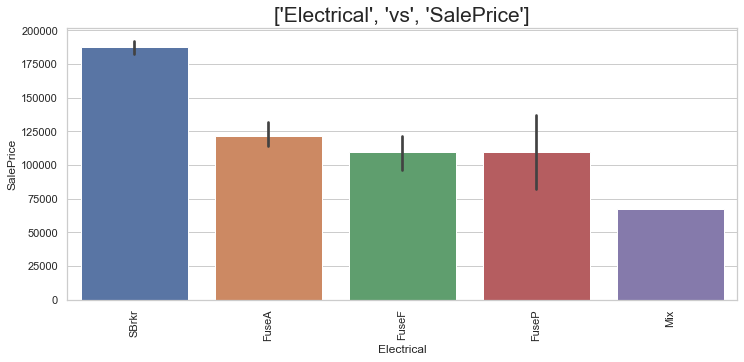

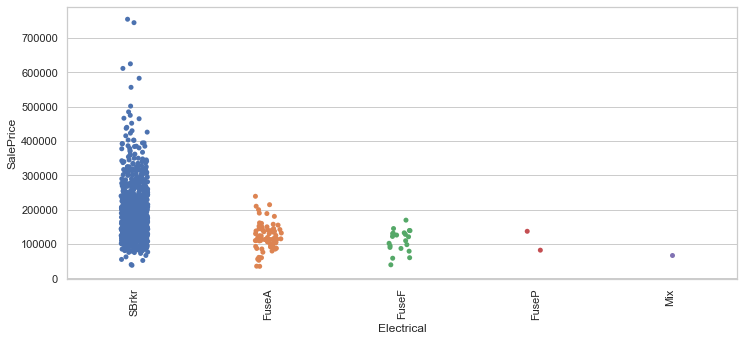

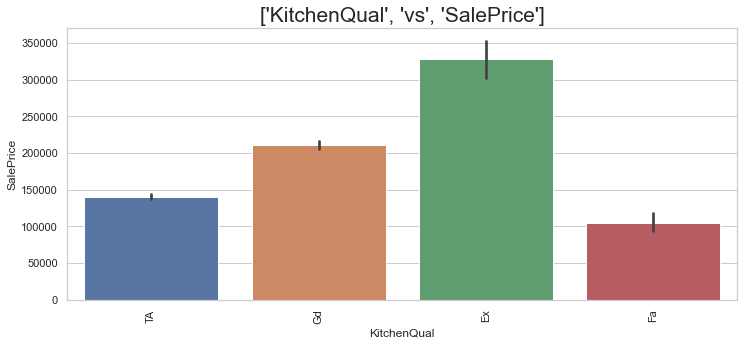

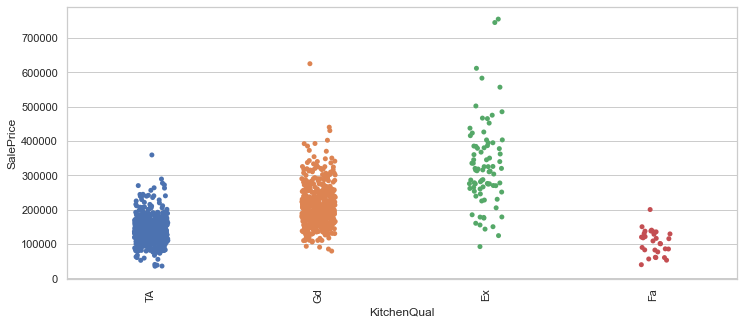

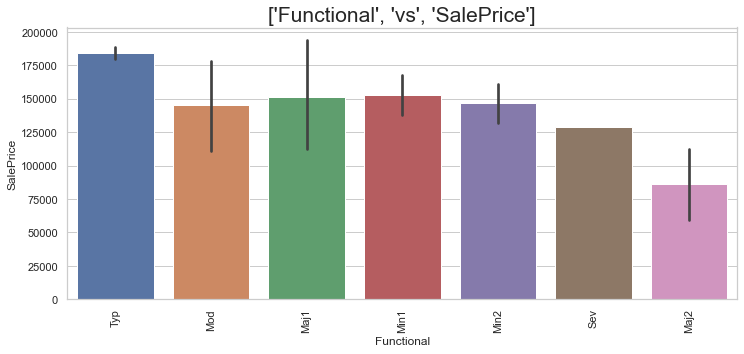

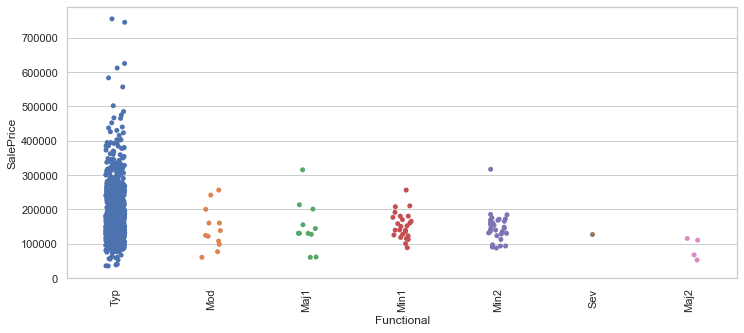

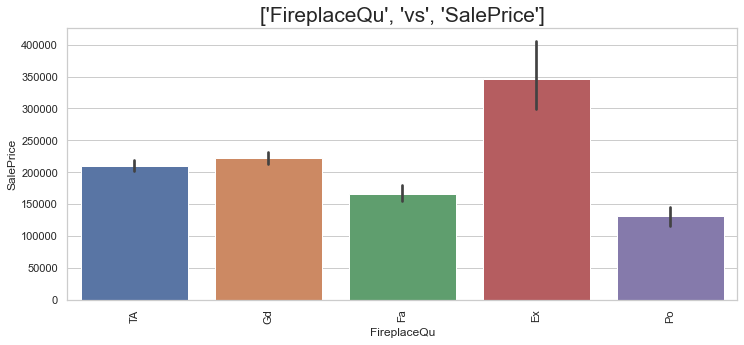

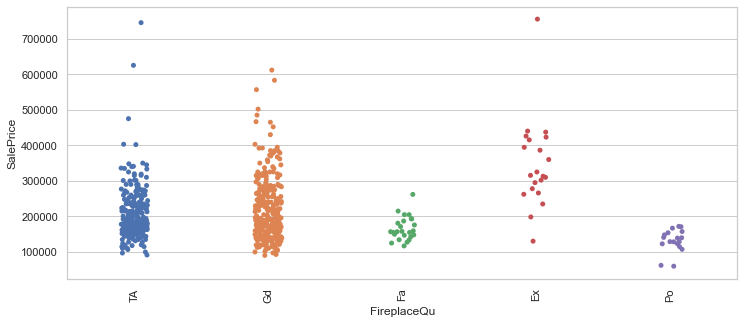

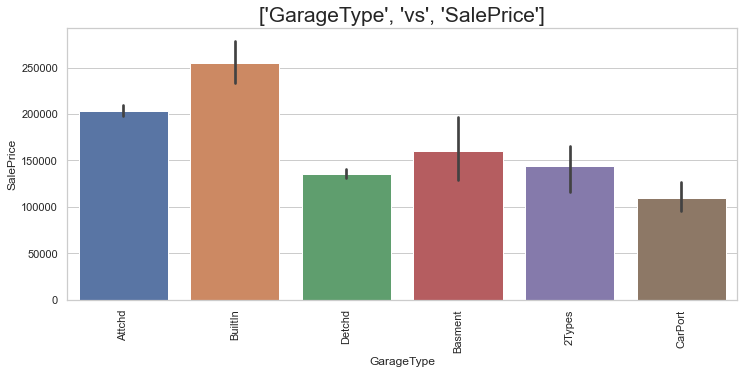

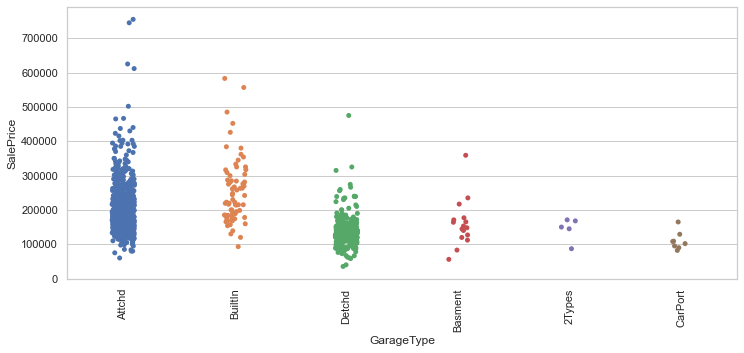

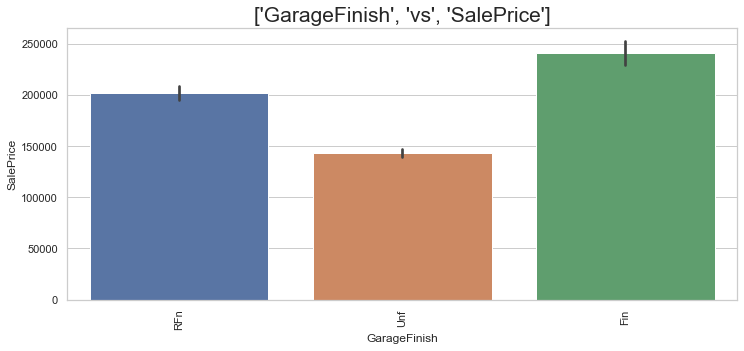

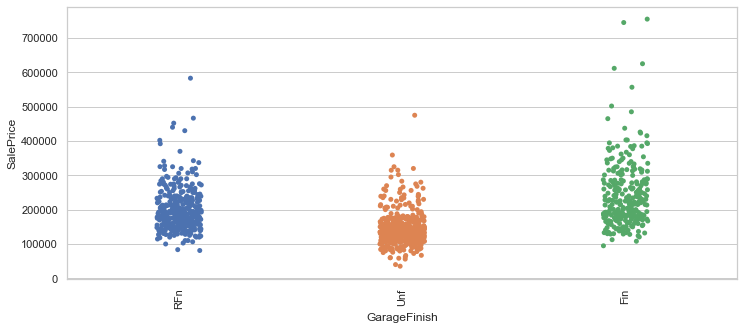

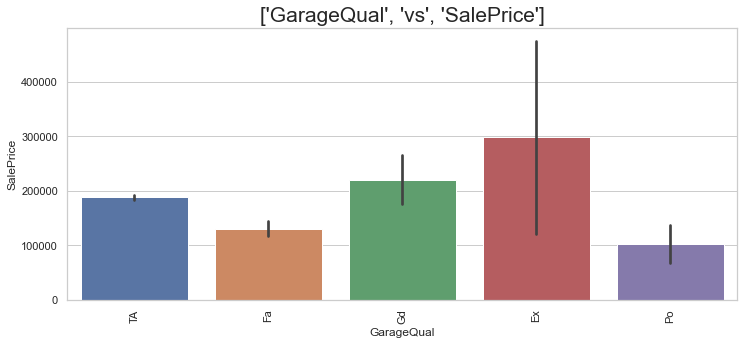

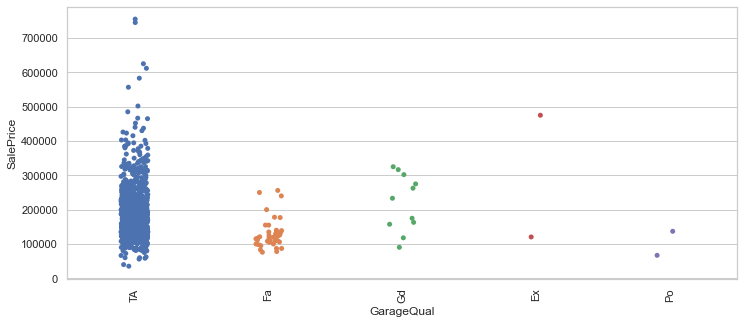

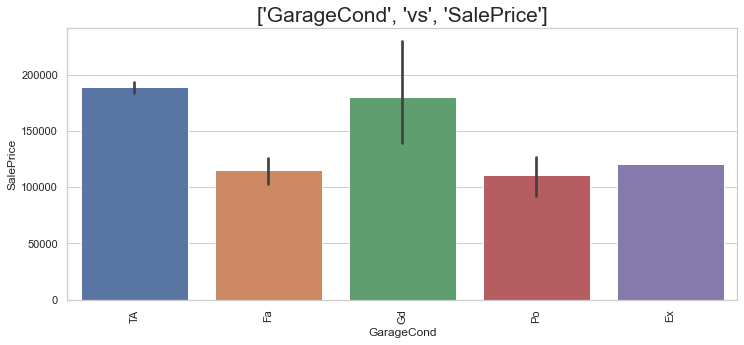

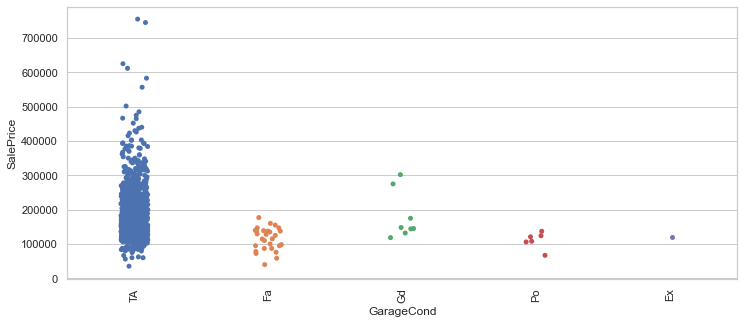

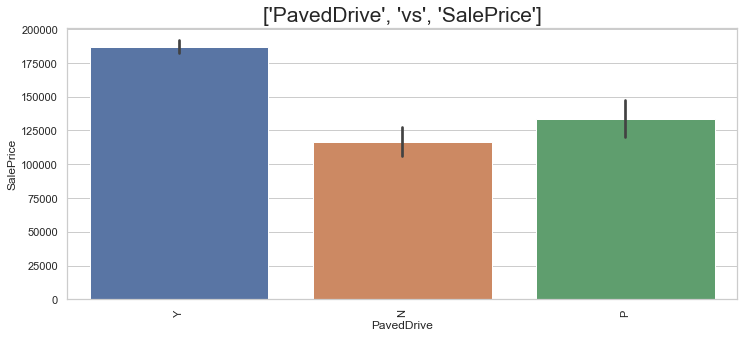

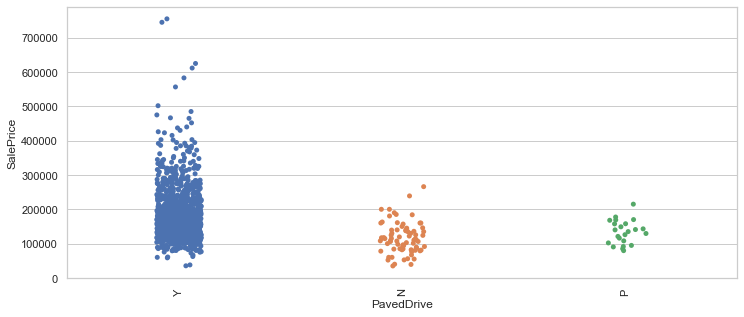

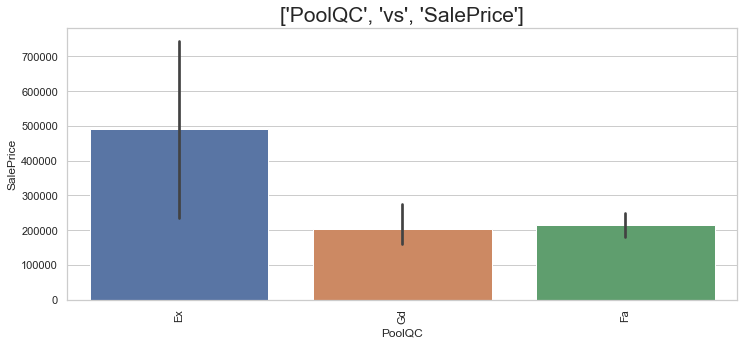

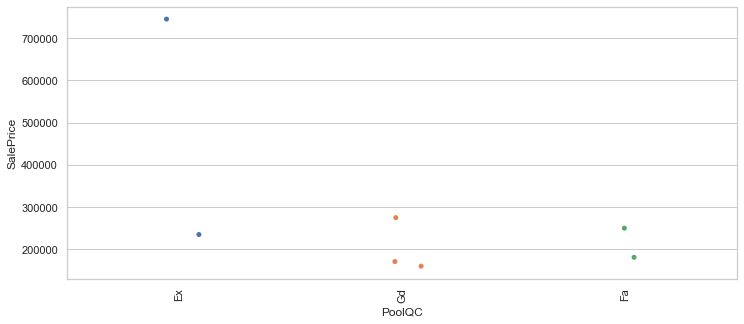

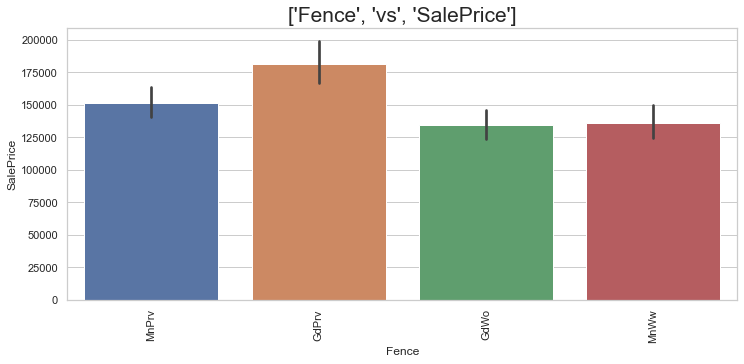

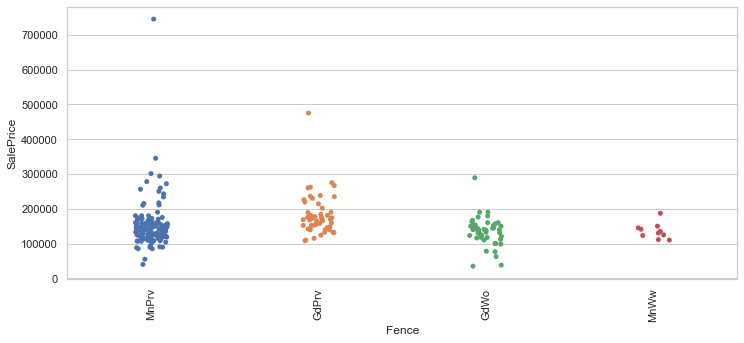

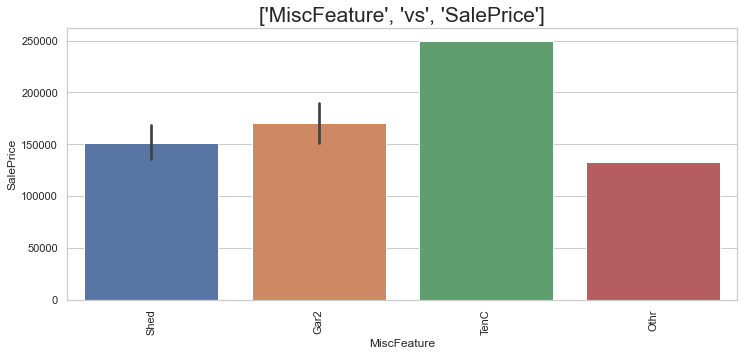

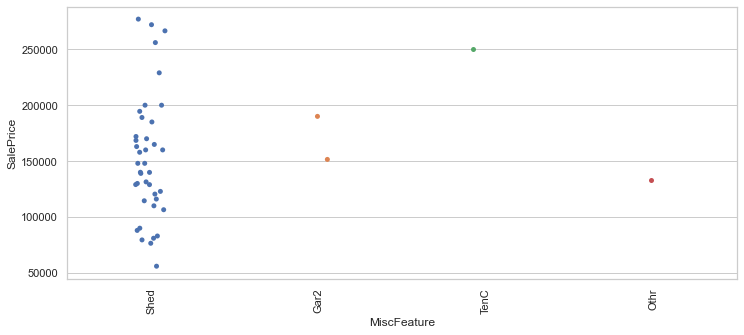

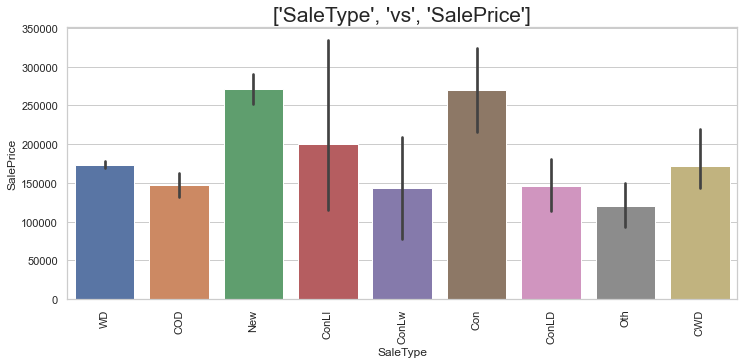

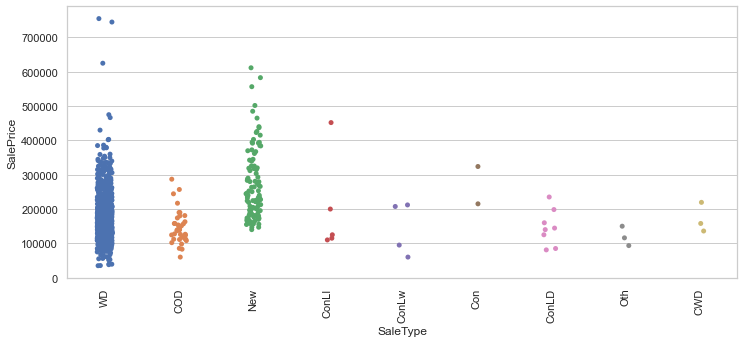

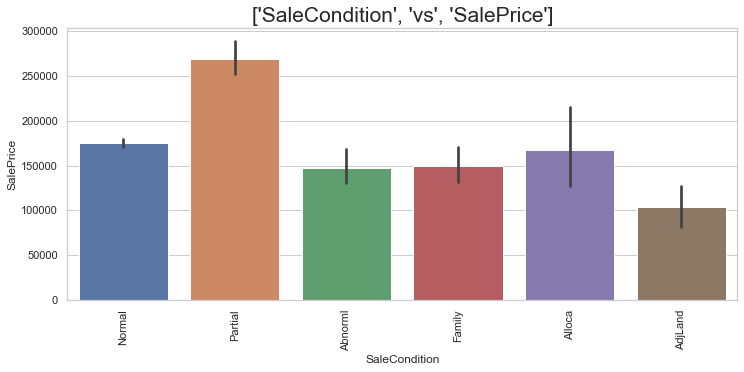

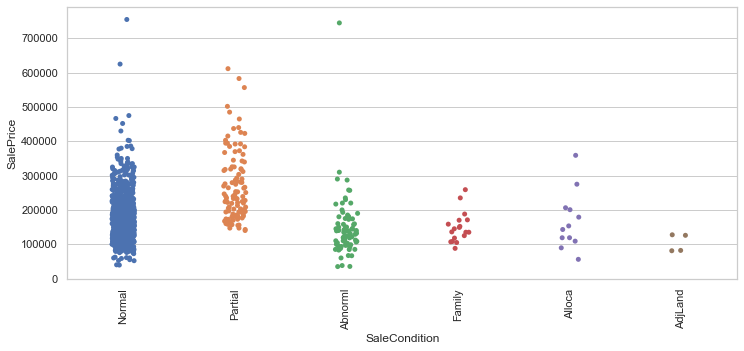

In [14]:
# creating barplot for all object types columns

sns.set(style="whitegrid")
for i in df.columns:
    if df[i].dtypes==object:
        
        plt.figure(figsize=(12,5))
        sns.barplot(x=i,y='SalePrice',data=df)
        plt.title([i,'vs','SalePrice'],fontsize=21)
        plt.xticks(rotation="vertical")
        plt.show()
        
        plt.figure(figsize=(12,5))
        sns.stripplot(x=i,y='SalePrice',data=df)
        plt.xticks(rotation="vertical")
        plt.show()        
        print('\n')       

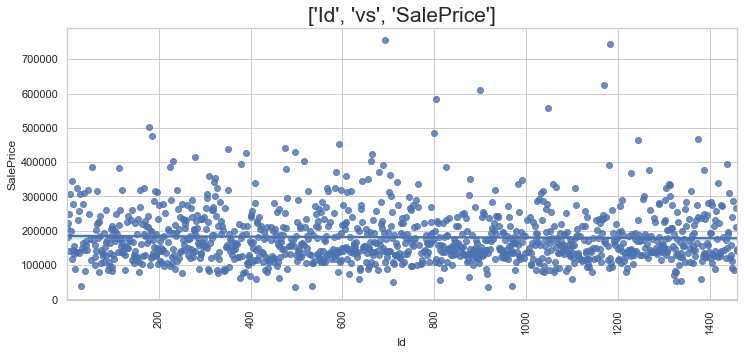

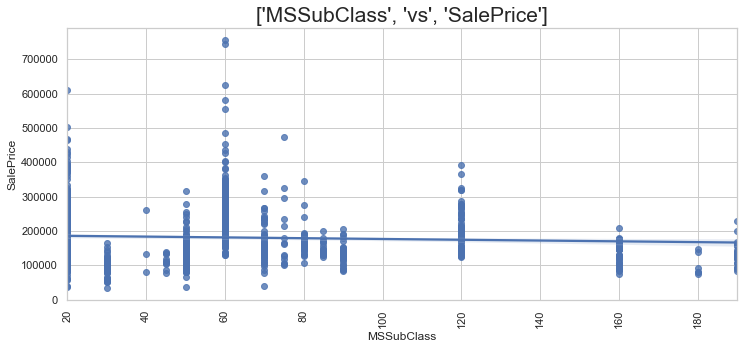

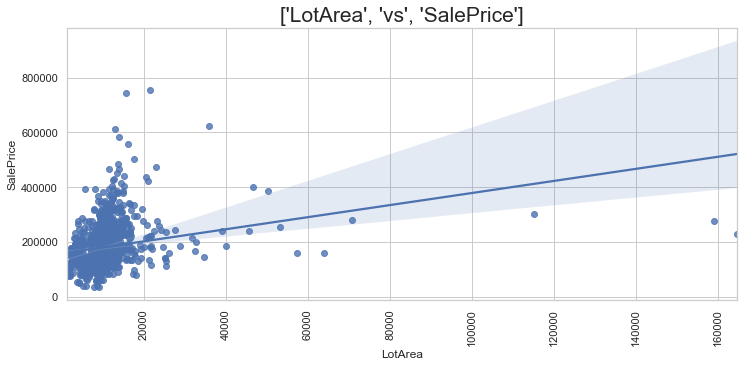

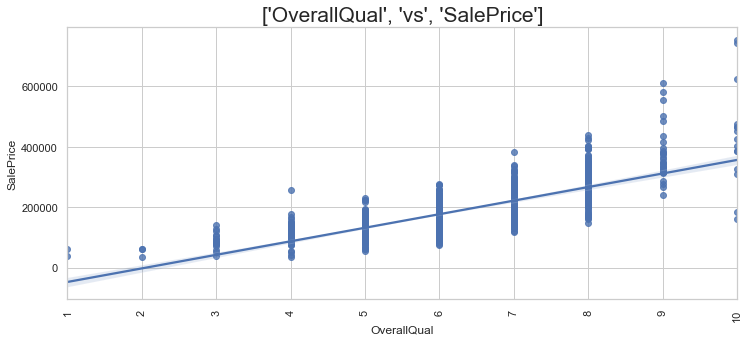

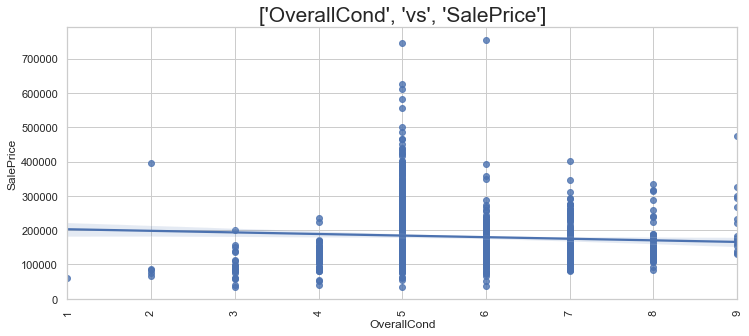

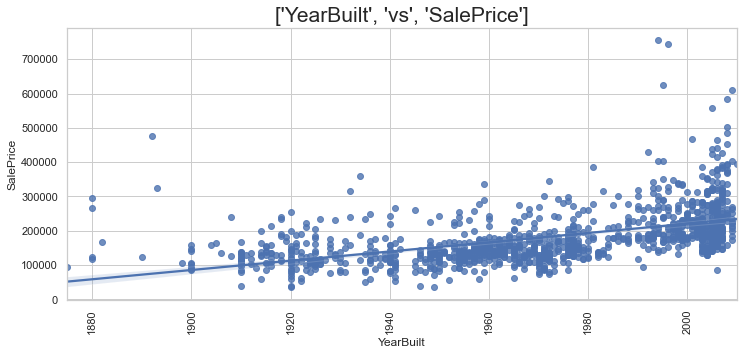

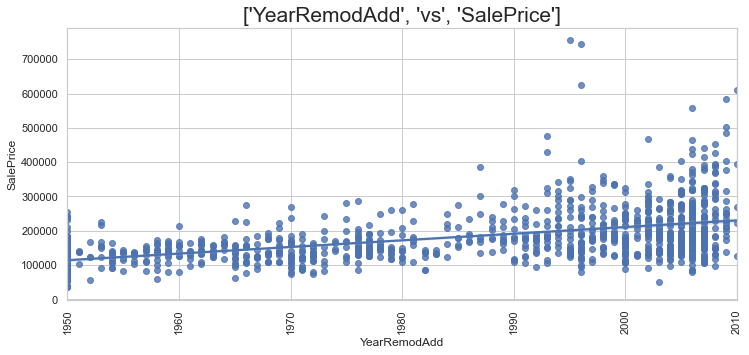

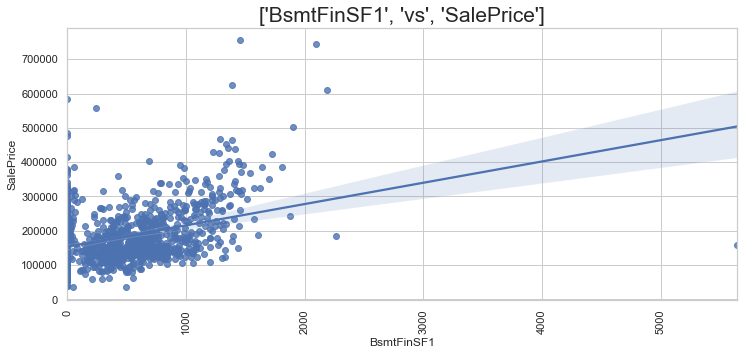

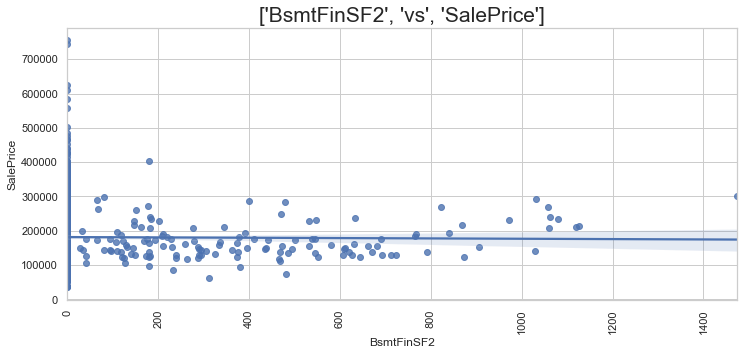

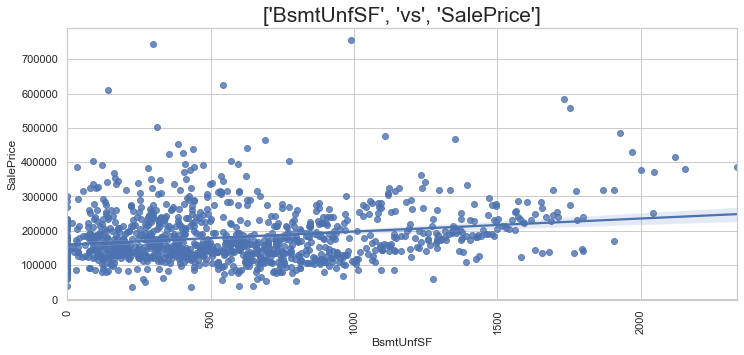

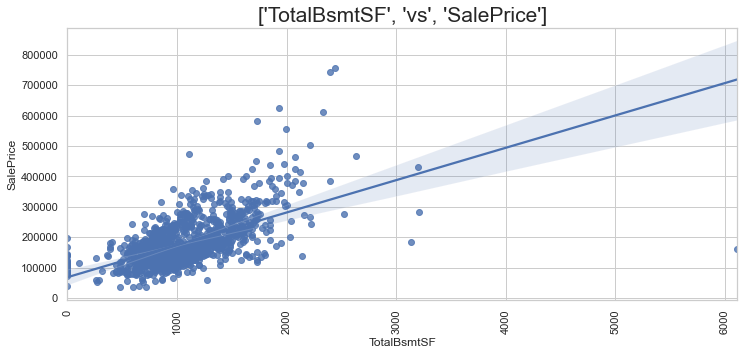

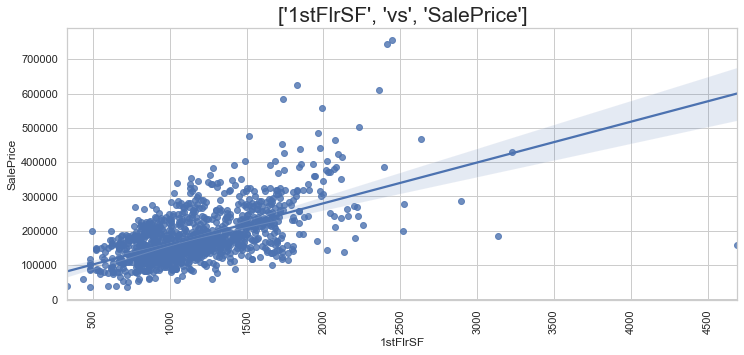

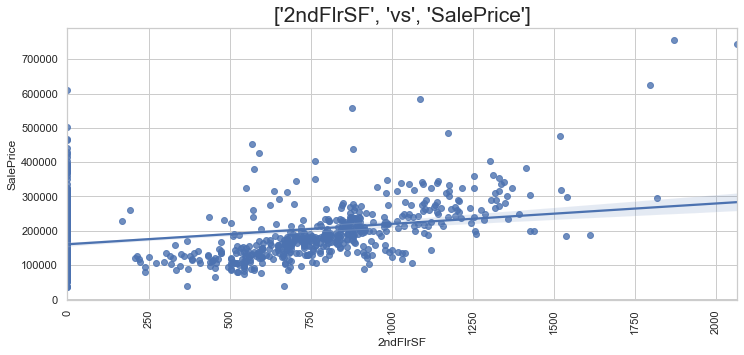

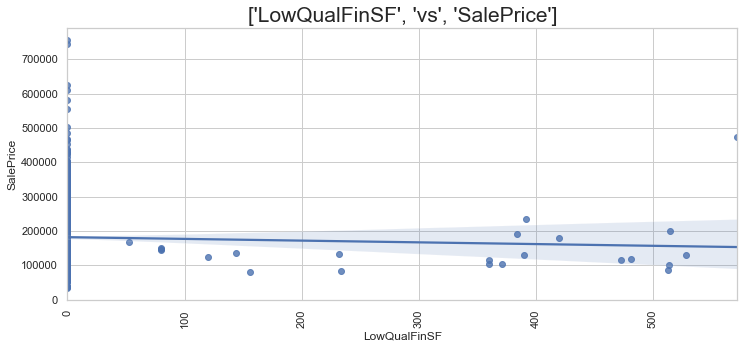

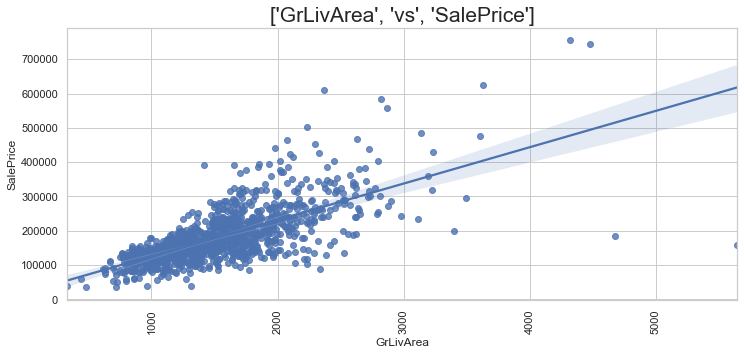

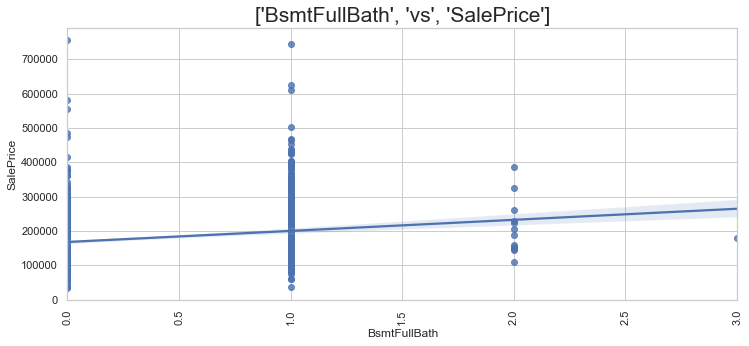

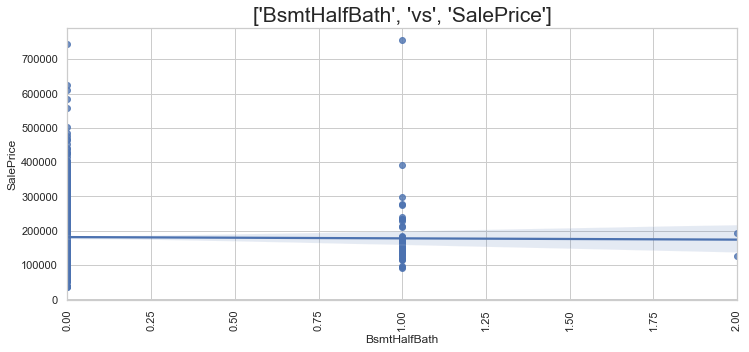

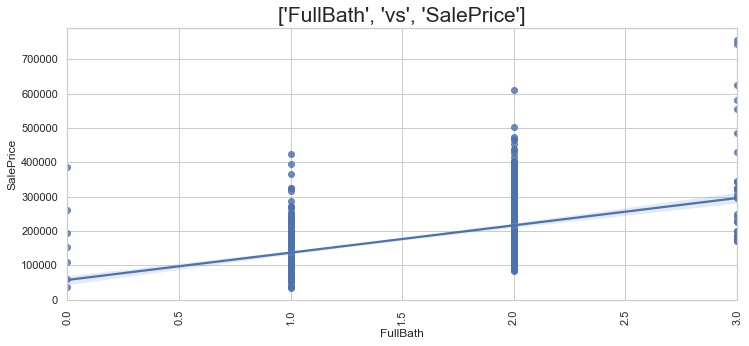

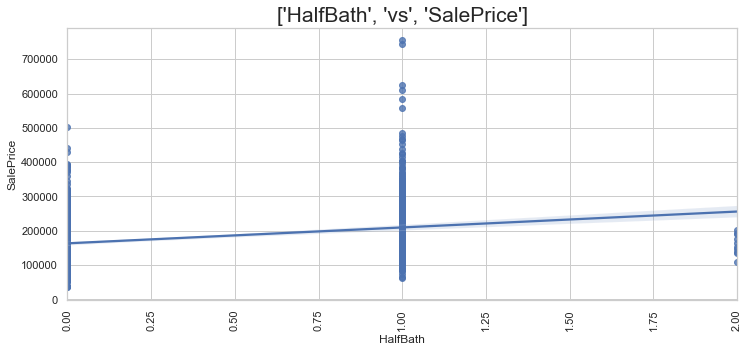

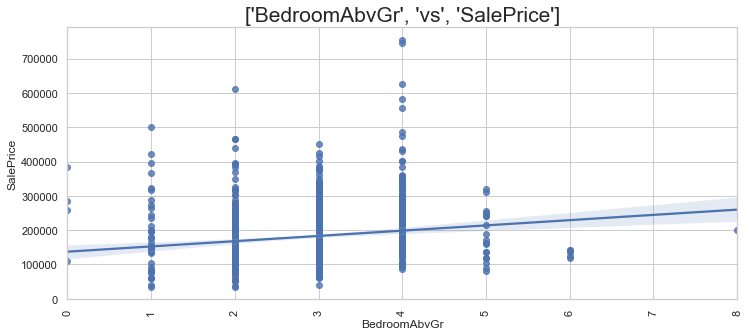

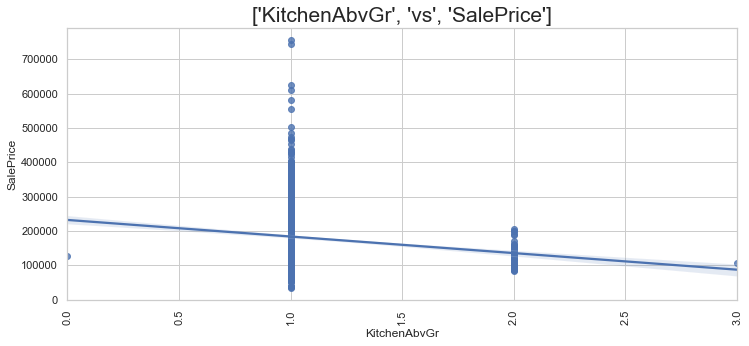

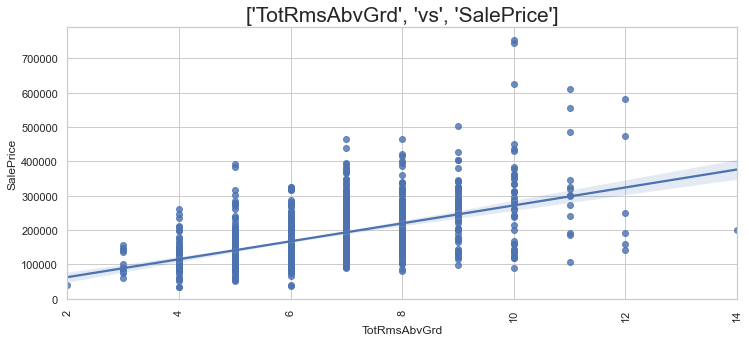

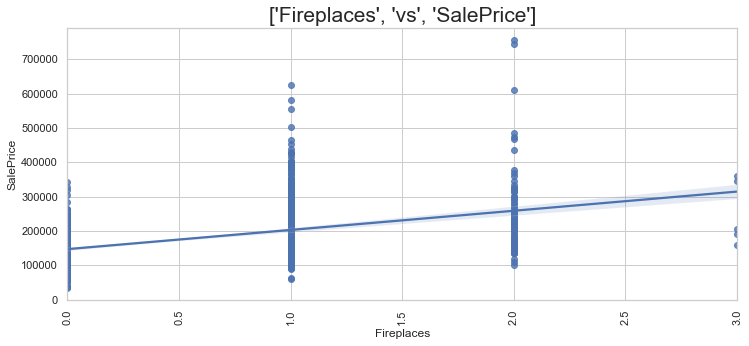

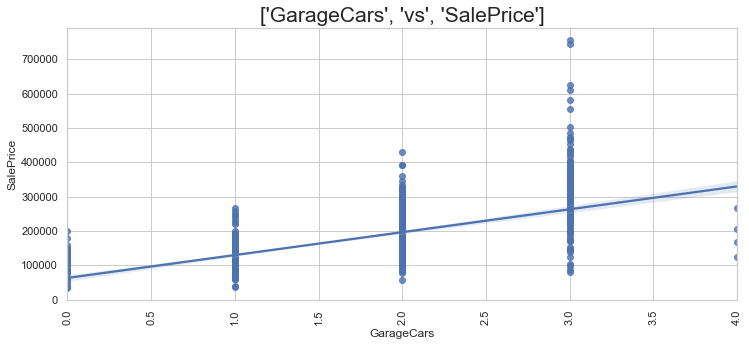

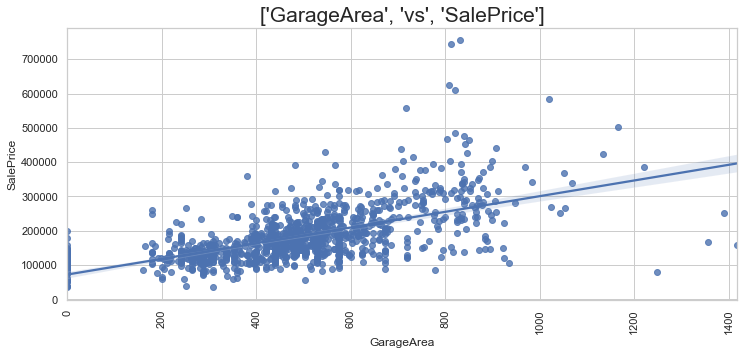

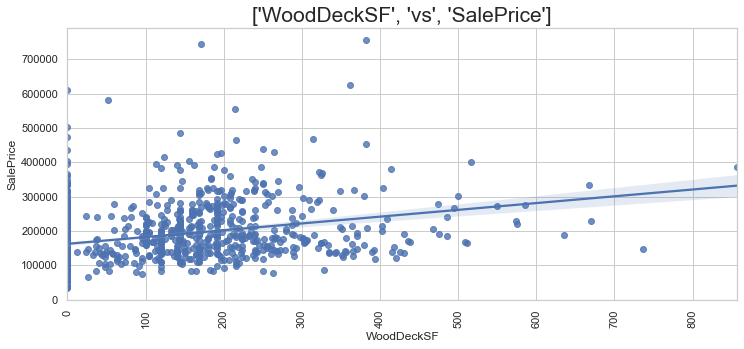

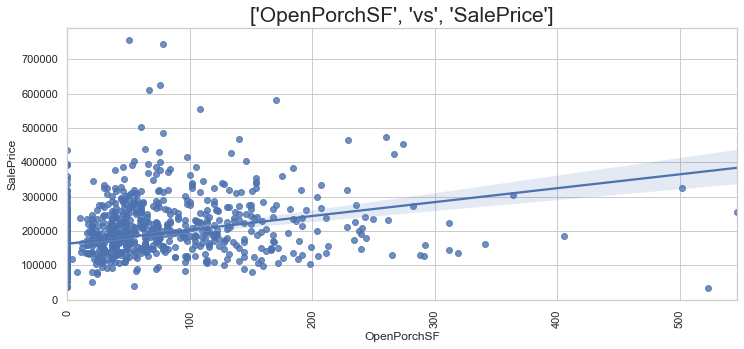

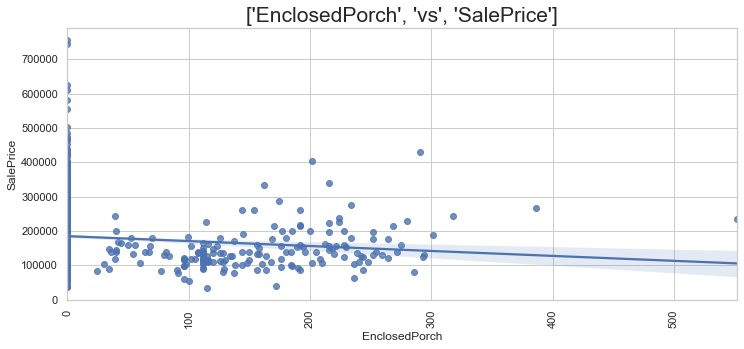

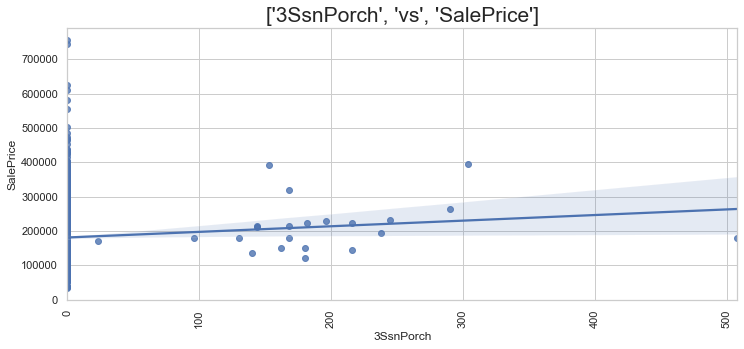

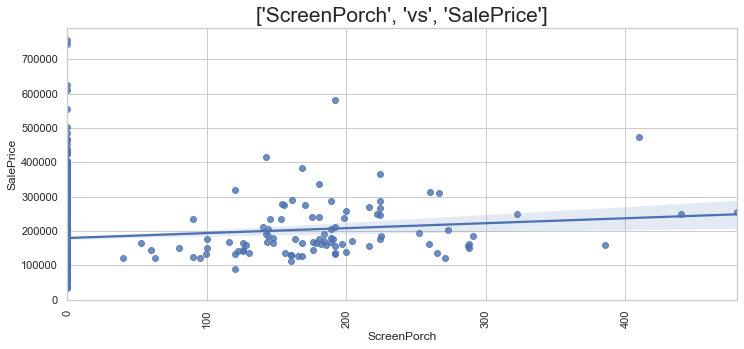

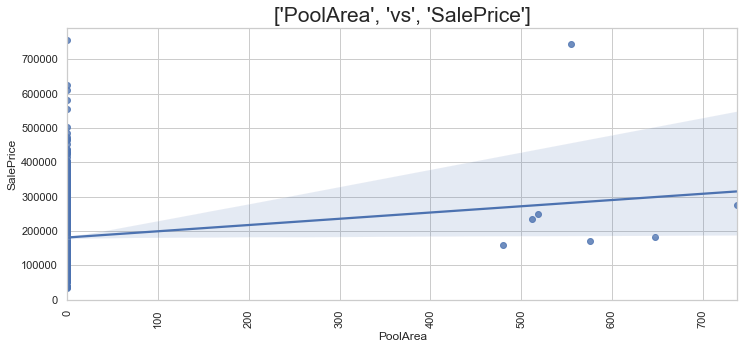

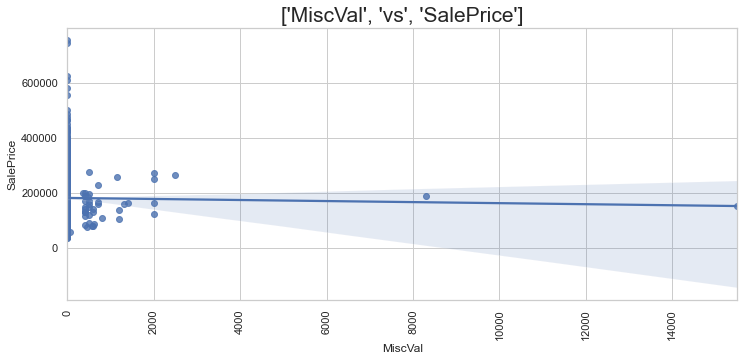

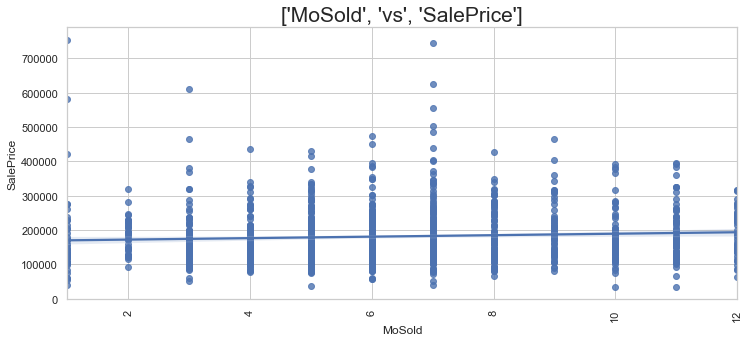

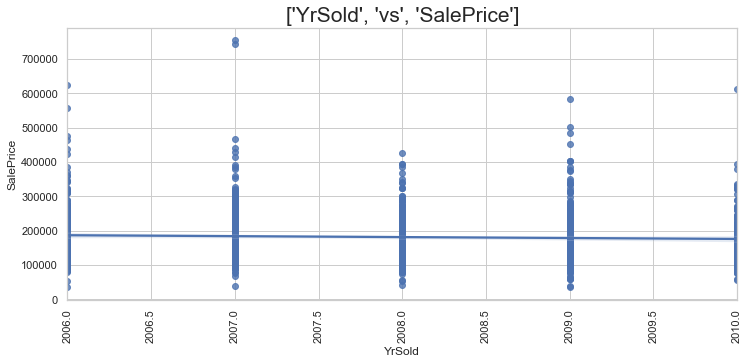

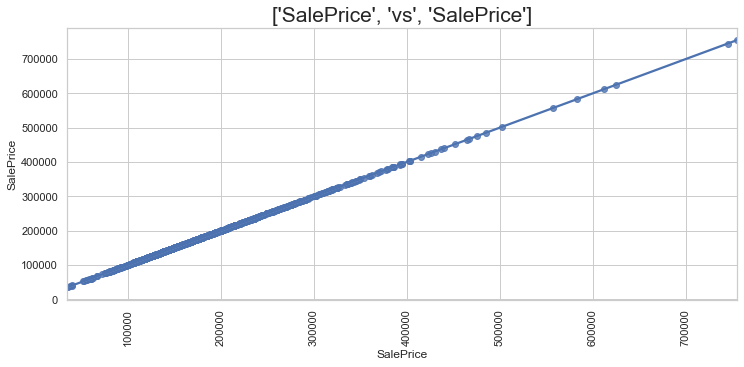

In [15]:
# creating regplot for all int types columns

sns.set(style="whitegrid")
for i in df.columns:
    if df[i].dtypes=='int64':
        
        plt.figure(figsize=(12,5))
        sns.regplot(x=i,y='SalePrice',data=df)
        plt.title([i,'vs','SalePrice'],fontsize=21)
        plt.xticks(rotation="vertical")
        plt.show()

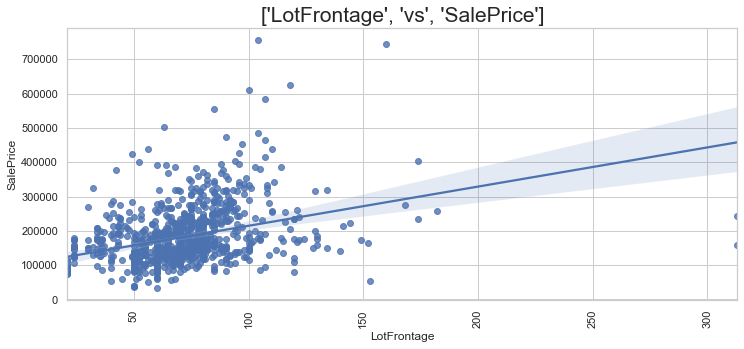

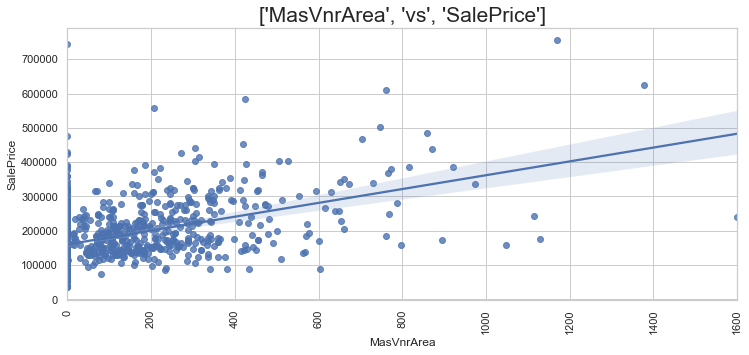

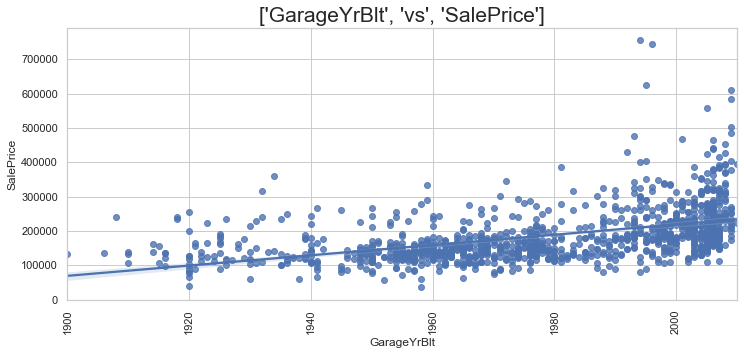

In [16]:
# creating regplot for all float types columns

sns.set(style="whitegrid")
for i in df.columns:
    if df[i].dtypes=='float64':
        
        plt.figure(figsize=(12,5))
        sns.regplot(x=i,y='SalePrice',data=df)
        plt.title([i,'vs','SalePrice'],fontsize=21)
        plt.xticks(rotation="vertical")
        plt.show()

## Multivariate Analysis

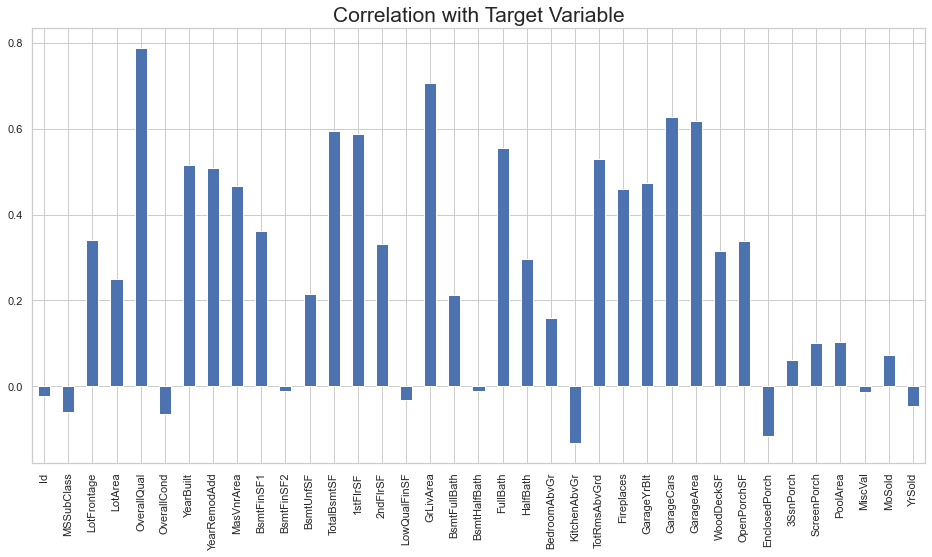

In [17]:
# checking corelations with target SalePrice
plt.figure(figsize=(16,8))
df.drop('SalePrice',axis=1).corrwith(df['SalePrice']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title('Correlation with Target Variable',fontsize=21)
plt.show()


# Dealing with Missing Values

In [18]:
# cheching missing values

df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [19]:
# select columns which have null values

m_col=['LotFrontage','Alley','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
       'FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

In [20]:
# filling null values

for i in m_col:
    if df[i].dtypes=='int64':
        df[i]=df[i].replace(np.nan,df[i].mean())
    if df[i].dtypes==float:
        df[i]=df[i].replace(np.nan,df[i].mean())
    if df[i].dtypes==object:
        mode=df[i].mode()[0]
        df[i]=df[i].fillna(mode)
df.isnull().sum()        

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

## Changing categrories variables into Numeric Variable

In [21]:
# converting dataset in numetic form

for i in df.columns:
    if df[i].dtypes==object:
        df[i]=pd.factorize(df[i])[0]
print(df.head())        

    Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0  127         120         0     70.98847     4928       0      0         0   
1  889          20         0     95.00000    15865       0      0         0   
2  793          60         0     92.00000     9920       0      0         0   
3  110          20         0    105.00000    11751       0      0         0   
4  422          20         0     70.98847    16635       0      0         0   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0            0          0          0             0           0           0   
1            0          0          1             1           0           0   
2            0          1          0             2           0           0   
3            0          0          0             3           0           0   
4            0          2          0             3           0           0   

   BldgType  HouseStyle  OverallQual  OverallCond  YearB

# checking Skewness

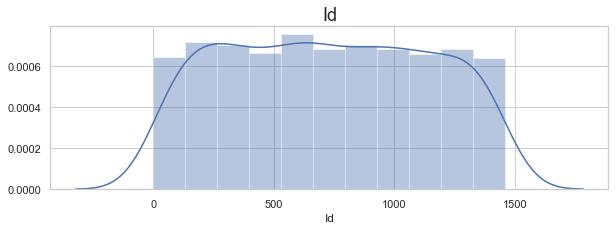

SkewNess: 0.026526032012241022




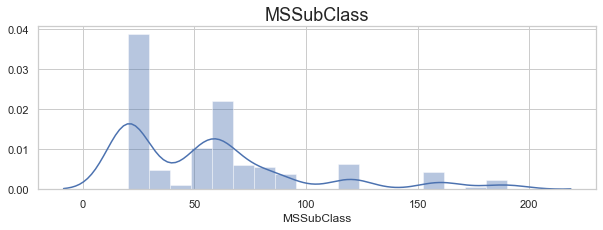

SkewNess: 1.422018988135284




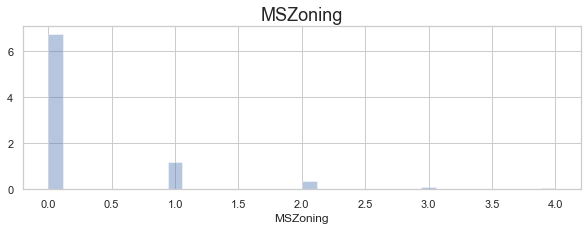

SkewNess: 2.7756171581453954




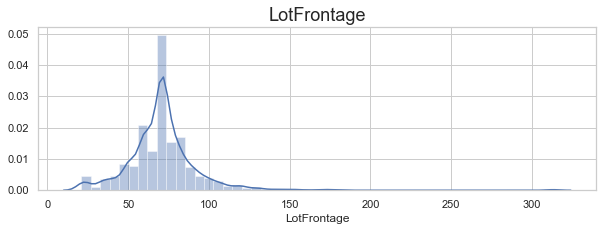

SkewNess: 2.7103829016240844




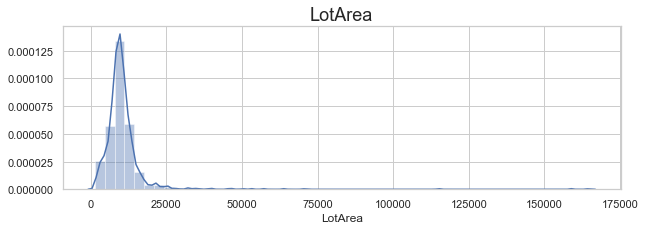

SkewNess: 10.659284548299626




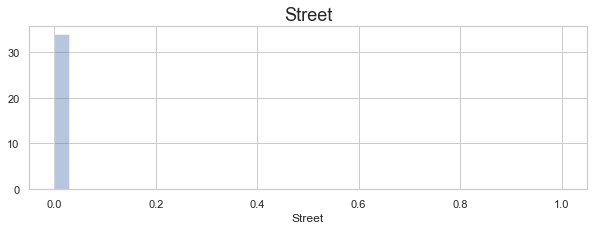

SkewNess: 17.02196927986141




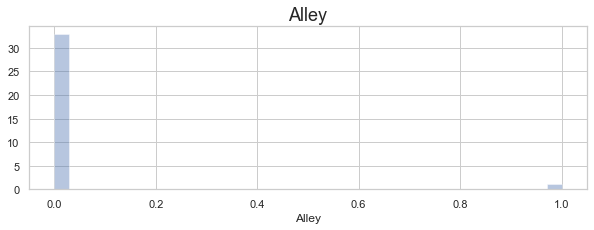

SkewNess: 5.436187020840781




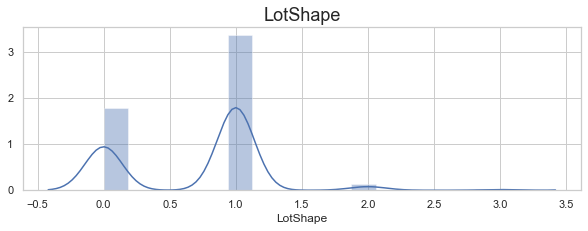

SkewNess: 0.13778356953555077




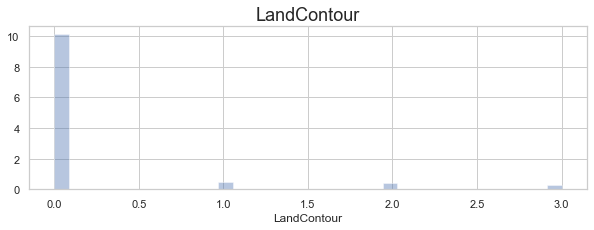

SkewNess: 3.395943264506517




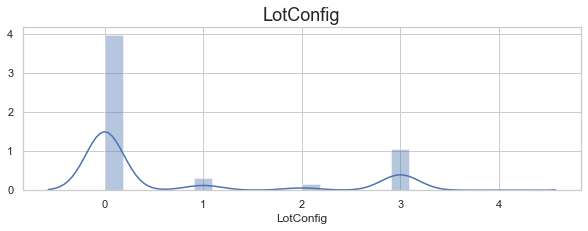

SkewNess: 1.3006331599925722




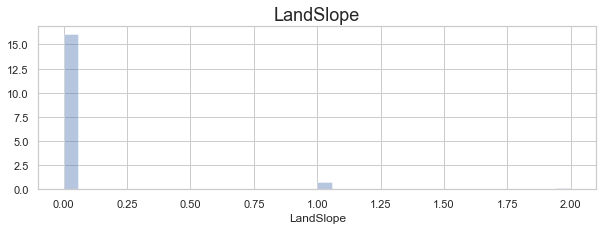

SkewNess: 4.812567939321139




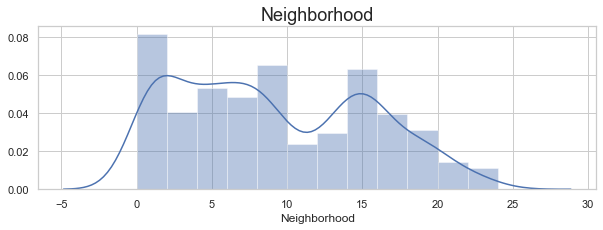

SkewNess: 0.31727816192434954




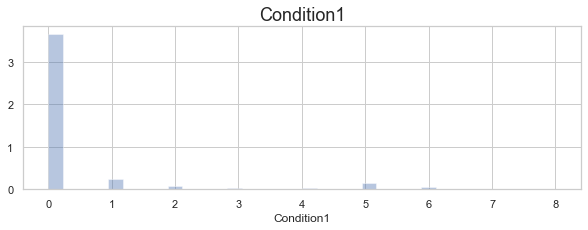

SkewNess: 3.473087731740586




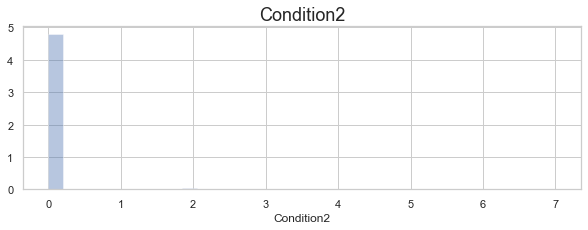

SkewNess: 12.32742602899533




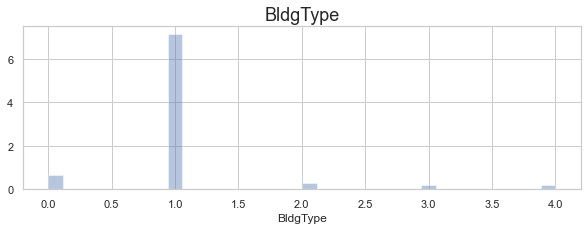

SkewNess: 2.577814649465906




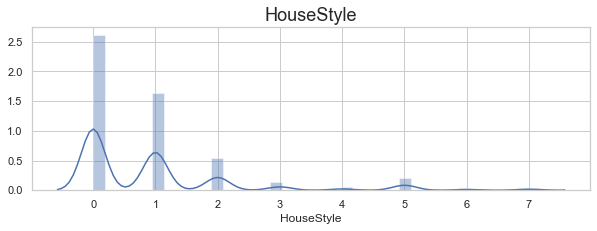

SkewNess: 2.1591158242063626




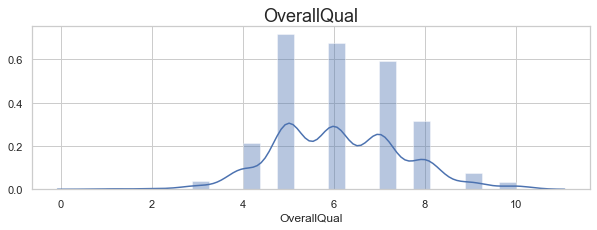

SkewNess: 0.1750824992845271




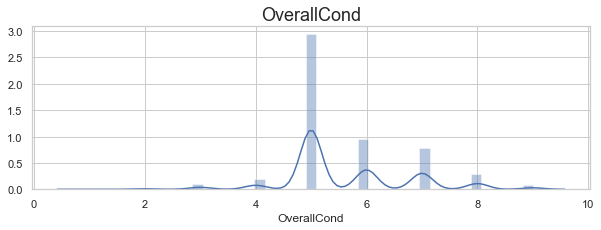

SkewNess: 0.5807139655333367




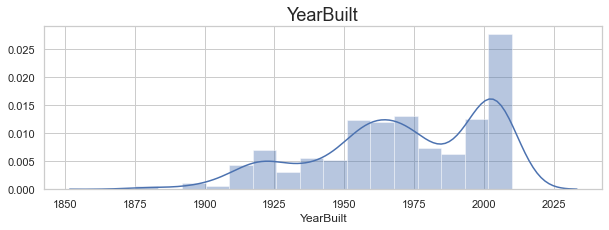

SkewNess: -0.5792035025736898




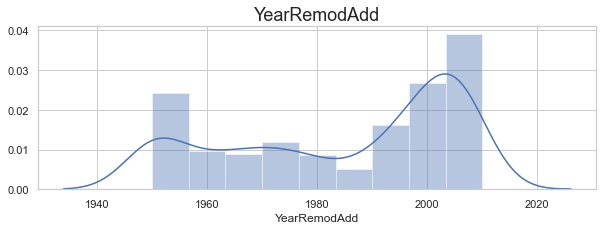

SkewNess: -0.49586353822203716




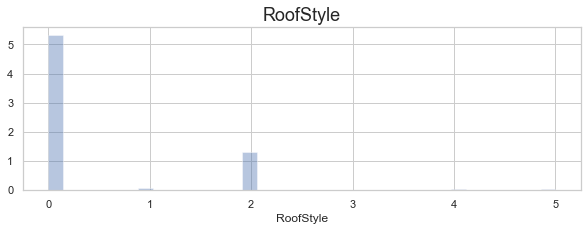

SkewNess: 1.9056641918251243




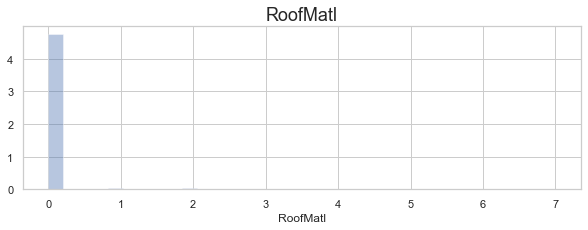

SkewNess: 11.280986341957716




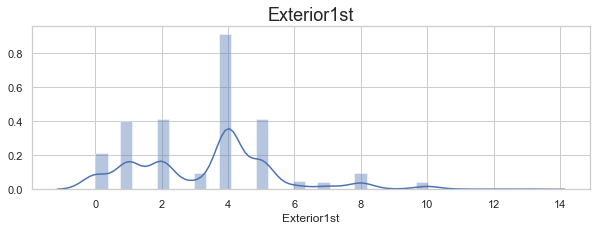

SkewNess: 0.6271081767849581




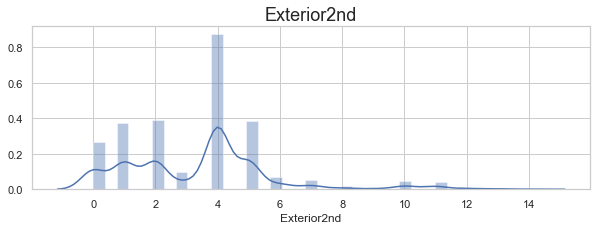

SkewNess: 1.0458272078984197




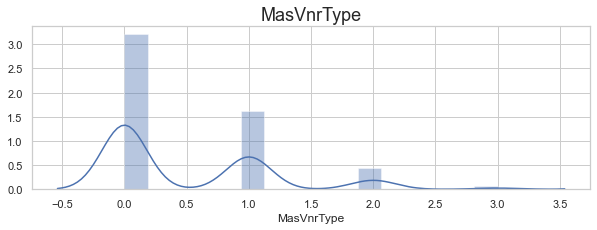

SkewNess: 1.2274676871682995




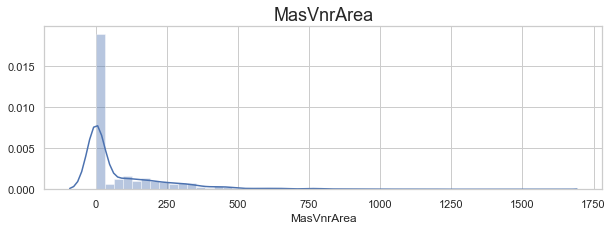

SkewNess: 2.8346577812934406




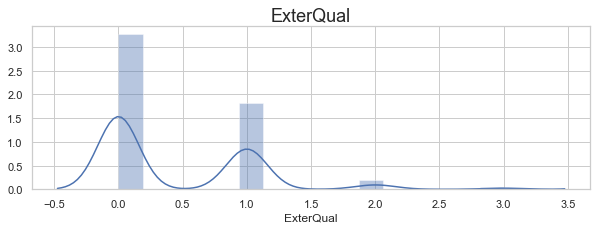

SkewNess: 1.3126526449480915




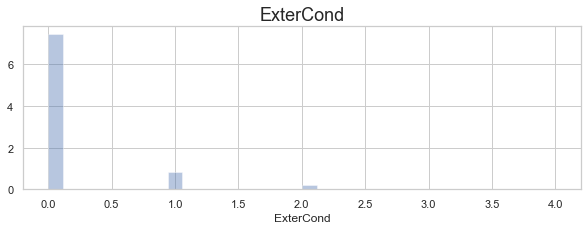

SkewNess: 3.506665020117365




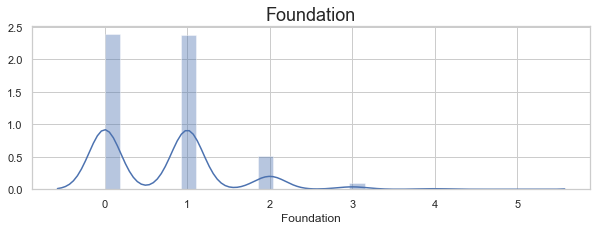

SkewNess: 1.148164315744235




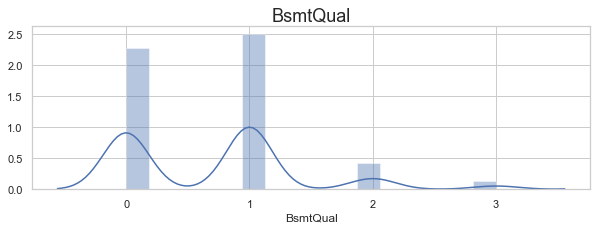

SkewNess: 0.910580495152462




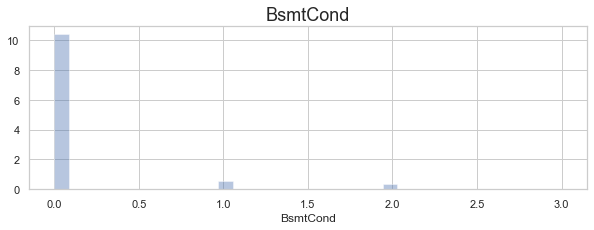

SkewNess: 3.7734277340860847




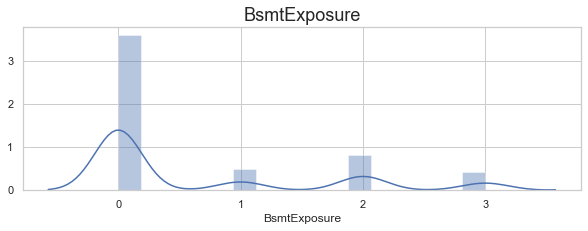

SkewNess: 1.2342658372442956




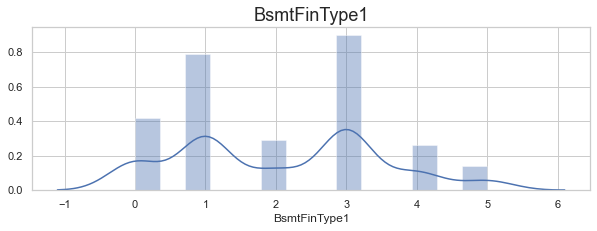

SkewNess: 0.16694211647836973




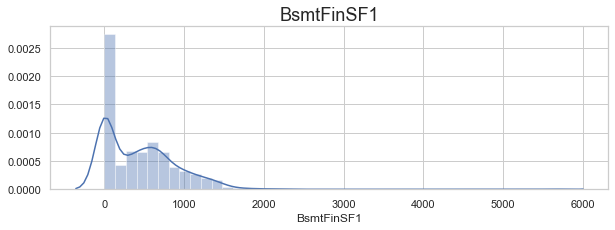

SkewNess: 1.8716059327957582




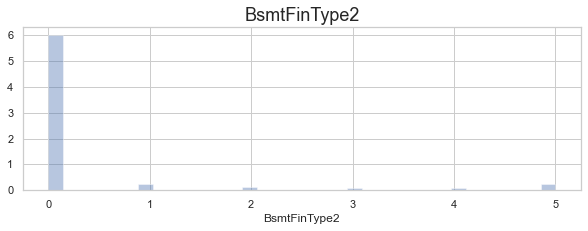

SkewNess: 3.4749426627534175




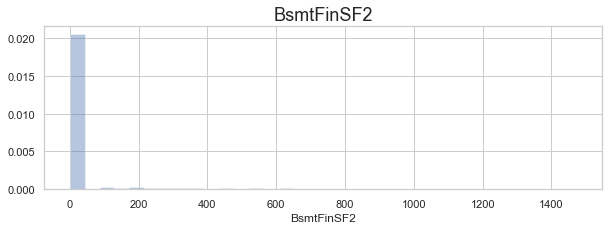

SkewNess: 4.365829146359866




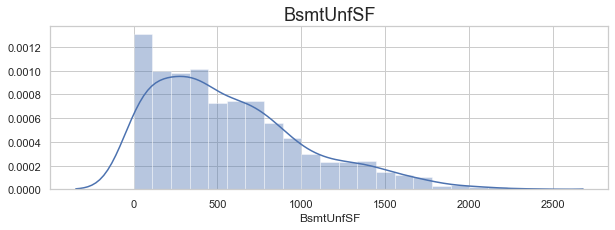

SkewNess: 0.9090571206651619




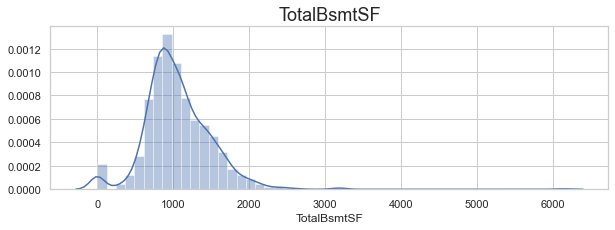

SkewNess: 1.7445908855423957




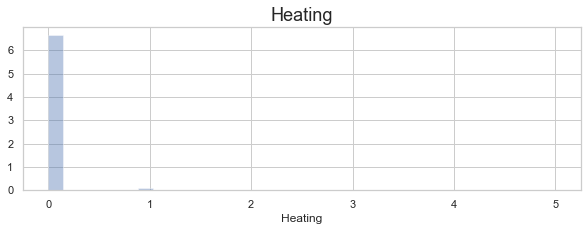

SkewNess: 9.880256510928833




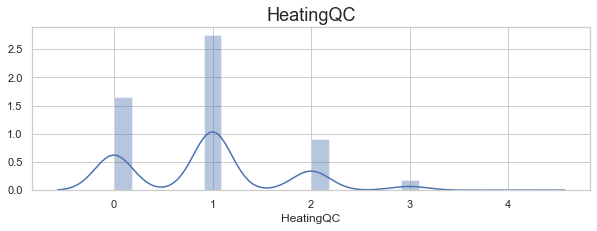

SkewNess: 0.5863033150097381




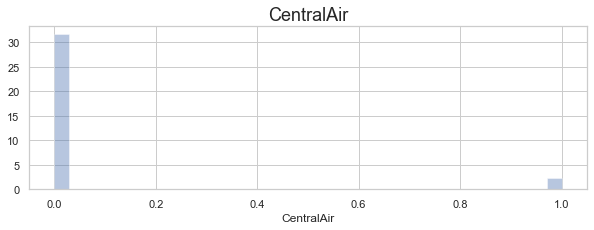

SkewNess: 3.4751876578509306




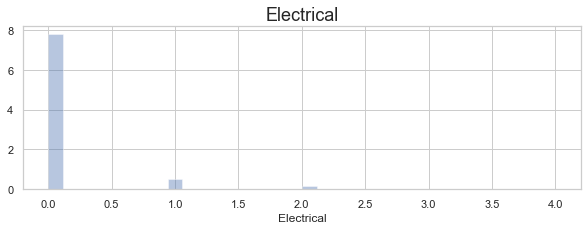

SkewNess: 4.319479958523942




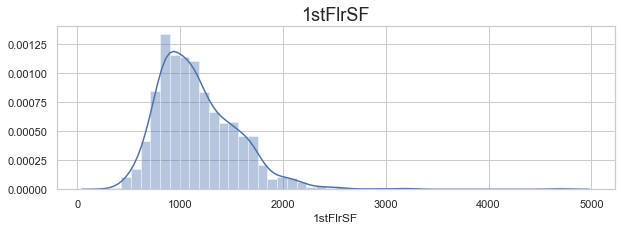

SkewNess: 1.5137072331415693




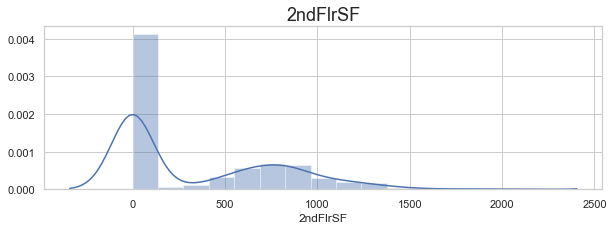

SkewNess: 0.8234785103609108




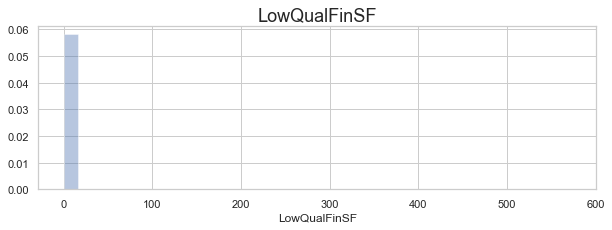

SkewNess: 8.666142302049042




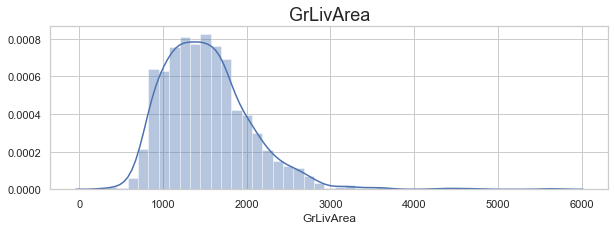

SkewNess: 1.4499515426476701




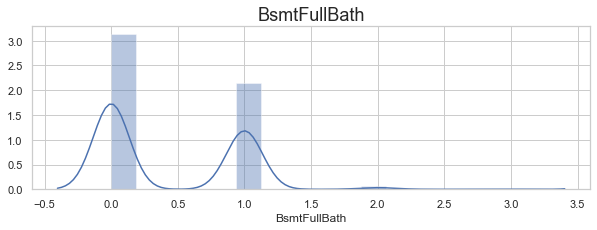

SkewNess: 0.6271059162466773




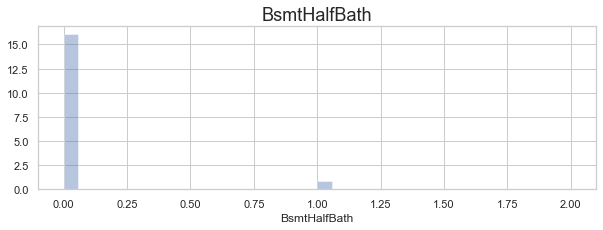

SkewNess: 4.264402760829792




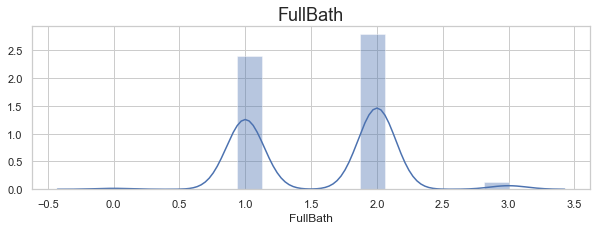

SkewNess: 0.05780870861471475




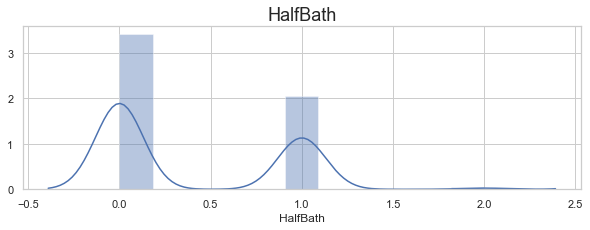

SkewNess: 0.6564917514090118




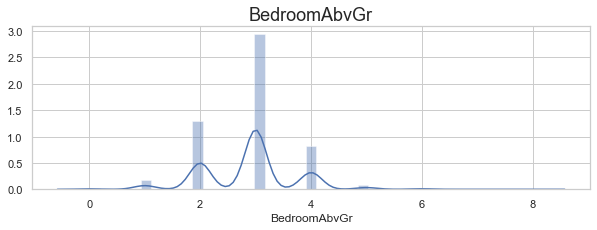

SkewNess: 0.2438552945621391




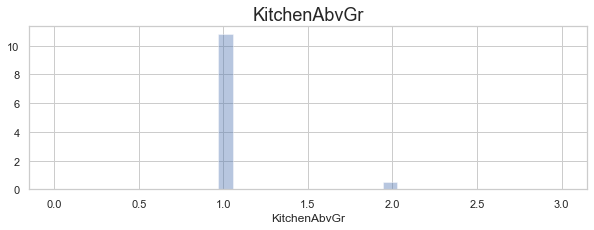

SkewNess: 4.365258908133523




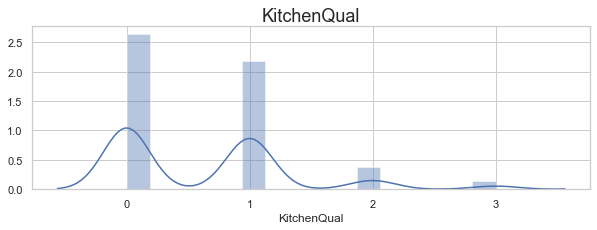

SkewNess: 1.1067782840754874




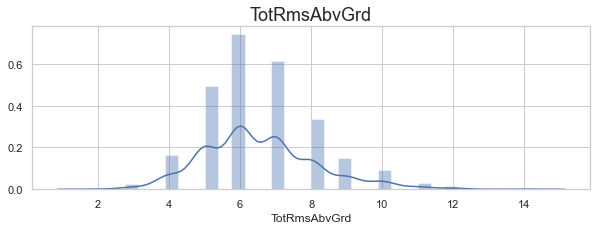

SkewNess: 0.6446565826319272




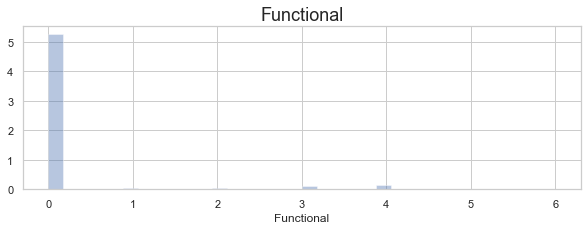

SkewNess: 4.103132530703501




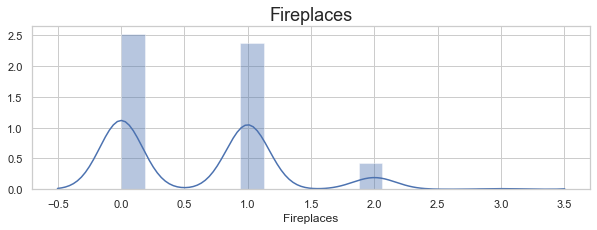

SkewNess: 0.6719656450265




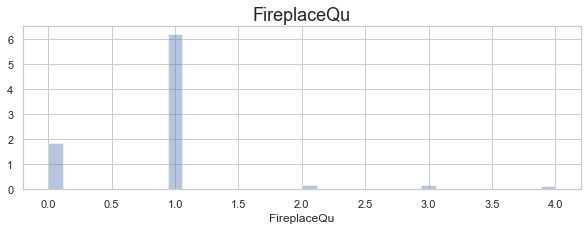

SkewNess: 1.790643965500509




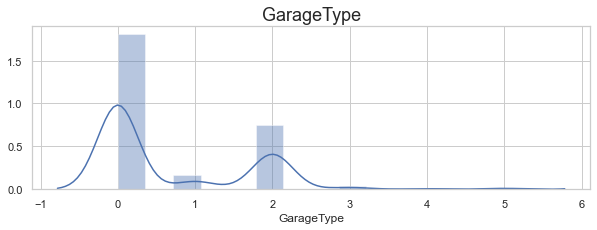

SkewNess: 1.2268153313821017




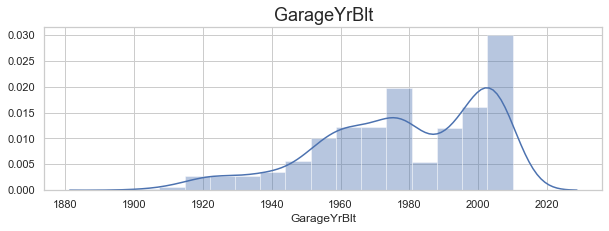

SkewNess: -0.6629343832202744




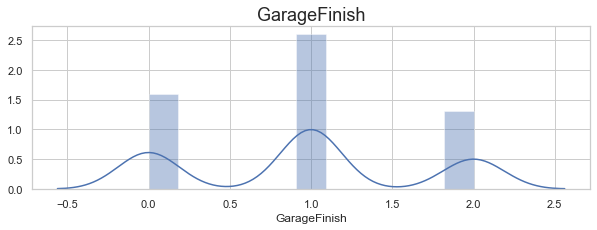

SkewNess: 0.07951728457065466




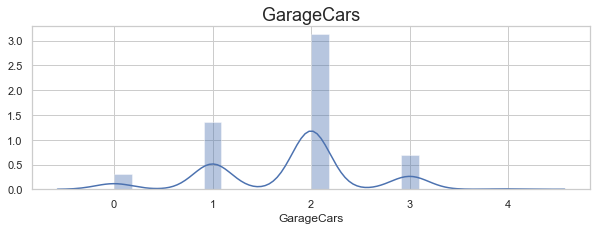

SkewNess: -0.3585558146314816




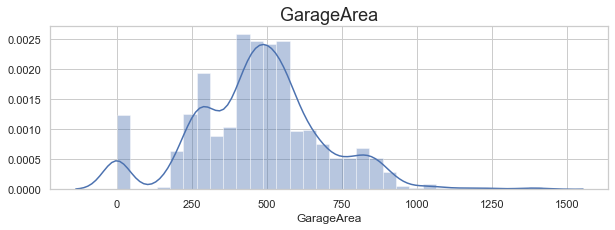

SkewNess: 0.18966497539008143




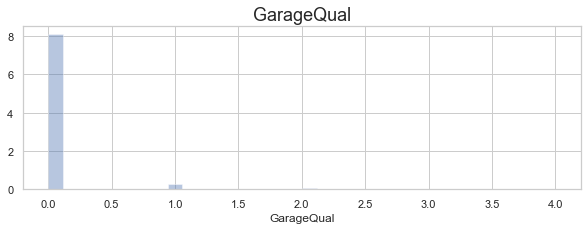

SkewNess: 6.696433018603616




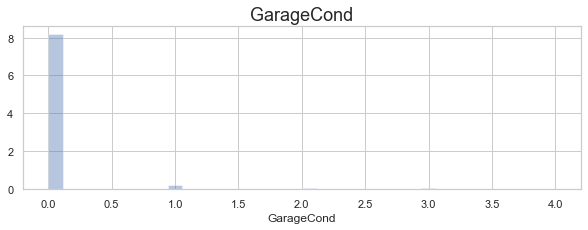

SkewNess: 7.147943257920099




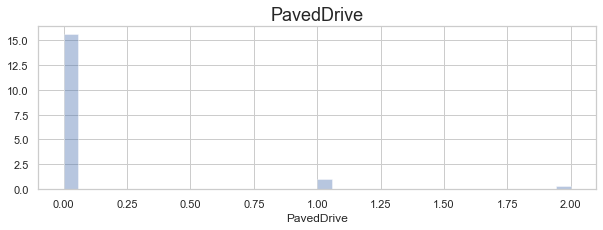

SkewNess: 3.7609978028185247




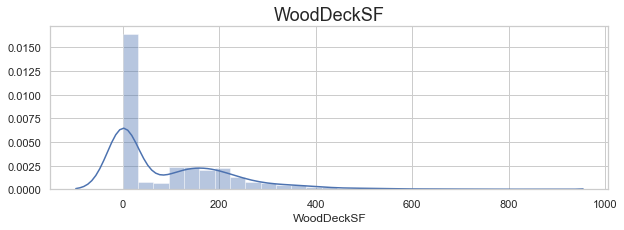

SkewNess: 1.504929246192858




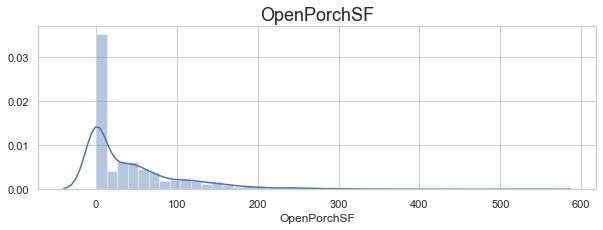

SkewNess: 2.41083972347696




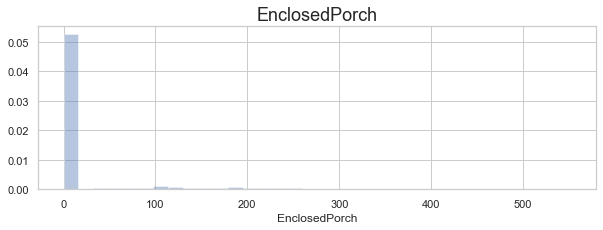

SkewNess: 3.0436098308918846




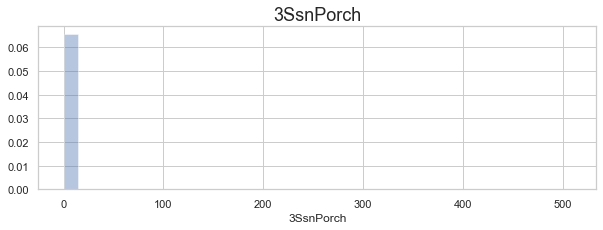

SkewNess: 9.770611216755274




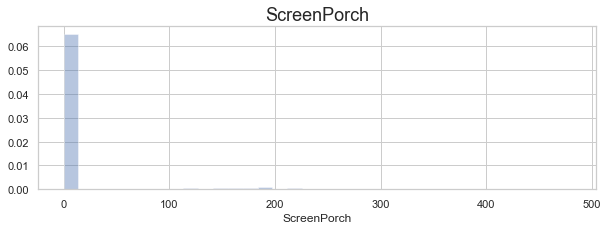

SkewNess: 4.105740751686475




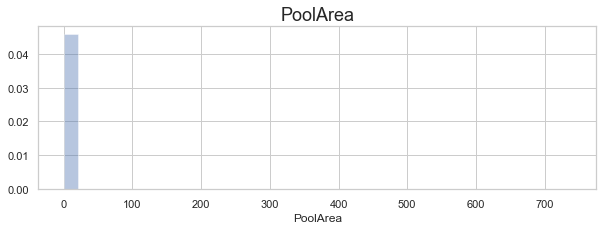

SkewNess: 13.243710763499866




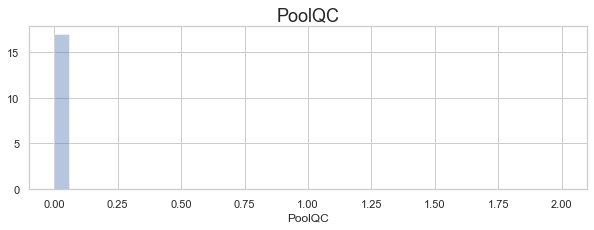

SkewNess: 19.40155848707698




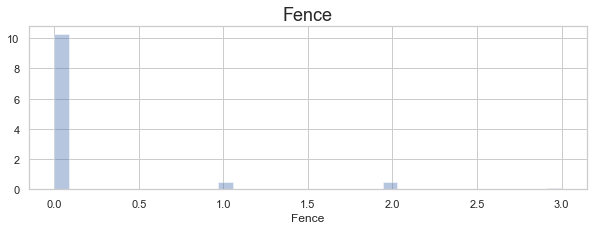

SkewNess: 3.6176415107745186




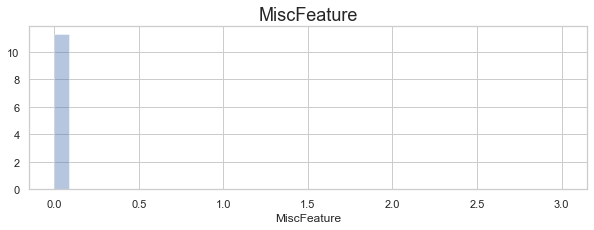

SkewNess: 21.726904591574836




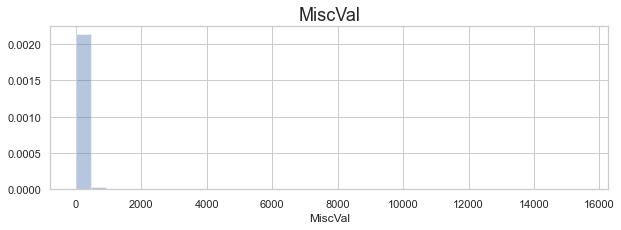

SkewNess: 23.065942802581013




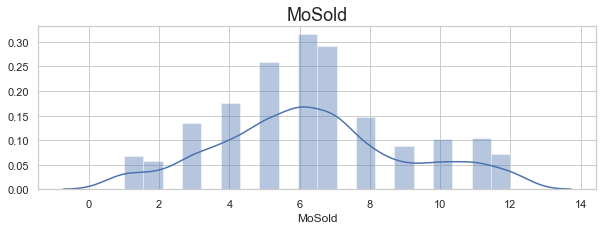

SkewNess: 0.22097863147453375




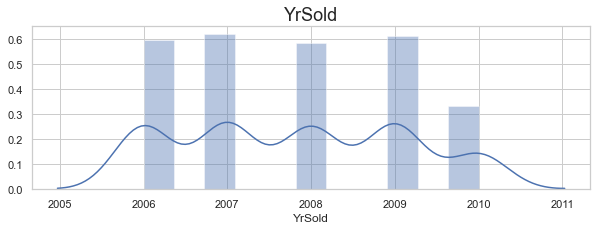

SkewNess: 0.1157647118679818




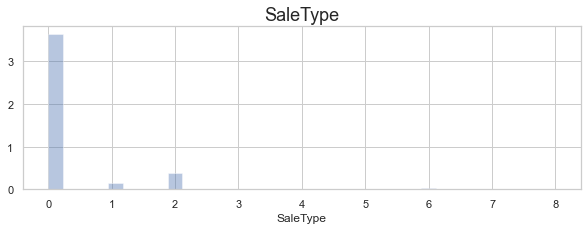

SkewNess: 4.255459150749289




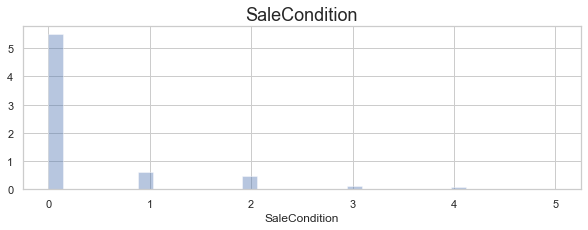

SkewNess: 2.8176315472166853




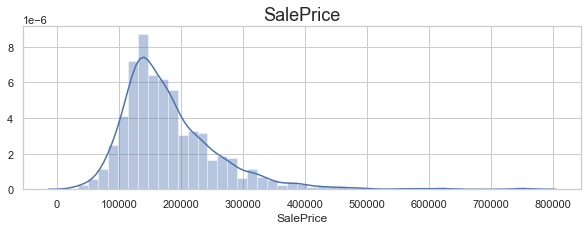

SkewNess: 1.953877705368286




In [22]:
# ploting skewness

for i in df.columns:
    plt.figure(figsize=(10,3))
    sns.distplot(df[i])
    plt.title(i,fontsize=18)
    plt.show()
    print("SkewNess:",df[i].skew())
    print('\n')

In [23]:
# dealing with skewness

for i in df.columns:
    if df[i].skew()>0.55:
        df[i]=np.log1p(df[i])     

# Dealing with Outliers

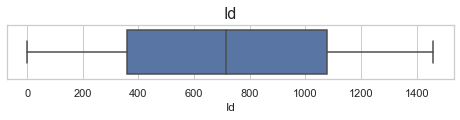

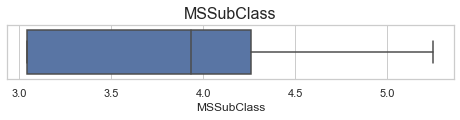

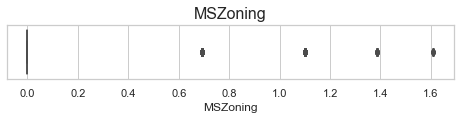

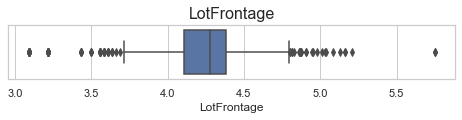

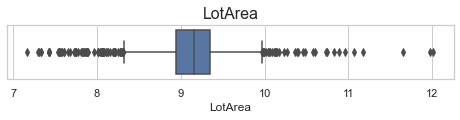

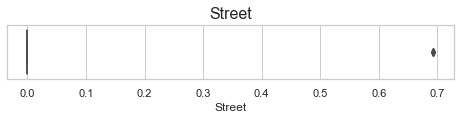

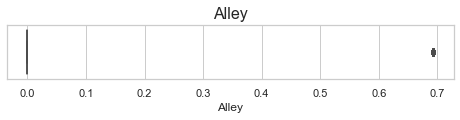

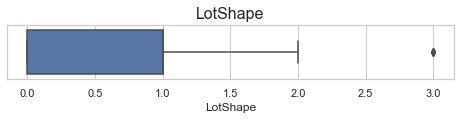

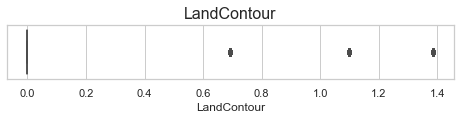

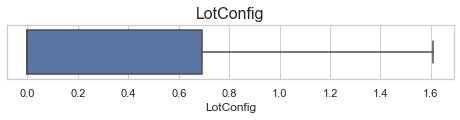

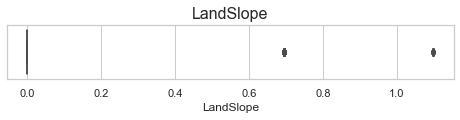

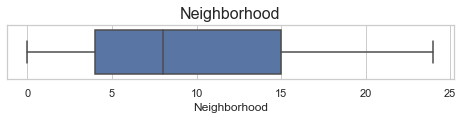

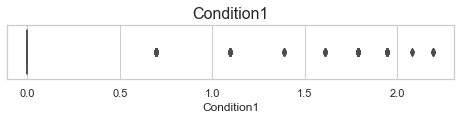

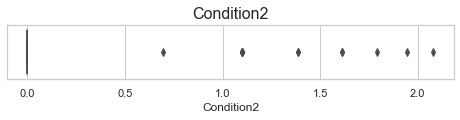

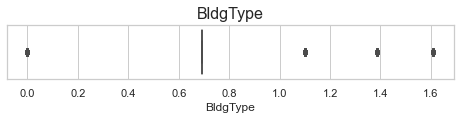

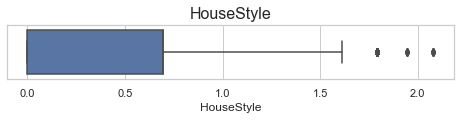

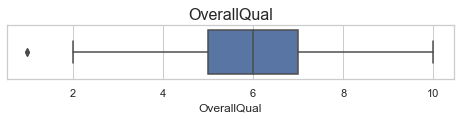

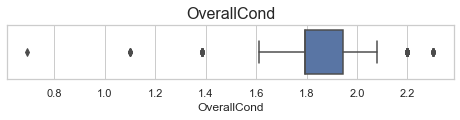

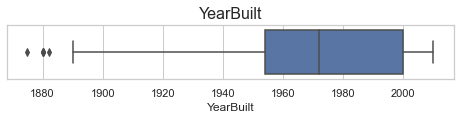

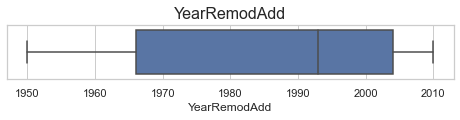

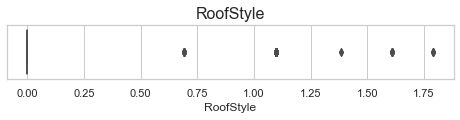

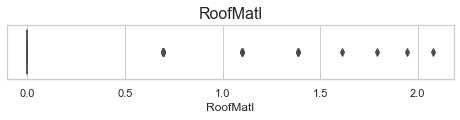

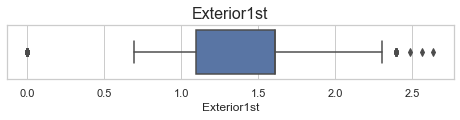

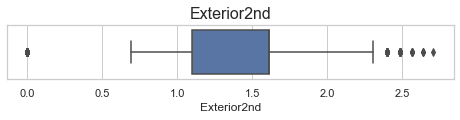

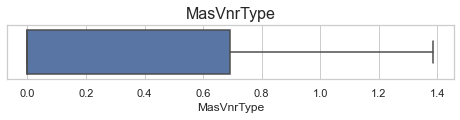

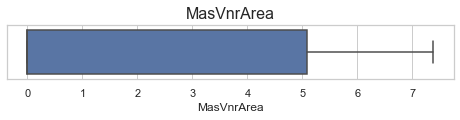

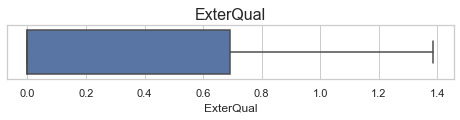

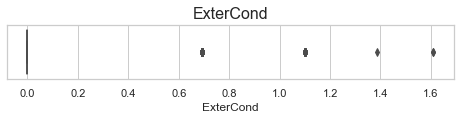

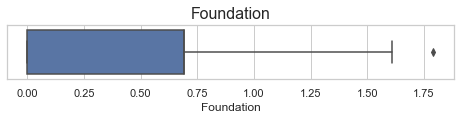

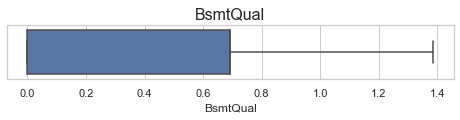

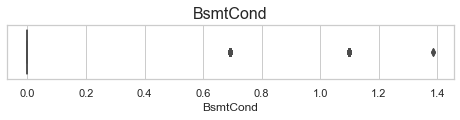

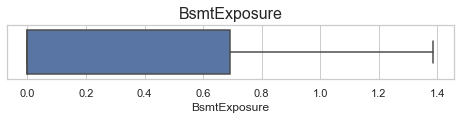

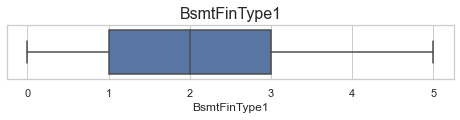

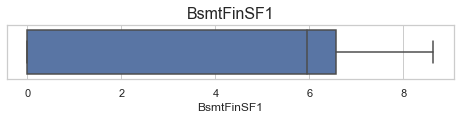

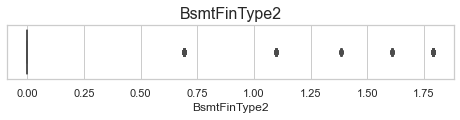

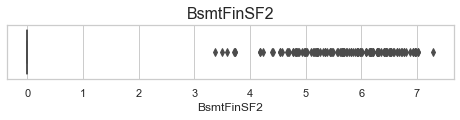

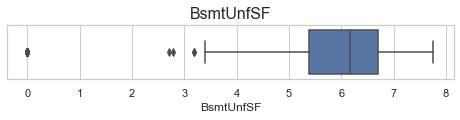

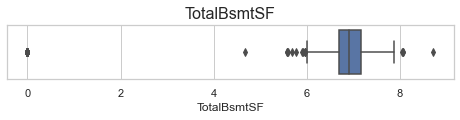

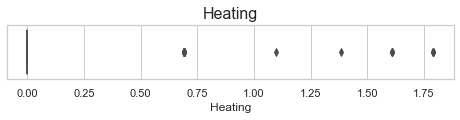

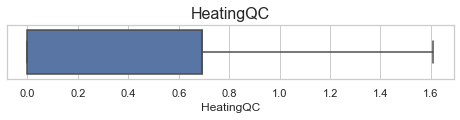

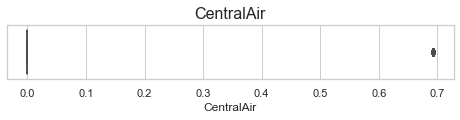

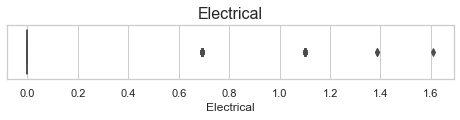

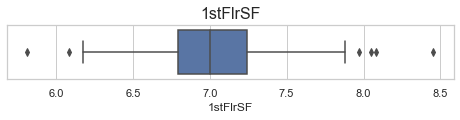

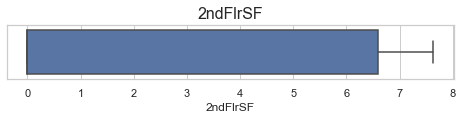

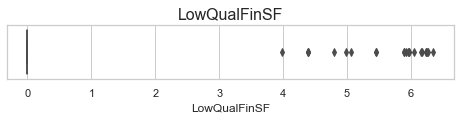

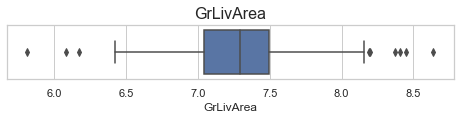

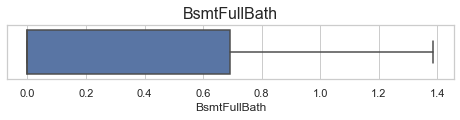

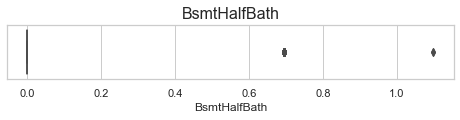

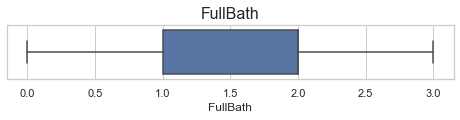

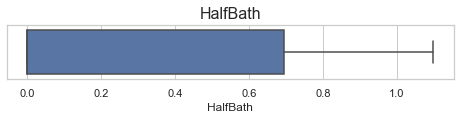

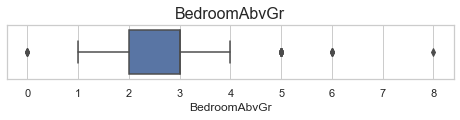

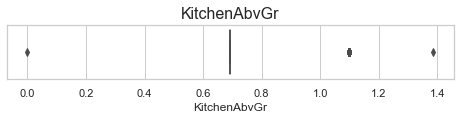

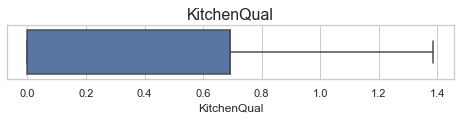

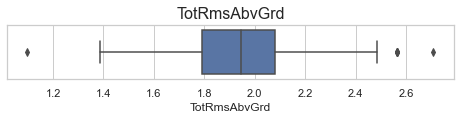

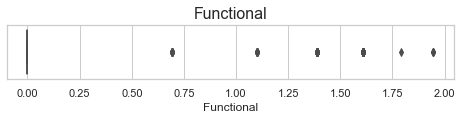

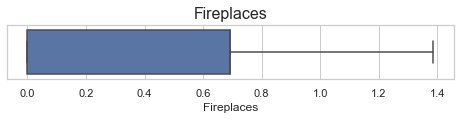

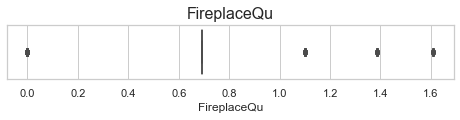

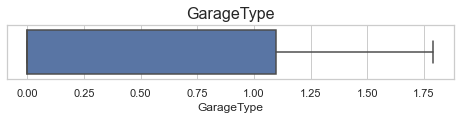

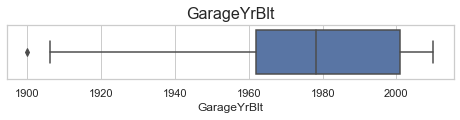

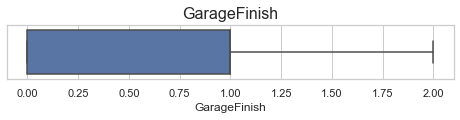

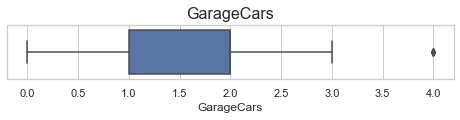

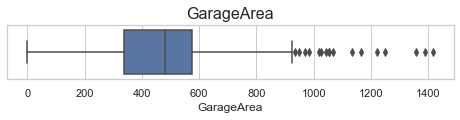

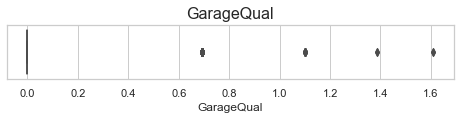

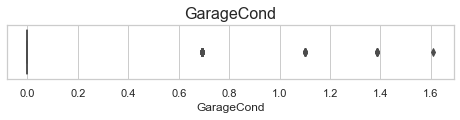

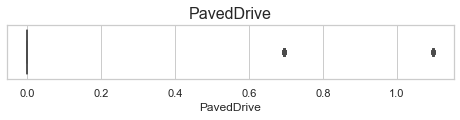

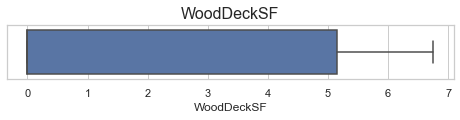

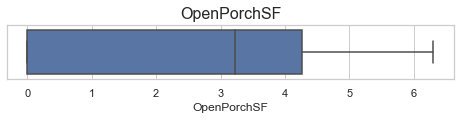

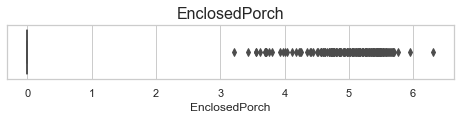

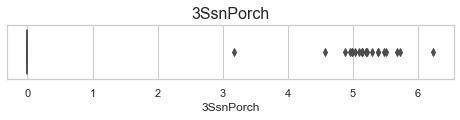

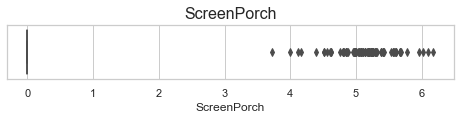

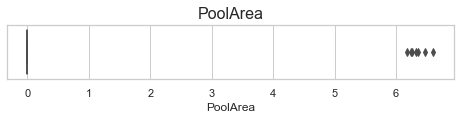

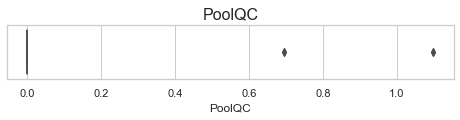

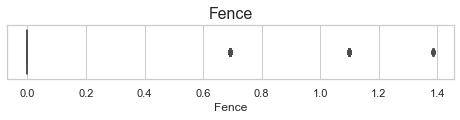

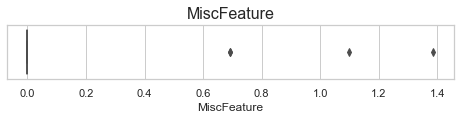

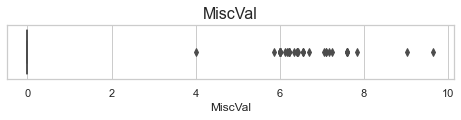

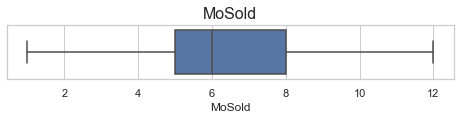

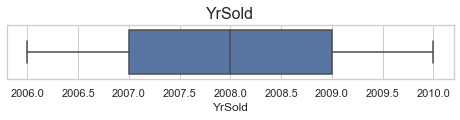

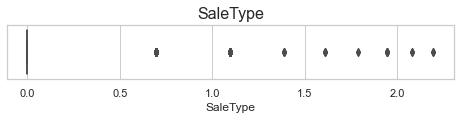

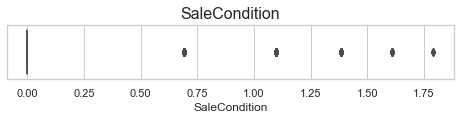

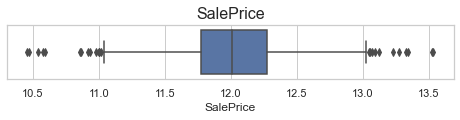

In [24]:
# ploting outliers with boxplot

for i in df.columns:
    plt.figure(figsize=(8,1))
    sns.boxplot(df[i])
    plt.title(i,fontsize=16)
    plt.show()
    print('\n')

In [25]:
# Removing Outliers

z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1168, 80)
(509, 80)


### Loading Trainnings

In [26]:
# loading test data

test=pd.read_csv('C:/Users/HP/Documents/housring price/test.csv')
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

In [27]:
# doing all steps done by train data 

test.drop('Utilities',inplace=True,axis=1)

for i in test.columns:
    if test[i].dtypes=='int64':
        test[i]=test[i].replace(np.nan,test[i].mean())
    if test[i].dtypes==float:
        test[i]=test[i].replace(np.nan,test[i].mean())
    if test[i].dtypes==object:
        mode=test[i].mode()[0]
        test[i]=test[i].fillna(mode)

for i in test.columns:
    if test[i].dtypes==object:
        test[i]=pd.factorize(test[i])[0]

for i in test.columns:
    if test[i].skew()>.55:
        test[i]=np.log1p(test[i])
        

# Model Training

In [35]:
# importing training liraries

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score

from sklearn.preprocessing import StandardScaler

In [36]:
# spiting data into x and y

X=df.drop('SalePrice',axis=1)
y=df['SalePrice']

In [37]:
# using standardScaler
sc=StandardScaler()
x=sc.fit_transform(X)

# creating pandas dataframe or x
x=pd.DataFrame(x,columns=X.columns)
x.head()

Id  MSSubClass  MSZoning  LotFrontage   LotArea    Street     Alley  \
0 -1.435487    1.425708 -0.480534     0.146261 -1.217640 -0.058621 -0.178331   
1  0.396325   -1.131278 -0.480534     1.077391  1.097443 -0.058621 -0.178331   
2  0.165545    0.425677 -0.480534     0.974688  0.167631 -0.058621 -0.178331   
3 -1.476354   -1.131278 -0.480534     1.397936  0.503038 -0.058621 -0.178331   
4 -0.726321   -1.131278 -0.480534     0.146261  1.191291 -0.058621 -0.178331   

   LotShape  LandContour  LotConfig  LandSlope  Neighborhood  Condition1  \
0 -1.297732    -0.327531  -0.599993  -0.233561     -1.451155   -0.366043   
1 -1.297732    -0.327531  -0.599993   3.662480     -1.291751   -0.366043   
2 -1.297732    -0.327531   0.629579  -0.233561     -1.132346   -0.366043   
3 -1.297732    -0.327531  -0.599993  -0.233561     -0.972941   -0.366043   
4 -1.297732    -0.327531   1.348832  -0.233561     -0.972941   -0.366043   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0   -0.106045 -2.542956   -0.873307    -0.075169    -0.467514   0.168236   
1   -0.106045  0.002887   -0.873307     1.364138     0.430962  -0.030885   
2   -0.106045  0.002887    0.377045     0.644484    -0.467514   0.831975   
3   -0.106045  0.002887   -0.873307    -0.075169     0.430962   0.201423   
4   -0.106045  0.002887   -0.873307    -0.075169     1.209257   0.201423   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0     -0.421565  -0.518674 -0.134864    -2.310236    -2.132115   -0.776586   
1     -0.710356   0.971862  3.986129    -1.113366    -1.012095   -0.776586   
2      0.589202  -0.518674 -0.134864    -0.413241    -0.356926   -0.776586   
3     -0.373434   1.843769 -0.134864    -2.310236    -2.132115    0.917806   
4      0.733598  -0.518674 -0.134864     0.083505     0.107924    1.908962   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0   -0.811066  -0.766494  -0.365858   -1.048038 -1.086366 -0.291737   
1   -0.811066   1.071253   2.226286    0.591297  0.596523  2.505558   
2   -0.811066   1.071253  -0.365858    0.591297 -1.086366 -0.291737   
3    1.545296  -0.766494  -0.365858   -1.048038 -1.086366 -0.291737   
4    1.037202   1.071253  -0.365858   -1.048038 -1.086366 -0.291737   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0     -0.667486     -1.462184    0.192607     -0.337555   -0.358502   
1      0.678332     -1.462184    0.548995      1.267829    3.277102   
2      1.465586     -0.758794    0.848292     -0.337555   -0.358502   
3     -0.667486     -0.055404    0.781276     -0.337555   -0.358502   
4     -0.667486     -1.462184    0.971138     -0.337555   -0.358502   

   BsmtUnfSF  TotalBsmtSF   Heating  HeatingQC  CentralAir  Electrical  \
0   0.657356     0.200480 -0.135248  -1.376517   -0.267506   -0.292567   
1   0.702538     0.826237 -0.135248   0.285031   -0.267506   -0.292567   
2  -0.045315     0.231314 -0.135248   0.285031   -0.267506   -0.292567   
3   0.749341     0.666338 -0.135248   0.285031   -0.267506   -0.292567   
4   0.131619     0.544236 -0.135248   1.256975   -0.267506   -0.292567   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0 -0.470488 -0.870381     -0.140523  -1.236391     -0.830761     -0.237506   
1  2.179513 -0.870381     -0.140523   1.295192      1.147062     -0.237506   
2  0.042497  1.190178     -0.140523   1.003882      1.147062     -0.237506   
3  1.597577 -0.870381     -0.140523   0.739261     -0.830761     -0.237506   
4  1.153201 -0.870381     -0.140523   0.314742     -0.830761      4.085500   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.793082 -0.778514     -1.082679     -0.204183    -0.951443     -0.983338   
1  0.793082 -0.778514      1.365664     -0.204183     0.712240      0.944613   
2  0.793082  1.242838      0.141492     -0.204183    -0.951443      0.944613   
3  0.793082 -0.778514      0.141492     -0.204183    -0.9

In [38]:
#spliting data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)

# creating loop for all algorithms
models=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),RandomForestRegressor()]
for m in models:
    print('************************',m,'**********************')
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("r2:",r2_score(y_test,pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
    print('MSE:',mean_squared_error(y_test,pred))
    print("score:",m.score(x_train,y_train))
    print('\n')

************************ LinearRegression() **********************
r2: 0.8720872663483376
RMSE: 0.14622804911756135
MSE: 0.021382642348727932
score: 0.9021506256791766


************************ SVR() **********************
r2: 0.7561116963996611
RMSE: 0.2019153249267724
MSE: 0.04076979844028407
score: 0.9616463481711581


************************ DecisionTreeRegressor() **********************
r2: 0.7058236731083569
RMSE: 0.22175716265569725
MSE: 0.04917623918910537
score: 1.0


************************ KNeighborsRegressor() **********************
r2: 0.7168161097962802
RMSE: 0.21757453673975277
MSE: 0.04733867903751803
score: 0.8474118892050824


************************ RandomForestRegressor() **********************
r2: 0.8562551647797814
RMSE: 0.15501364214362395
MSE: 0.024029229250631508
score: 0.9796710292045074




# cross validation score

In [39]:
# useing cross_validtion score or see underfitting and overfitting
for c in models:
    print('*******',c)
    cross=cross_val_score(c,x,y,cv=6)
    print(cross.mean())
    print(cross)
    print('\n')

******* LinearRegression()
0.8383793193502017
[0.92739168 0.71655993 0.88634604 0.76731531 0.88222615 0.85043681]


******* SVR()
0.8026915324307581
[0.74294665 0.87198777 0.80882191 0.77053945 0.81940449 0.80244892]


******* DecisionTreeRegressor()
0.692996386199057
[0.74797957 0.71684198 0.72960225 0.65997481 0.72761512 0.57596459]


******* KNeighborsRegressor()
0.7607493092151346
[0.79304232 0.77562708 0.78538885 0.70213708 0.77255835 0.73574217]


******* RandomForestRegressor()
0.8574836745708838
[0.88320159 0.85558737 0.88828293 0.8213123  0.87075603 0.82576183]




# GridSeachCV Useing for Hyper Parameter Tunning

In [40]:
# apply gridSeachcv for best model ( RandomForestRegressor )
para={'n_estimators':[50,100,150,200],'max_features':['auto','sqrt','log2']}

grid=GridSearchCV(RandomForestRegressor(),para)
grid.fit(x_train,y_train)

# see best parameters 
print(grid.best_params_)

{'max_features': 'sqrt', 'n_estimators': 200}


In [41]:
# apply best parameters in randomForestRegressor
max_r=0
for r in range(40,150):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r)
    rf=RandomForestRegressor(max_features='sqrt', n_estimators=200)
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2>max_r:
        max_r=r2
        final_r=r
print('max r2 score:',max_r,'by ramdom_state:',final_r) 

max r2 score: 0.9039554679099698 by ramdom_state: 148


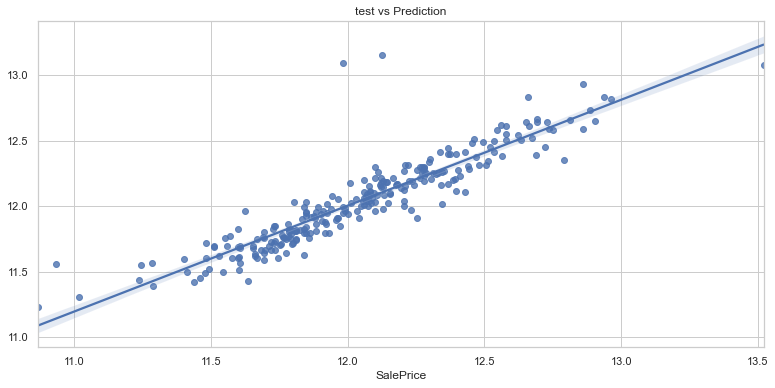

In [42]:
# ploting results

plt.figure(figsize=(13,6))
sns.regplot(y_test,pred)
plt.title("test vs Prediction")
plt.show()

In [44]:
# Appy another best model(SVR) with GridSearchCV
para1={'kernel':['rbf','linear','poly'],'tol':[0.0001,0.001,0.01,0.1],'C':[1,10]}

grid1=GridSearchCV(SVR(),para1)
grid1.fit(x_train,y_train)

# see best prameters
grid1.best_params_

{'C': 10, 'kernel': 'linear', 'tol': 0.01}

In [45]:
# apply hyper parameters for SVR
max_r=0
for r in range(40,150):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r)
    s=SVR(kernel='linear',tol=0.01 ,C=10)
    s.fit(x_train,y_train)
    preds=s.predict(x_test)
    r2=r2_score(y_test,preds)
    if r2>max_r:
        max_r=r2
        final_r=r
print('max r2 score:',max_r,'by ramdom_state:',final_r)

max r2 score: 0.9229893275684001 by ramdom_state: 49


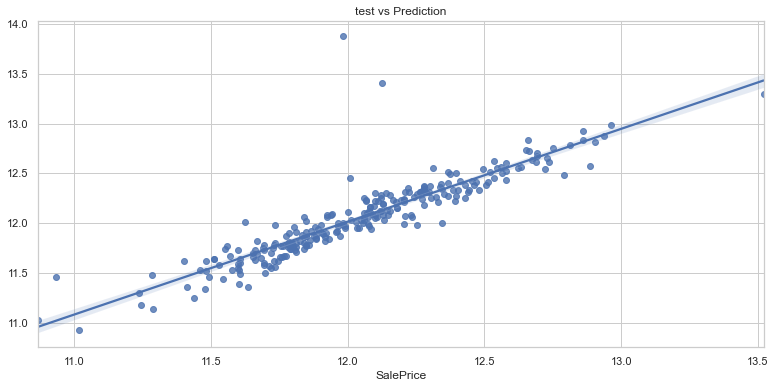

In [46]:
# ploting accuracy results

plt.figure(figsize=(13,6))
sns.regplot(y_test,preds)
plt.title("test vs Prediction")
plt.show()

In [48]:
# SVR working well than RandomforestRegressor so create final model with best random state
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=49)
svr=SVR(kernel='linear',tol=0.01 ,C=10)
svr.fit(x_train,y_train)
predsv=svr.predict(x_test)
print('R2:',r2_score(y_test,predsv))
print('RMSE:',np.sqrt(mean_squared_error(y_test,predsv)))
print('MSE:',mean_squared_error(y_test,predsv))
print('score:',svr.score(x_train,y_train))


R2: 0.9229893275684001
RMSE: 0.10964490421094603
MSE: 0.01202200501942753
score: 0.8771126842026344


In [49]:
# saveing this final Model

import joblib

joblib.dump(svr,'Housing price model.pkl')

['Housing price model.pkl']

## >>>>>>>>>>>>> Done <<<<<<<<<<<<<<<<